<a href="https://colab.research.google.com/github/RevanthSanti/Hands-ons/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

# Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.

Your focus in this project should be on the following:

The following is recommendation of the steps that should be employed towards attempting to solve this problem statement:
- Exploratory Data Analysis: Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations.

- Data Cleaning: This might include standardization, handling the missing values and outliers in the data.
- Dealing with Imbalanced data: This data set is highly imbalanced. The data should be balanced using the appropriate methods before moving onto model building.
- Feature Engineering: Create new features or transform the existing features for better performance of the ML Models.
- Model Selection: Choose the most appropriate model that can be used for this project.
- Model Training: Split the data into train & test sets and use the train set to estimate the best model parameters.
- Model Validation: Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting.
- Model Deployment: Model deployment is the process of making a trained machine learning model available for use in a production environment.


# Tasks/Activities List

Your code should contain the following activities/Analysis:
- Collect the time series data from the CSV file linked here.
- Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, outliers etc if any.
- Get the correct datatype for date.
- Balancing the data.
- Feature Engineering and feature selection.
- Train/Test Split - Apply a sampling distribution to find the best split.
- Choose the metrics for the model evaluation
- Model Selection, Training, Predicting and Assessment
- Hyperparameter Tuning/Model Improvement
- Model deployment plan.

# Success Metrics

Below are the metrics for the successful submission of this case study.
- The accuracy of the model on the test data set should be > 75% (Subjective in nature)
- Add methods for Hyperparameter tuning.
- Perform model validation.


## Table of Contents
1. [Installing External Libraries](#p1)
2. [Importing Libraries](#p2)
3. [Exploratory data analysis](#p3)
4. [Splitting the data into train & test data](#p4)
5. [Model Building](#p5)
   * [Perform cross validation with RepeatedKFold](#p5-1)
   * [Perform cross validation with StratifiedKFold](#p5-2)
   * [RandomOverSampler with StratifiedKFold Cross Validation](#p5-3)
   * [Oversampling with SMOTE Oversampling](#p5-4)
   * [Oversampling with ADASYN Oversampling](#p5-5)
6. [Hyperparameter Tuning](#p6)
7. [Model Building using PyCaret](#p7)
   * [Training](#p7-1)
   * [Hyper Parameter Tuning](#p7-2)
8. [Model Deployment Plan](#p8)
9. [Conclusion](#p9)

 ## <a name="p1">Installing External Libraries</a>

In [1]:
! pip install ydata_profiling
! pip install sweetviz
! pip install pycaret

## <a name="p2">Importing Libraries</a>

In [2]:
# Data Collection Libraries

import numpy as np
import pandas as pd
import time

# Data Visualization

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

# Data Analysis

import ydata_profiling
from ydata_profiling import ProfileReport
import sweetviz as sv
import pycaret


# Metrics

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

# Preprocessing

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Training and Testing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Model Selection

from sklearn.linear_model import Ridge,Lasso,LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from pycaret.classification import *


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


# Warnings
import warnings
warnings.filterwarnings('ignore')

## <a name="p3">Exploratory data analysis</a>

In [3]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Loading the data
data = pd.read_csv('gdrive/MyDrive/Dataset/creditcard.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
# Checking the shape
data.shape

(284807, 31)

In [ ]:
# Checking the datatypes and null/non-null distribution
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

***All the features in data are continuos except 'Class', which is our target feature***

In [ ]:
# Checking distribution of numerical values in the dataset
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

***Let's copy the dataset to avoid any loss of original data***

In [5]:
df=data.copy()

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
df.duplicated().any()

True

***Their are NO NULL values, but duplicate values are present***

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [ ]:
print('Shape of data after preprocessing',df.shape)

Shape of data after preprocessing (283726, 31)


In [ ]:
# Checking the class distribution of the target variable
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Class
0    99.83329
1     0.16671
Name: Class, dtype: float64


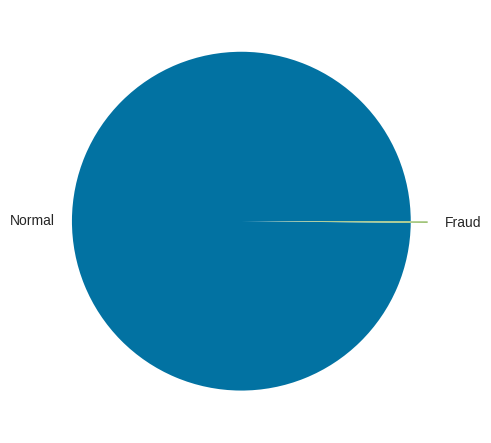

In [ ]:
# Checking the class distribution of the target variable in percentage



print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100)

LABELS = ["Normal", "Fraud"]
myexplode=[0.1,0]

plt.pie((df.groupby('Class')['Class'].count()/df['Class'].count()) *100,labels=LABELS,explode=myexplode)
plt.show()

In [ ]:
# Checking the correlation
corr = df.corr()
corr

Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223 -0.063279   
V1      0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036  0.000413   
V2     -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210 -0.000594   
V3     -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879 -0.001511   
V4     -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744 -0.000880   
V5      0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000 -0.000938   
V6     -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938  1.000000   
V7      0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709  0.000436   
V8     -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430  0.003036   
V9     -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213 -0.000734   
V10     0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050 -0.002180   
V11    -0.248536  0.001028 -0.000633  0.002339 -0.001223  0.000411 -0.000211   
V12     0.125500 -0.001524  0.002266 -0.005900  0.003366 -0.002342 -0.001185   
V13    -0.065958 -0.000568  0.000680  0.000113  0.000177  0.000019  0.000397   
V14    -0.100316 -0.002663  0.002711 -0.003027  0.002801 -0.001000  0.000184   
V15    -0.184392 -0.000602  0.001538 -0.001230  0.000572 -0.001171 -0.000470   
V16     0.011286 -0.003345  0.004013 -0.004430  0.003346 -0.002373  0.000122   
V17    -0.073819 -0.003491  0.003244 -0.008159  0.003655 -0.004466 -0.001716   
V18     0.090305 -0.003535  0.002477 -0.003495  0.002325 -0.002685  0.000541   
V19     0.029537  0.000919 -0.000358 -0.000016 -0.000560  0.000436  0.000106   
V20    -0.051022 -0.001393 -0.001287 -0.002269  0.000318 -0.001185 -0.000181   
V21     0.045913  0.002818 -0.004897  0.003500 -0.001034  0.001622 -0.002134   
V22     0.143727 -0.001436  0.001237 -0.000275  0.000115 -0.000559  0.001104   
V23     0.051474 -0.001330 -0.003855  0.000449  0.000732  0.001183 -0.000755   
V24    -0.015954 -0.000723  0.000701 -0.000072 -0.000120  0.000198  0.001202   
V25    -0.233262 -0.000222 -0.001569  0.000425  0.000162  0.000069  0.000697   
V26    -0.041818 -0.000684  0.000253 -0.000094  0.000777  0.000390 -0.000028   
V27    -0.005171 -0.015706  0.007555 -0.007051  0.001322 -0.005798  0.000289   
V28    -0.009305 -0.004861  0.001611 -0.000134  0.000231 -0.000820  0.000925   
Amount -0.010559 -0.230105 -0.533428 -0.212410  0.099514 -0.387685  0.216389   
Class  -0.012359 -0.094486  0.084624 -0.182322  0.129326 -0.087812 -0.043915   

              V7        V8        V9  ...       V21       V22       V23  \
Time    0.085335 -0.038203 -0.007861  ...  0.045913  0.143727  0.051474   
V1     -0.009173 -0.001168  0.001828  ...  0.002818 -0.001436 -0.001330   
V2      0.007425  0.002899 -0.000274  ... -0.004897  0.001237 -0.003855   
V3     -0.011721 -0.001815 -0.003579  ...  0.003500 -0.000275  0.000449   
V4      0.004657  0.000890  0.002154  ... -0.001034  0.000115  0.000732   
V5     -0.008709  0.001430 -0.001213  ...  0.001622 -0.000559  0.001183   
V6      0.000436  0.003036 -0.000734  ... -0.002134  0.001104 -0.000755   
V7      1.000000 -0.006419 -0.004921  ...  0.009010 -0.002280  0.003303   
V8     -0.006419  1.000000  0.001038  ...  0.018892 -0.006156  0.004994   
V9     -0.004921  0.001038  1.000000  ...  0.000679  0.000785  0.000677   
V10    -0.013617  0.000481 -0.012613  ...  0.003777 -0.000481  0.001917   
V11     0.002454  0.004688 -0.000217  ... -0.002760 -0.000150 -0.000037   
V12    -0.006153 -0.004414 -0.002385  ...  0.003285  0.000151  0.000486   
V13    -0.000170 -0.001381  0.000745  ...  0.000522  0.000016  0.000252   
V14    -0.003816 -0.008387  0.001981  ...  0.005633 -0.001906  0.000666   
V15    -0.001394  0.001044 -0.000283  ... -0.000271 -0.001197  0.000969   
V16    -0.005944 -0.004376 -0.000086  ...  0.004326 -0.000820  0.001209   
V17    -0.008794 -0.005576 -0.002318  ...  0.003560 -0.000162  0.000667   
V18    -0.004279 -0.001323

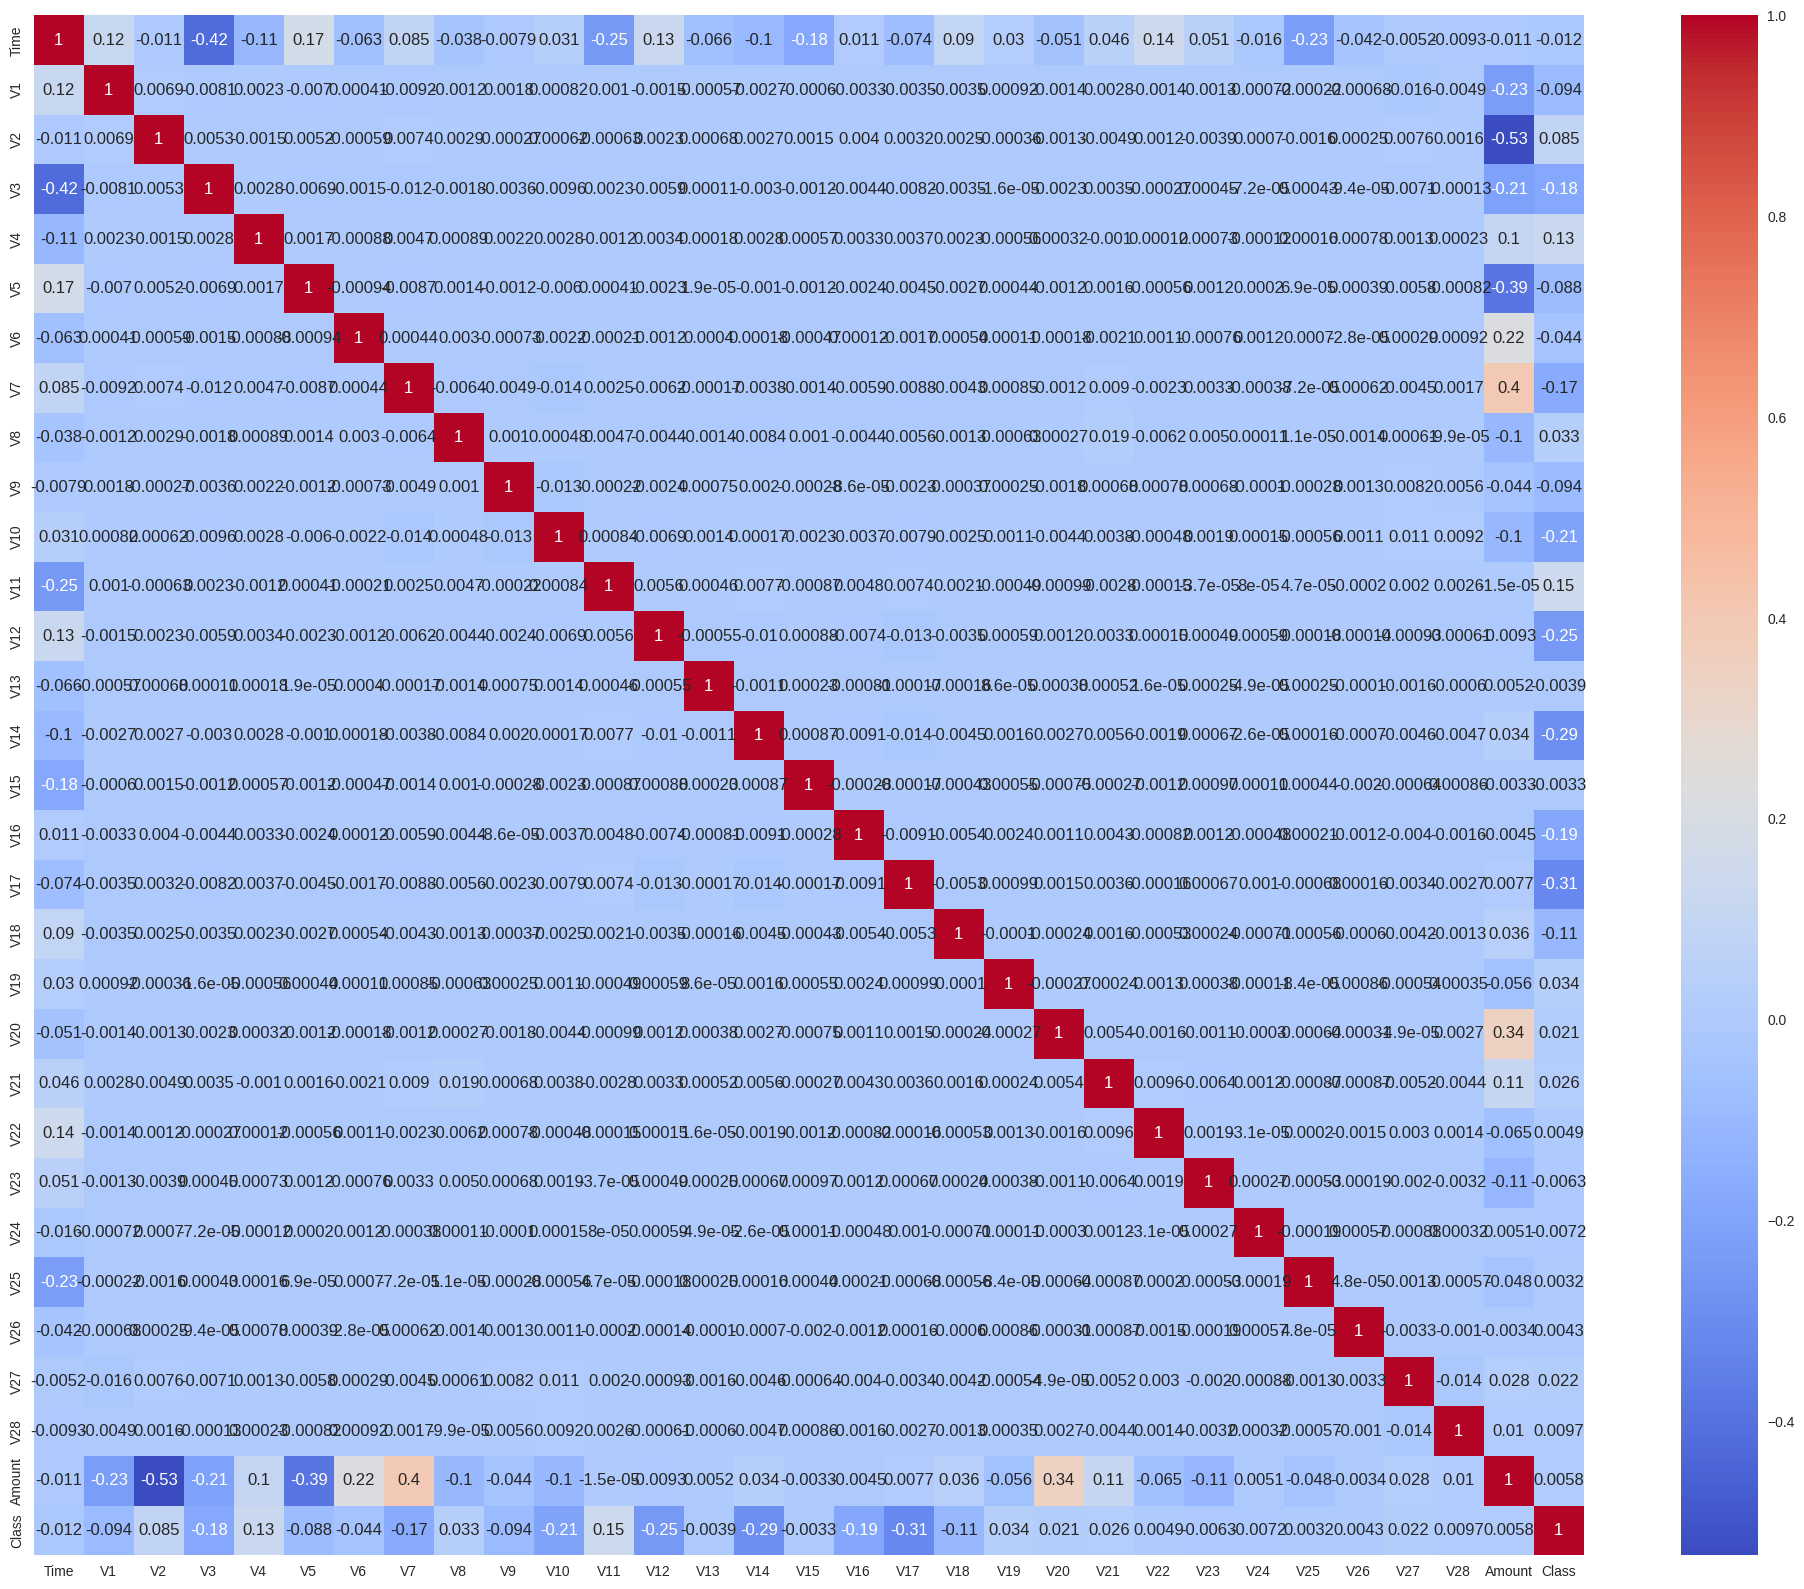

In [ ]:
# Checking the correlation with heatmap
plt.figure(figsize=(25,20))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

Here we will observe the distribution of our classes

#### Positive Correlation:
- Amount and V7
- Amount and V12
- Amount and V20

#### Negative Correlation:
- Amount and V2
- Amount and V5
- Amount and V17

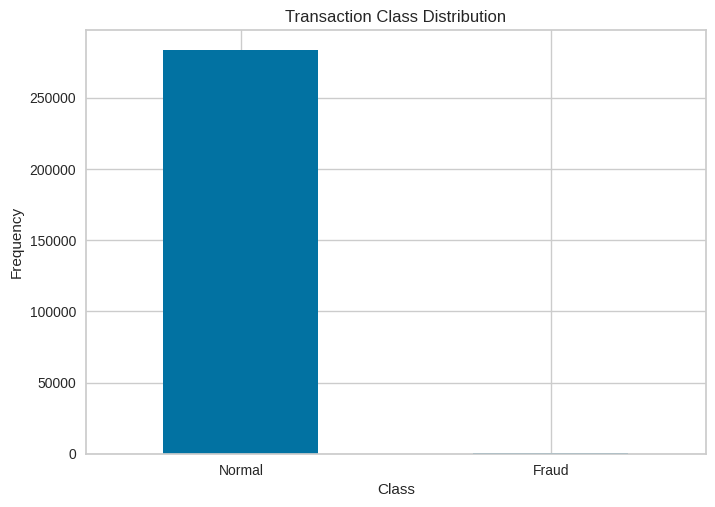

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")
plt.show()


In [ ]:
# Checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('Percentage of Normal Transactions:',normal_share)
print('\nPercentage of Fraud Transactions:',fraud_share)

Percentage of Normal Transactions: 99.83328986416473

Percentage of Fraud Transactions: 0.1667101358352777


In [ ]:
print('===========================COUNT=========================')
print('\n\tNo. of Normal Transaction:',classes[0])
print('\tNo. of Fraud Transaction:',classes[1])

print('\n=======================PERCENTAGE========================')

print('\n\tPercentage of Normal Transaction:',normal_share)
print('\tPercentage of Fraud Transaction:',fraud_share)


===========================COUNT=========================

	No. of Normal Transaction: 283253
	No. of Fraud Transaction: 473

=======================PERCENTAGE========================

	Percentage of Normal Transaction: 99.83328986416473
	Percentage of Fraud Transaction: 0.1667101358352777


In [9]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)

In [10]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column
df.drop('Time', axis = 1, inplace= True)

In [ ]:
## Get the Fraud and the normal dataset

Fraud = df[df['Class']==1]

Normal = df[df['Class']==0]

print('Shape of data with fraud transactions',Fraud.shape,'\nShape of data with normal transactions',Normal.shape)

Shape of data with fraud transactions (473, 31) 
Shape of data with normal transactions (283253, 31)


In [ ]:
## We need to analyze more amount of information from the transaction data

Fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
Normal.Amount.describe()


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

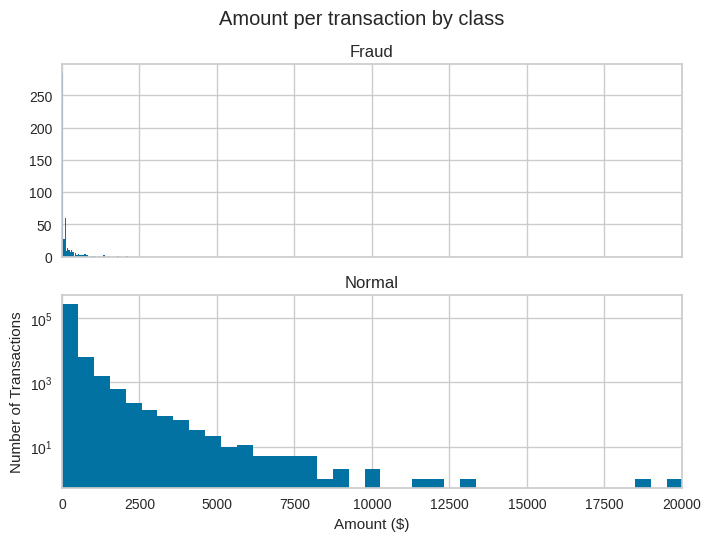

In [ ]:
## We need to analyze more amount of information from the transaction data

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

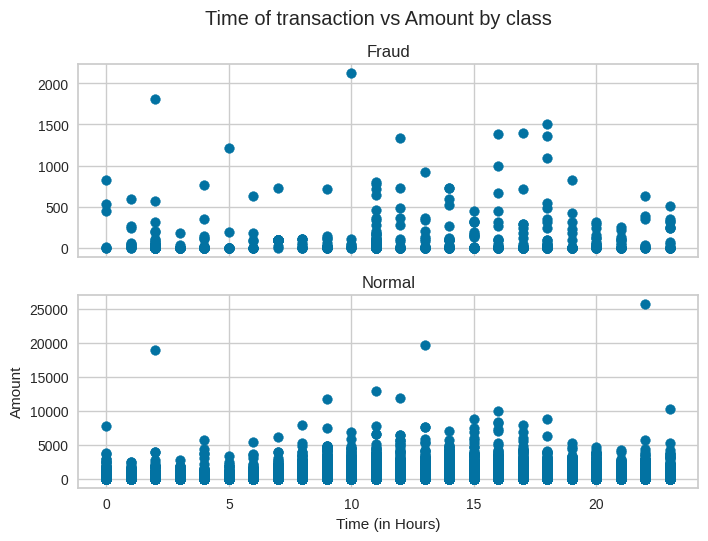

In [ ]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time_Hour, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time_Hour, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


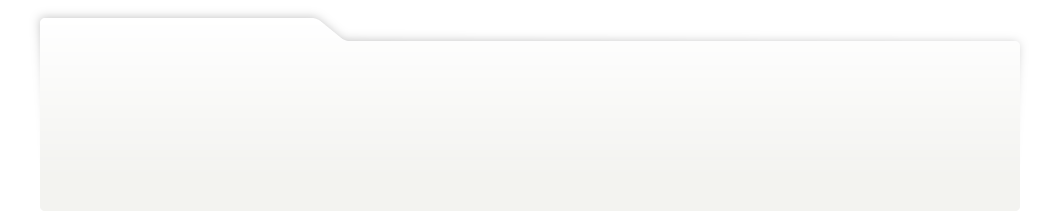
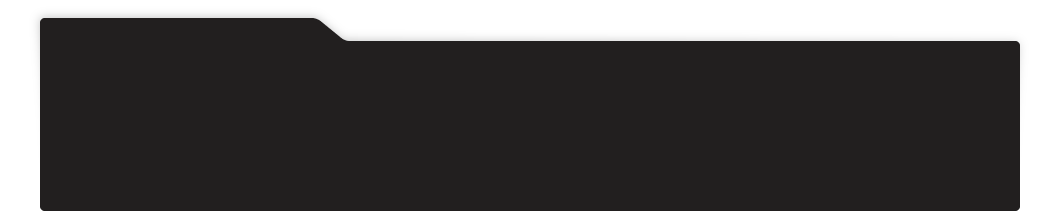
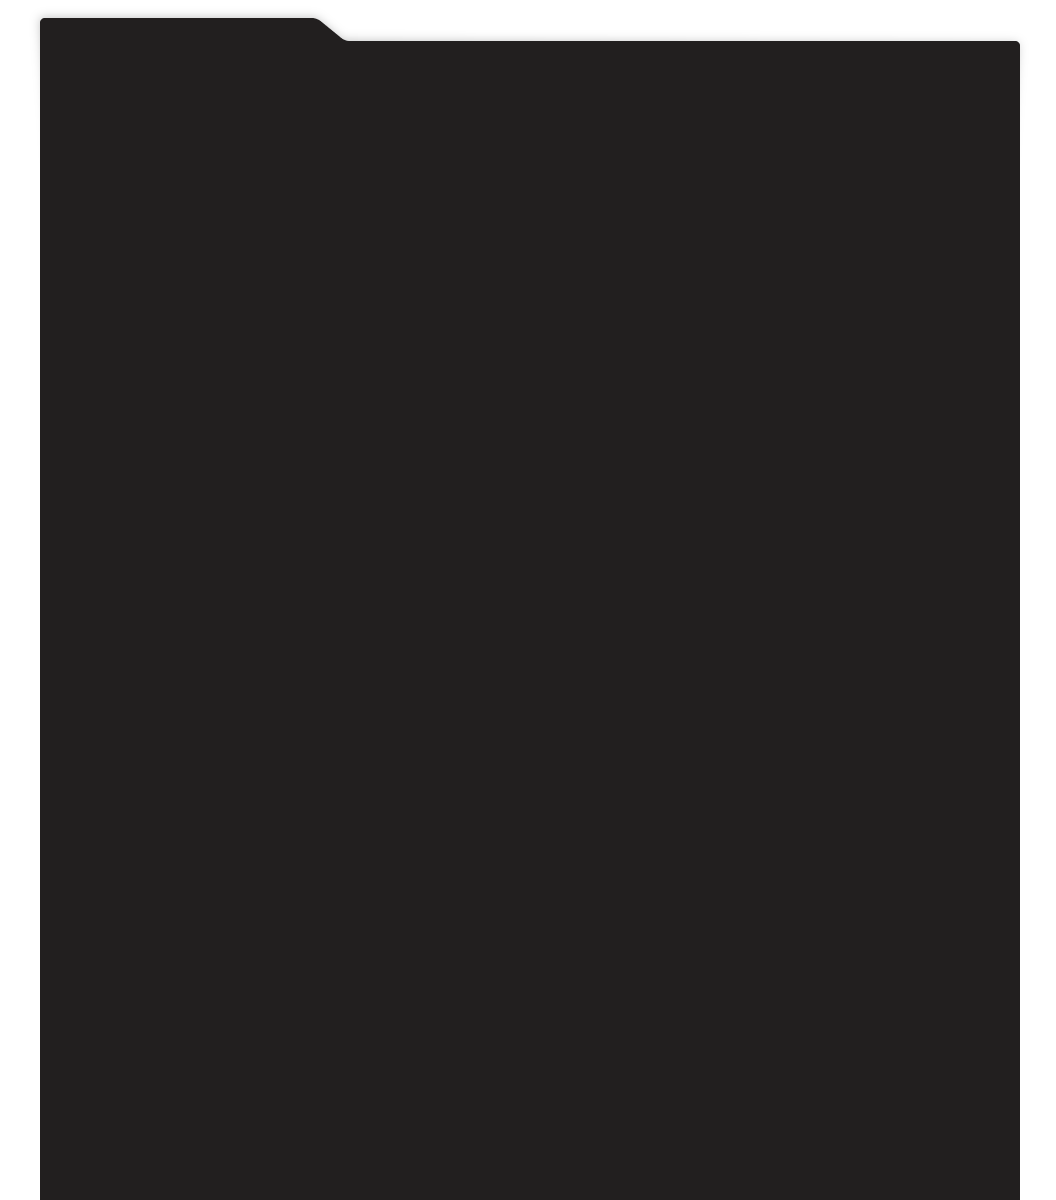
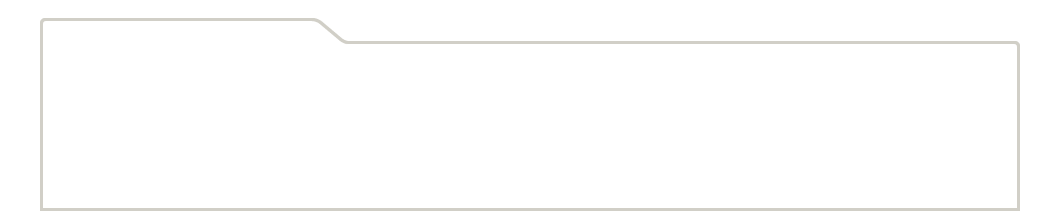
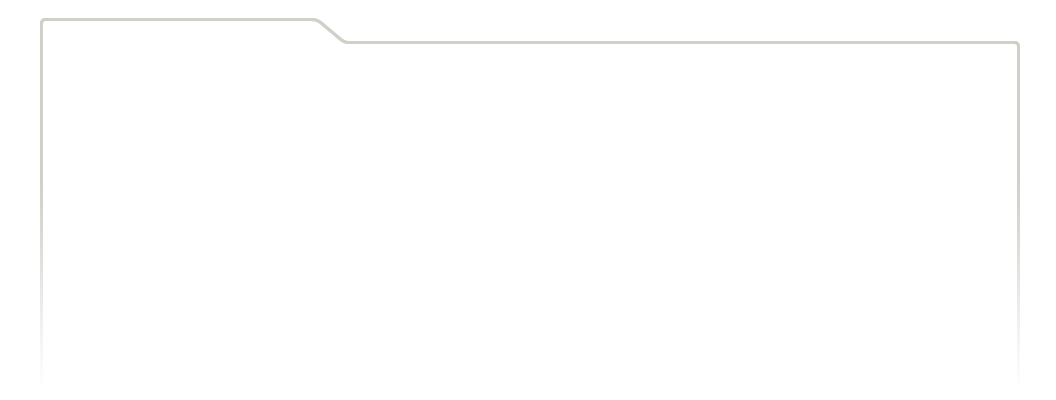
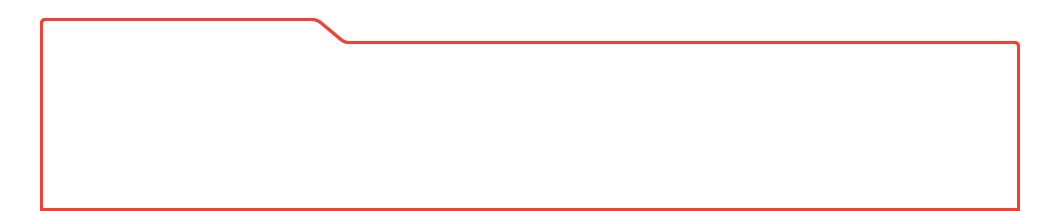
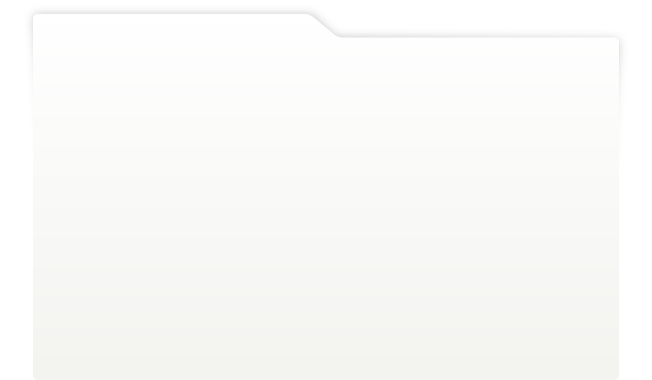
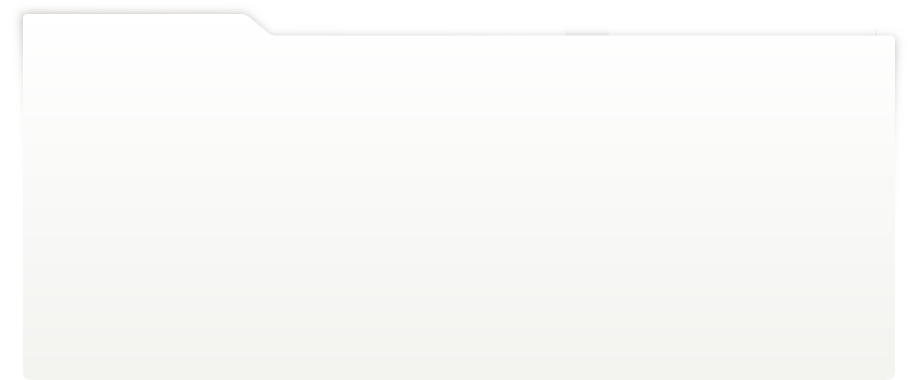
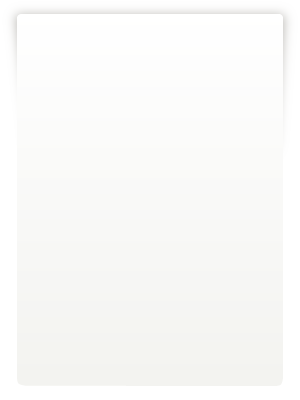
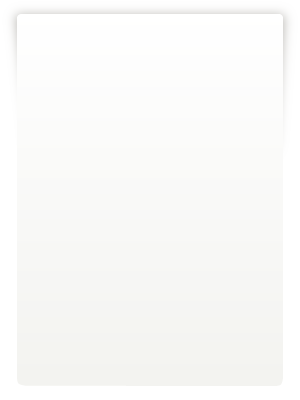
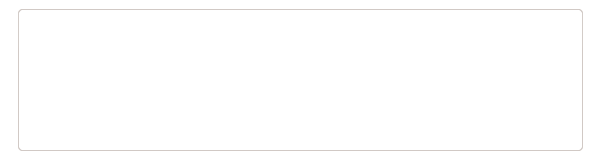
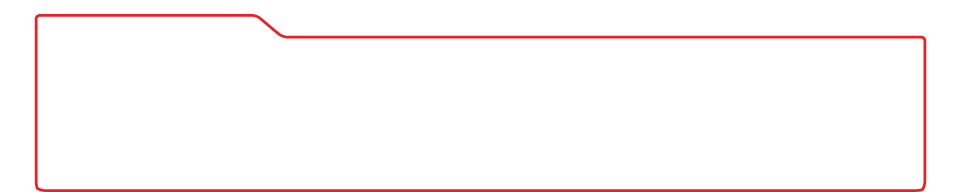
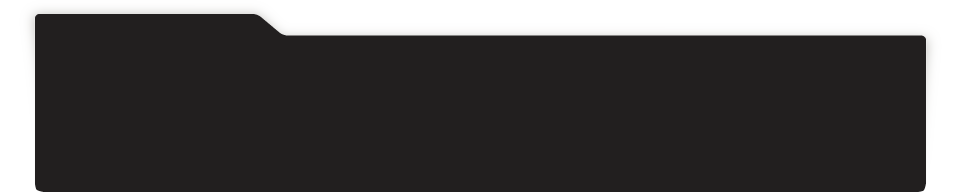
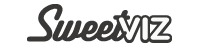
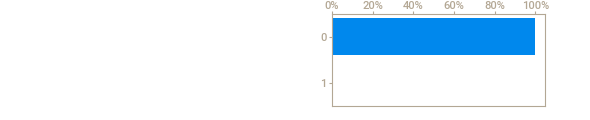
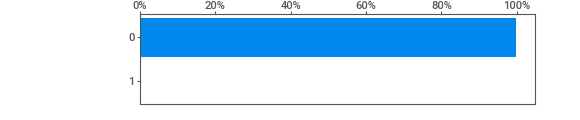
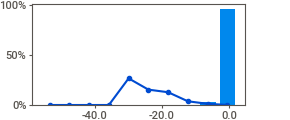
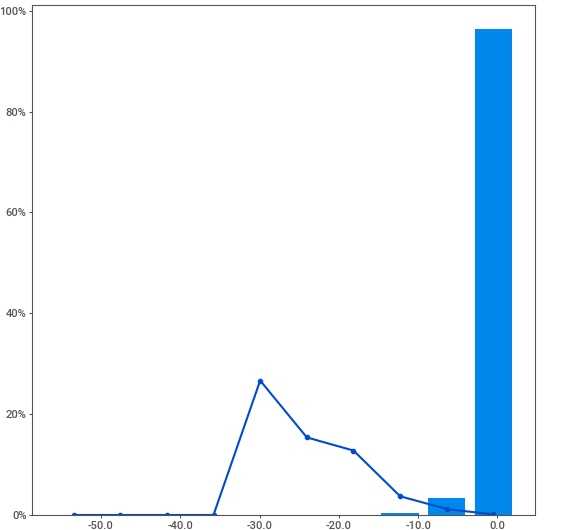
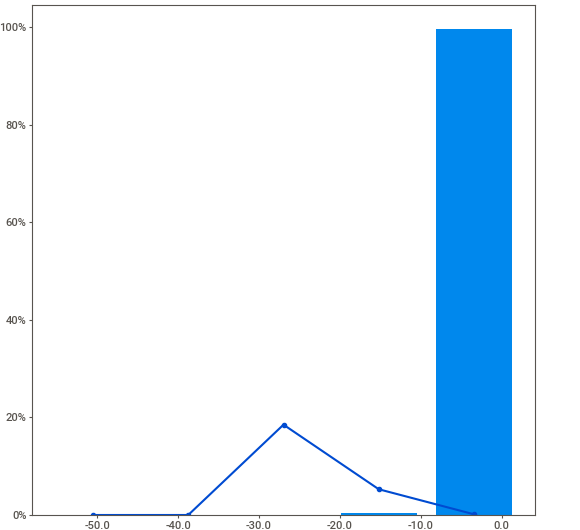
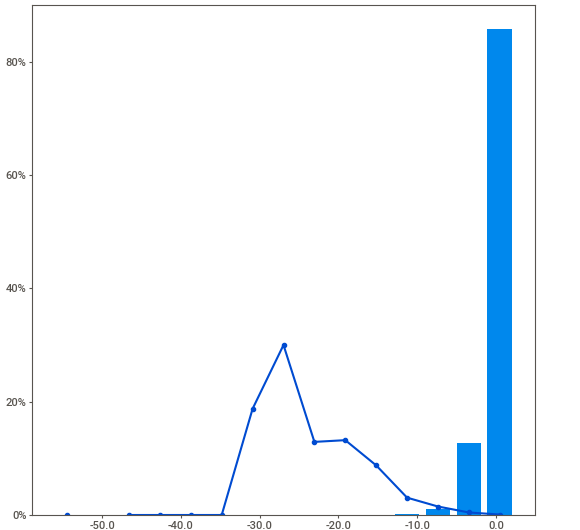
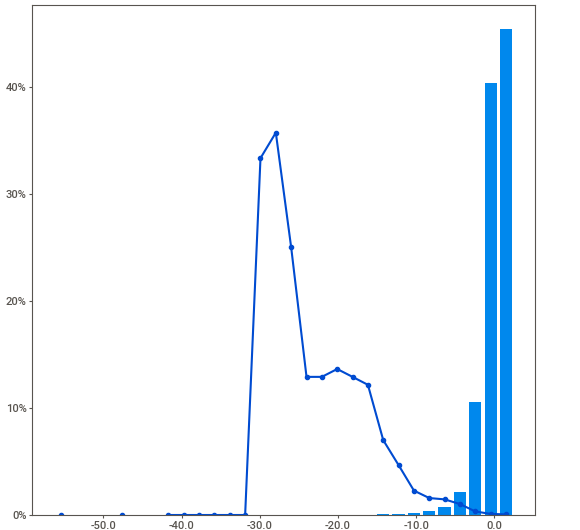
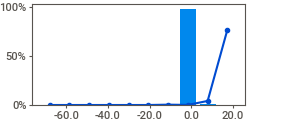
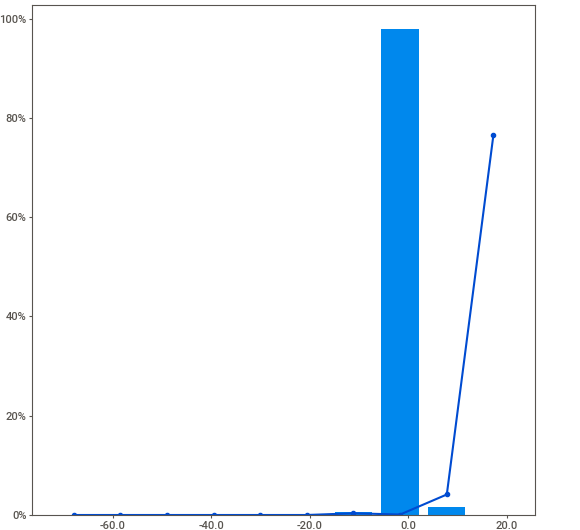
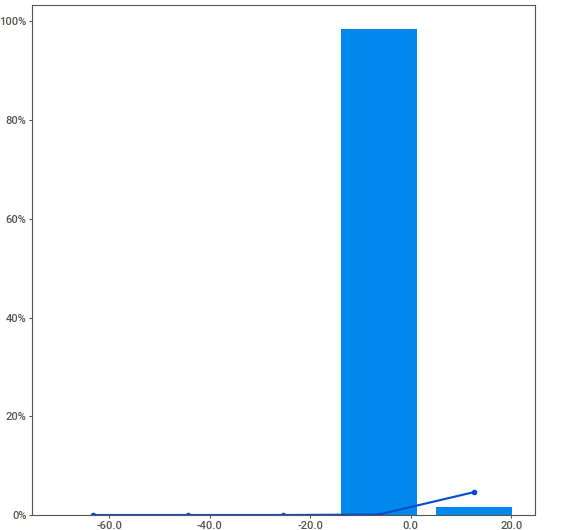
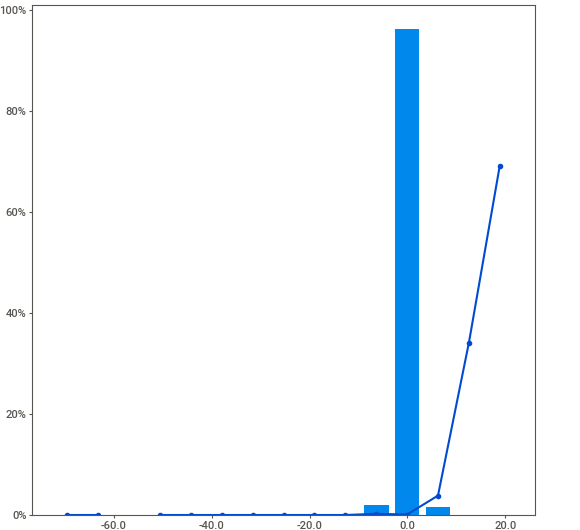
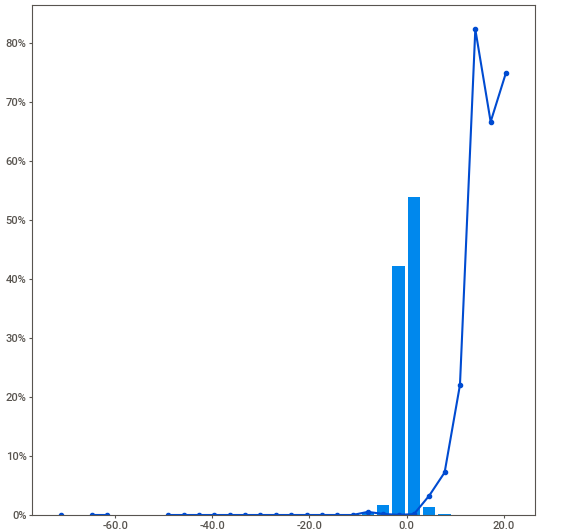
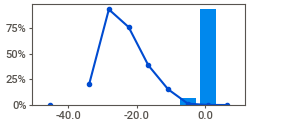
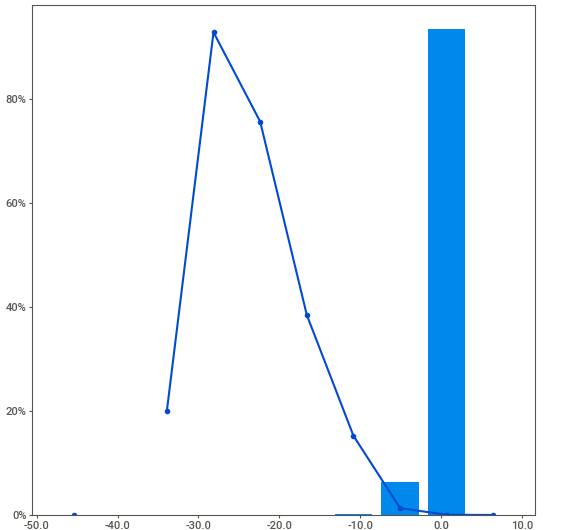
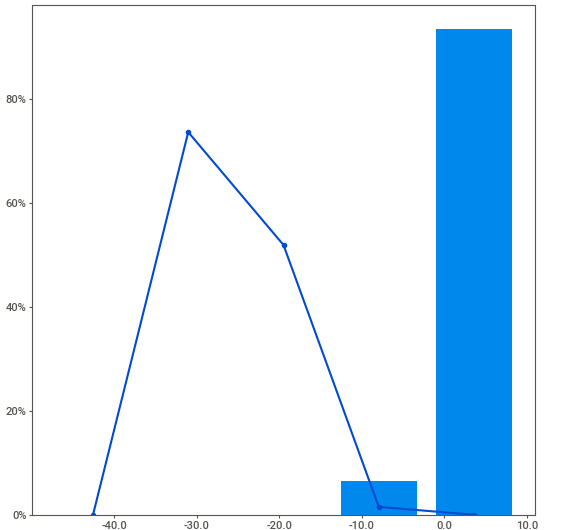
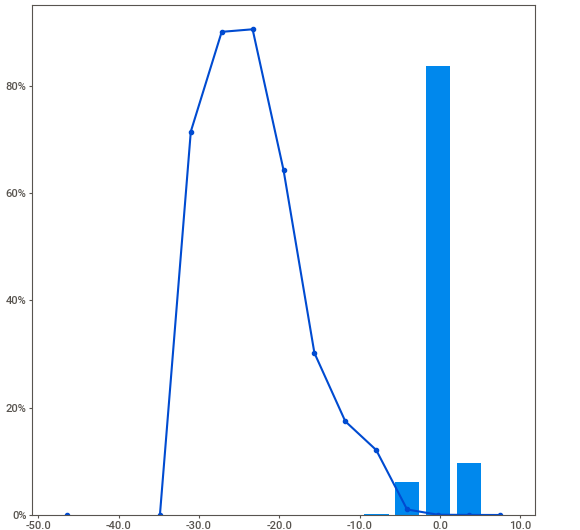
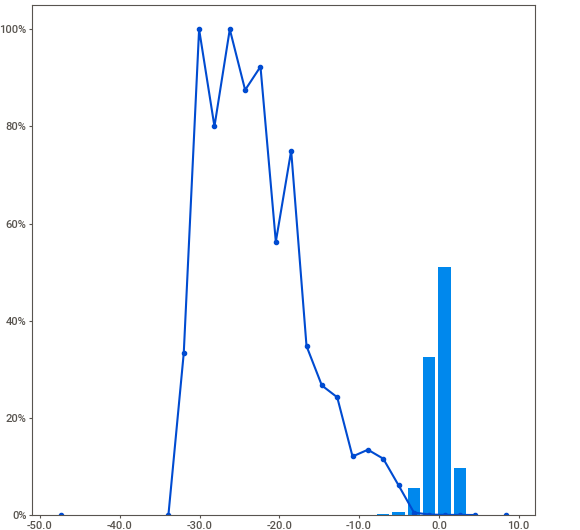
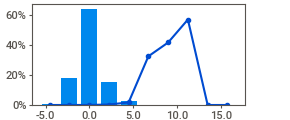
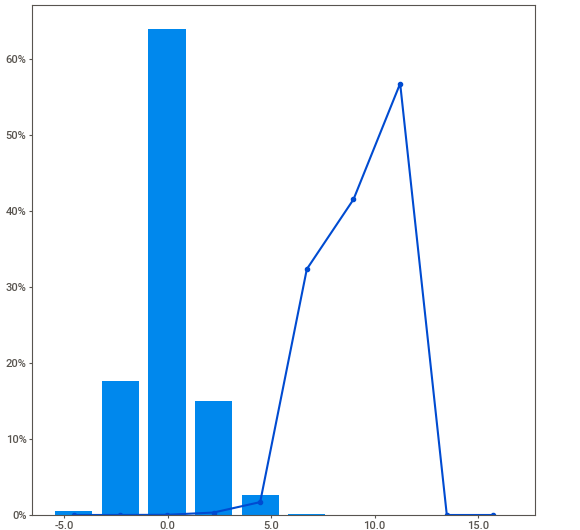
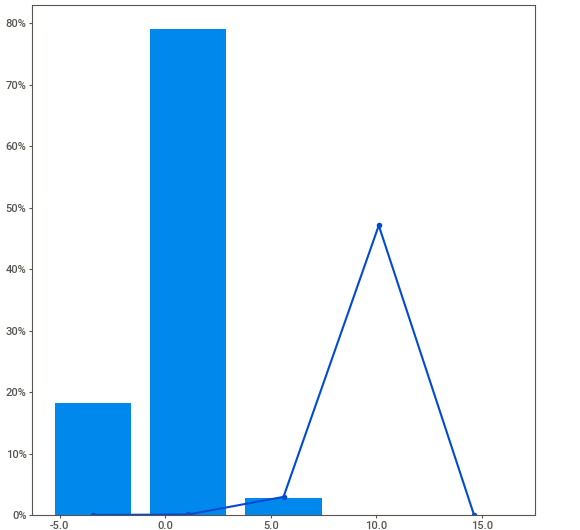
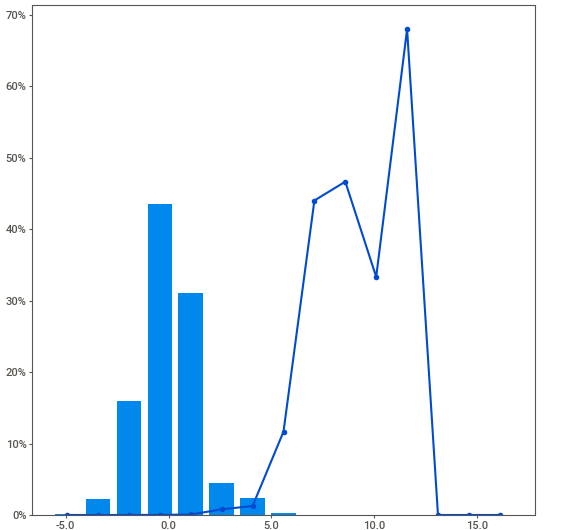
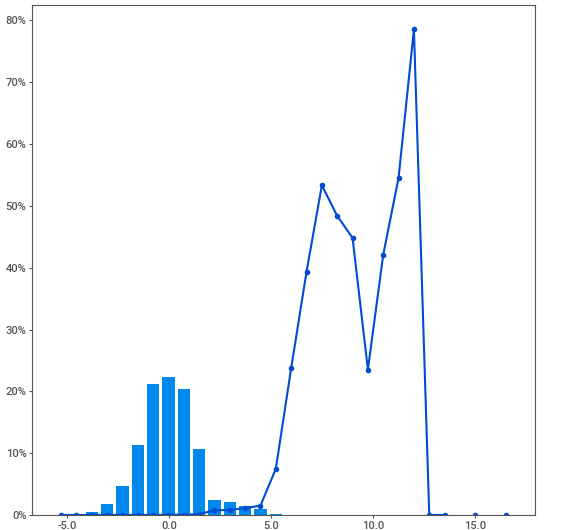
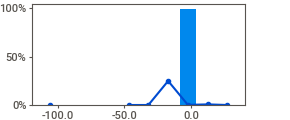
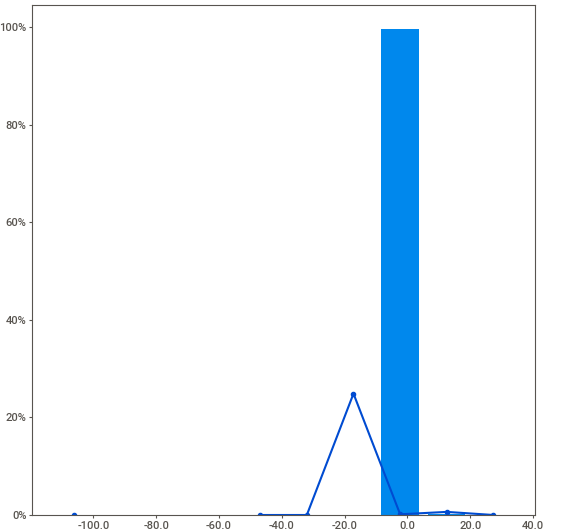
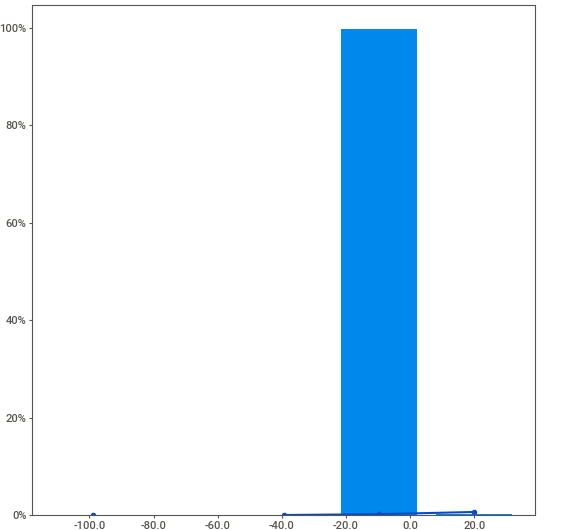
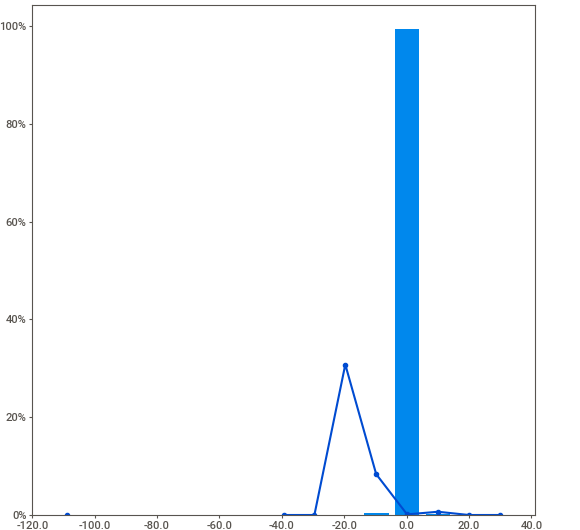
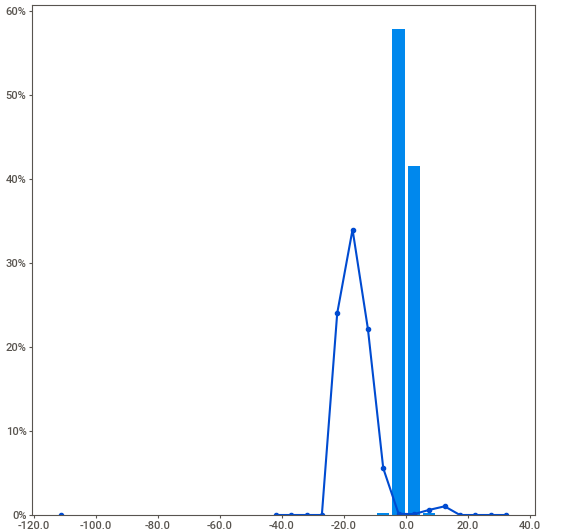
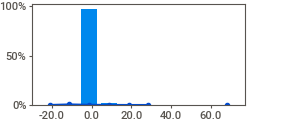
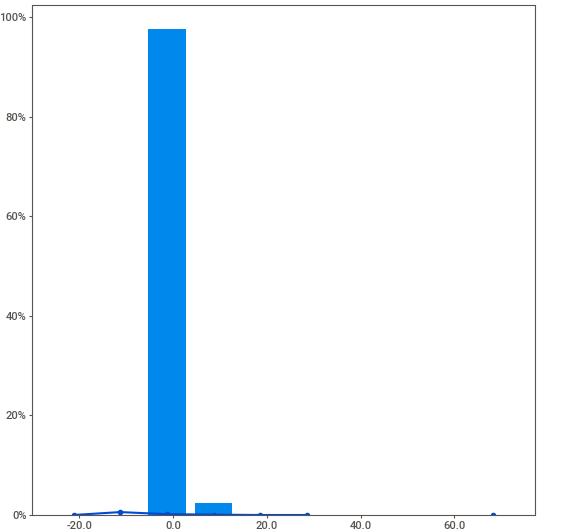
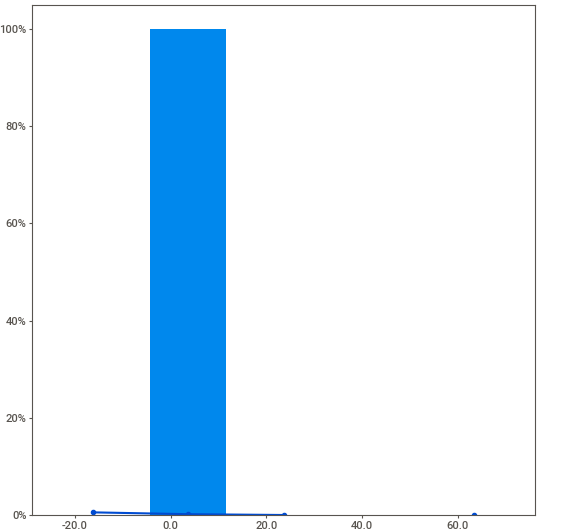
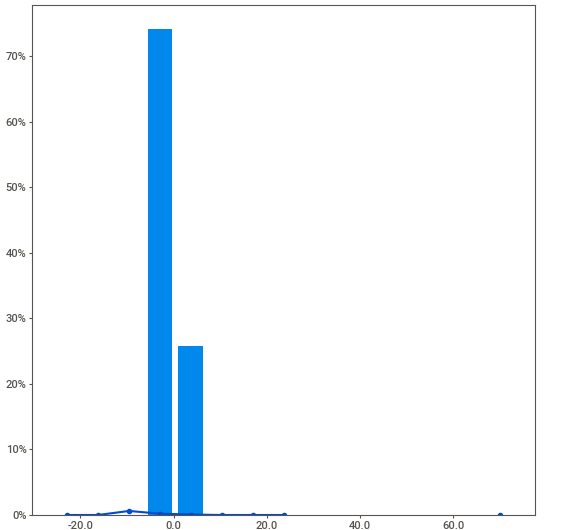
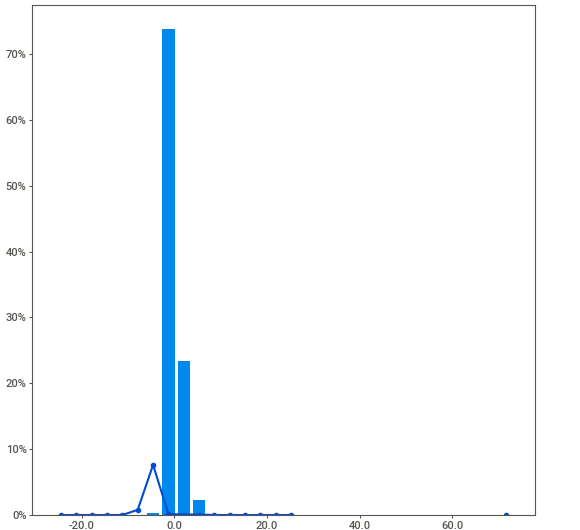
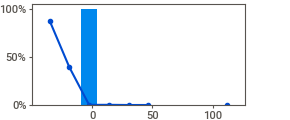
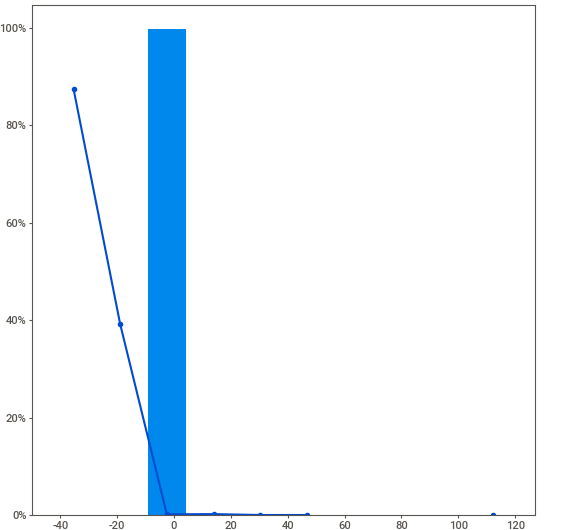
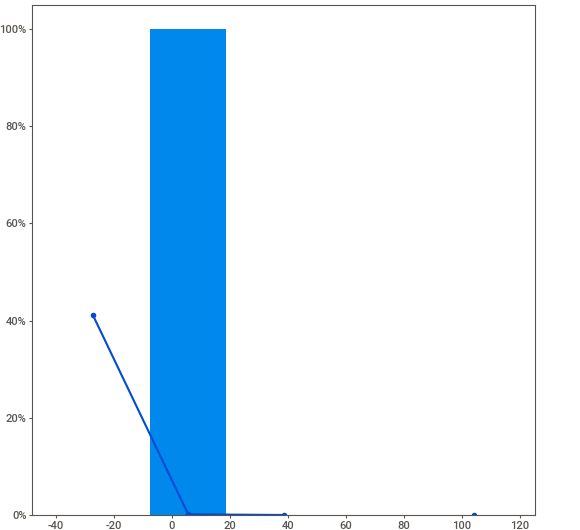
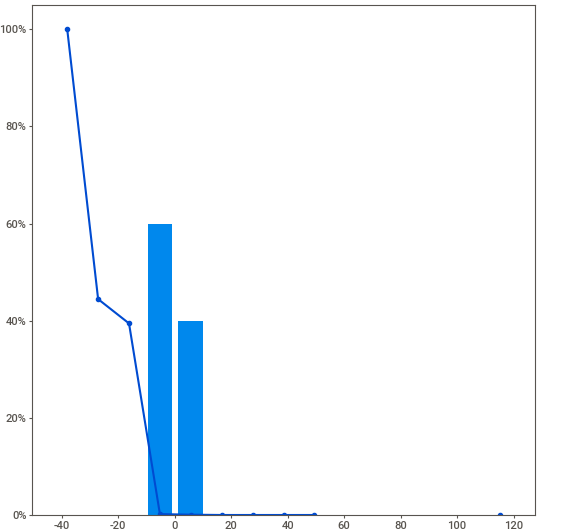
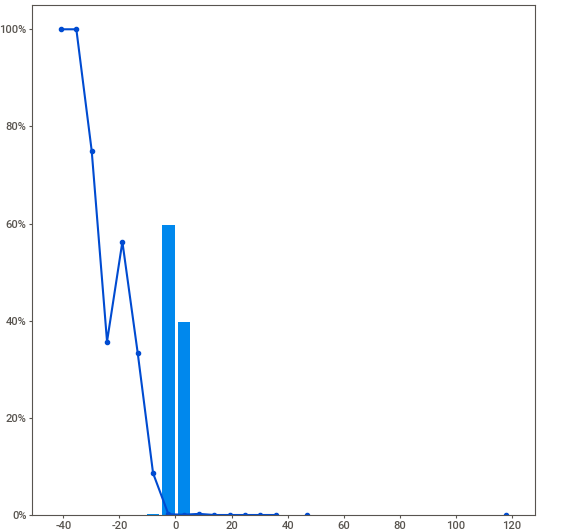
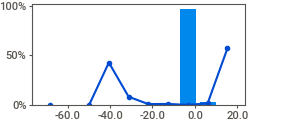
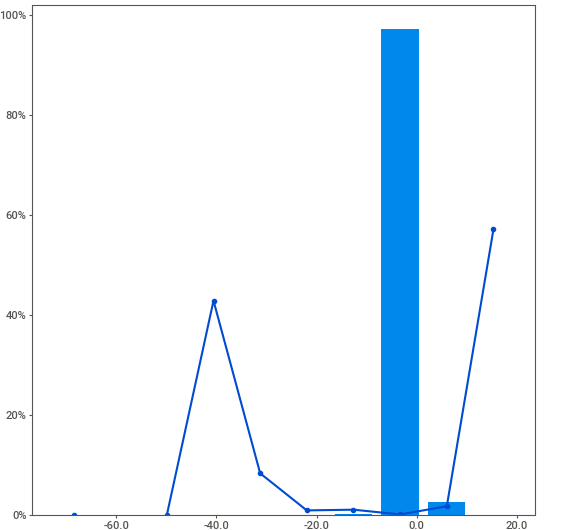
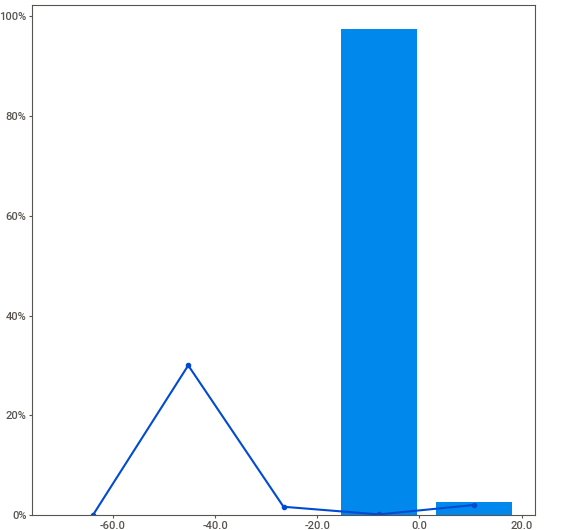
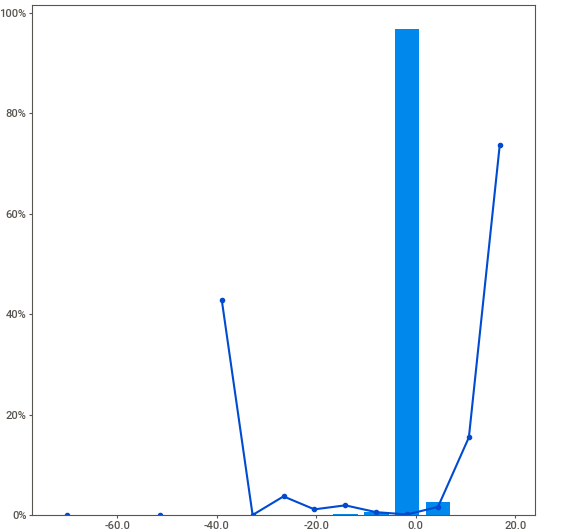
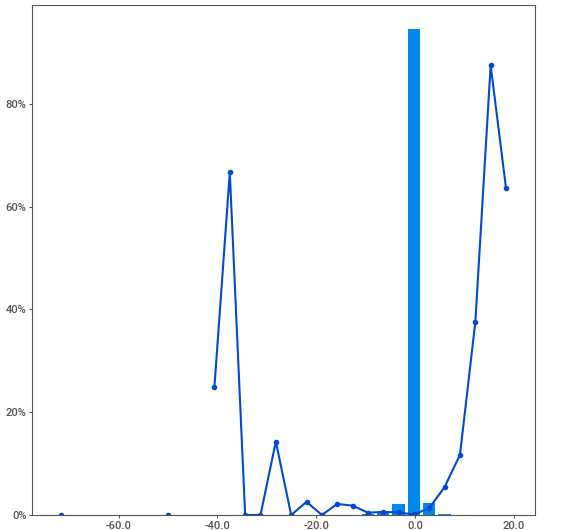
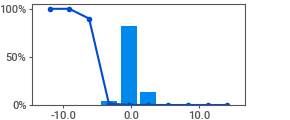
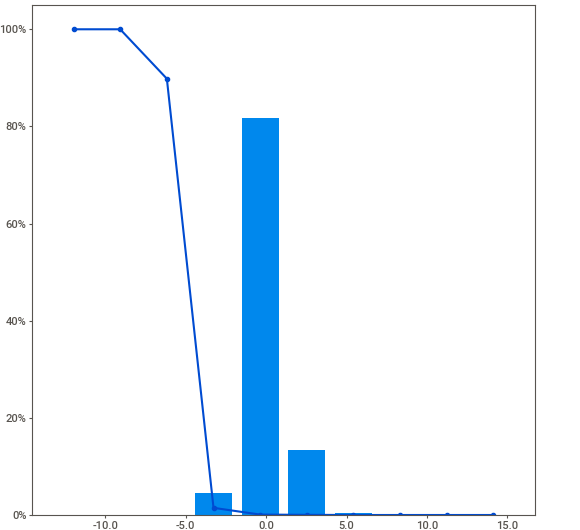
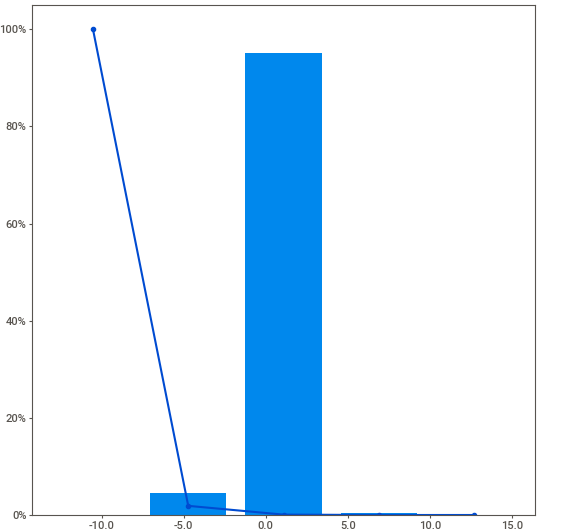
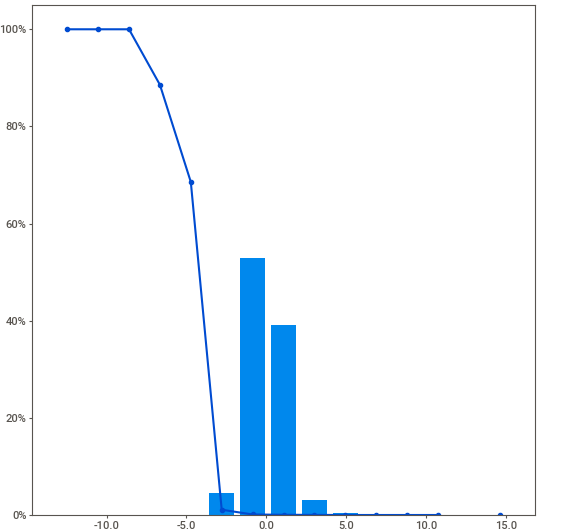
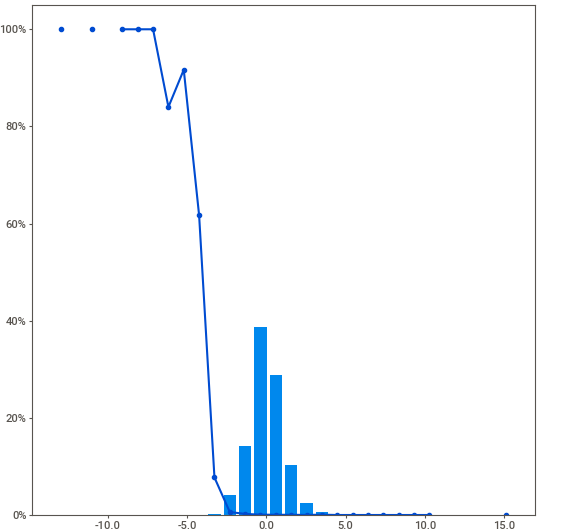
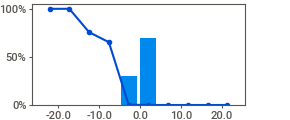
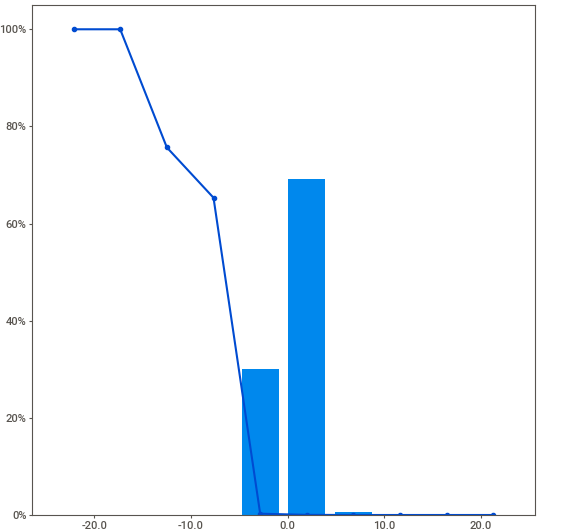
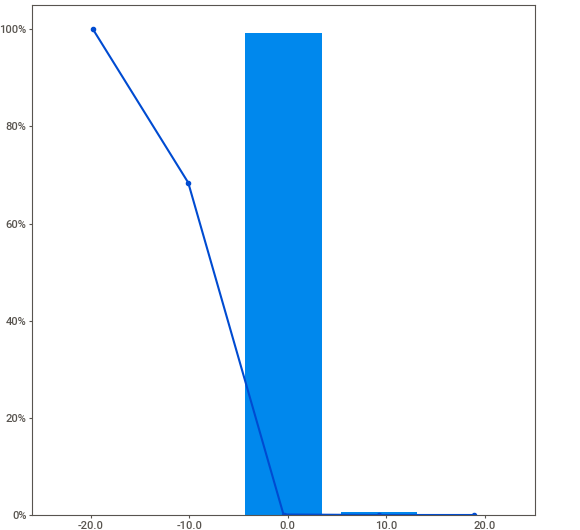
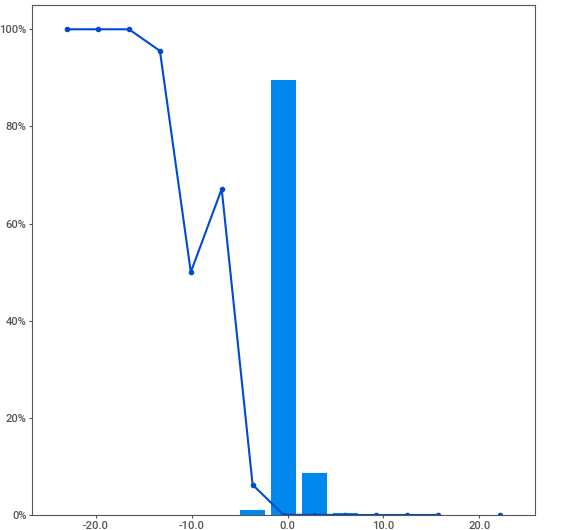
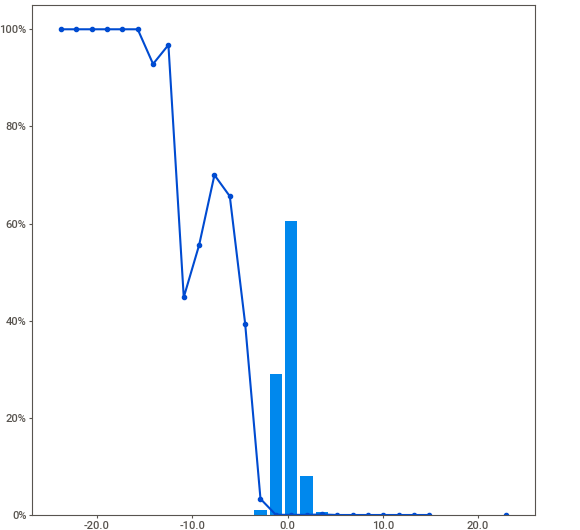
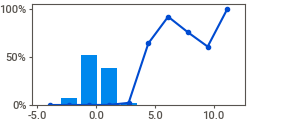
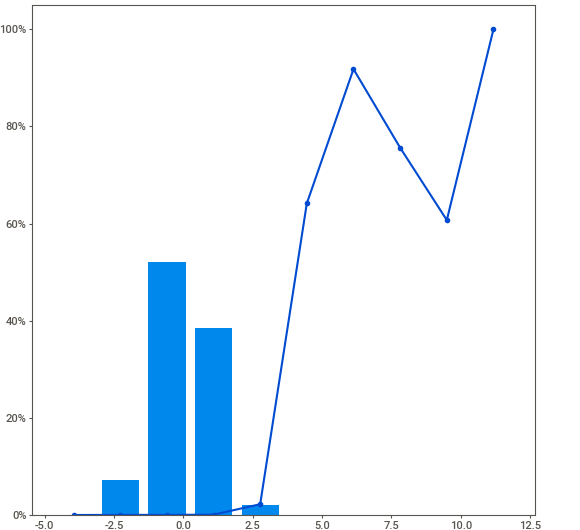
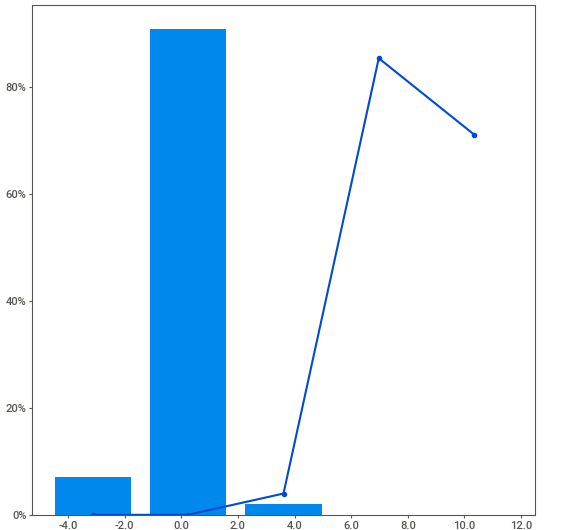
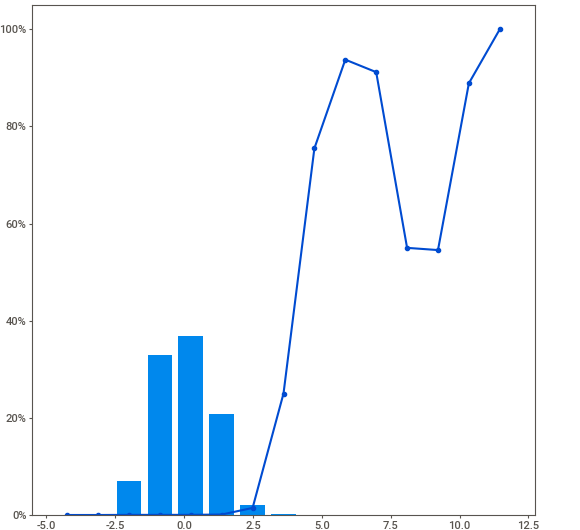
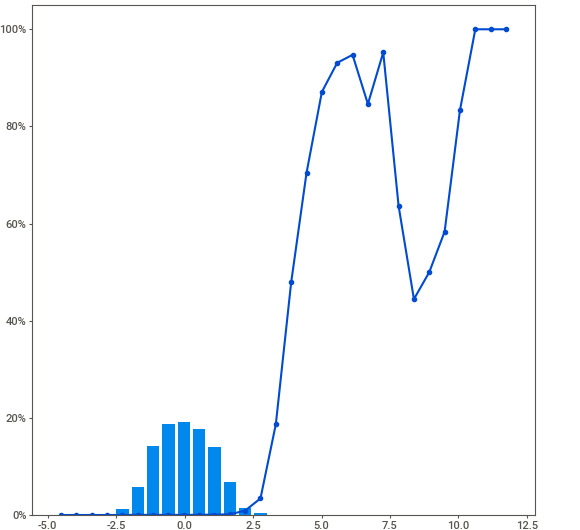
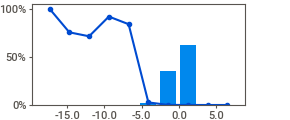
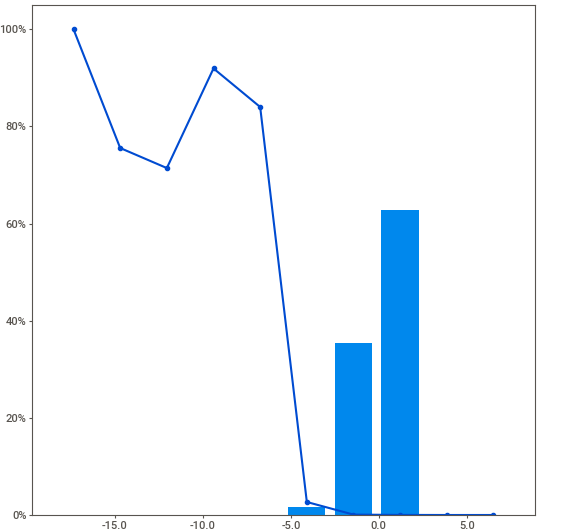
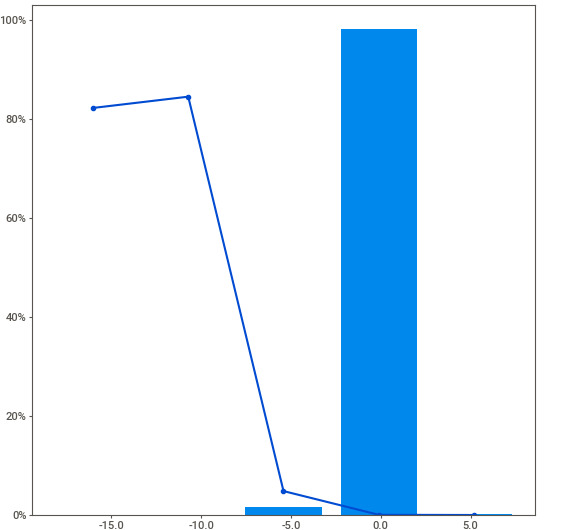
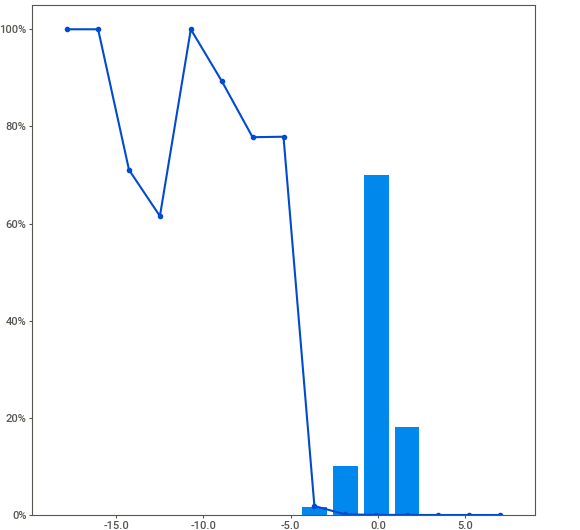
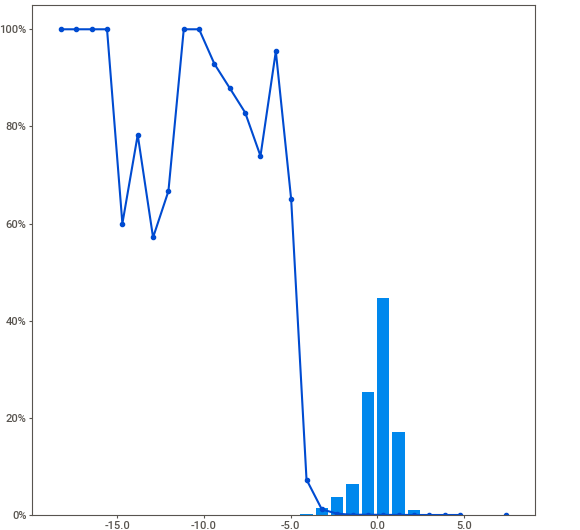
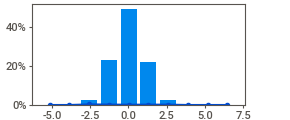
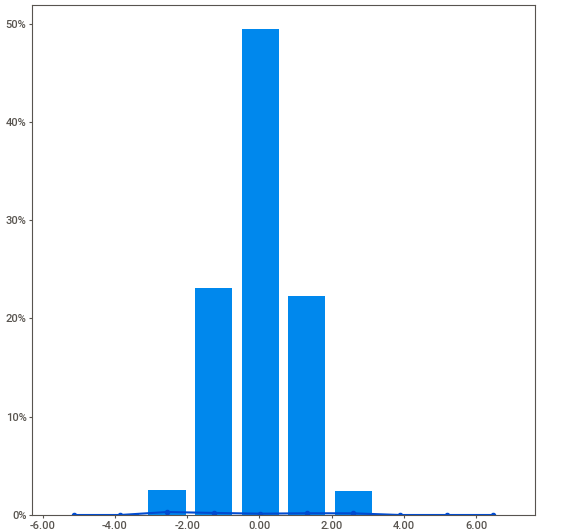
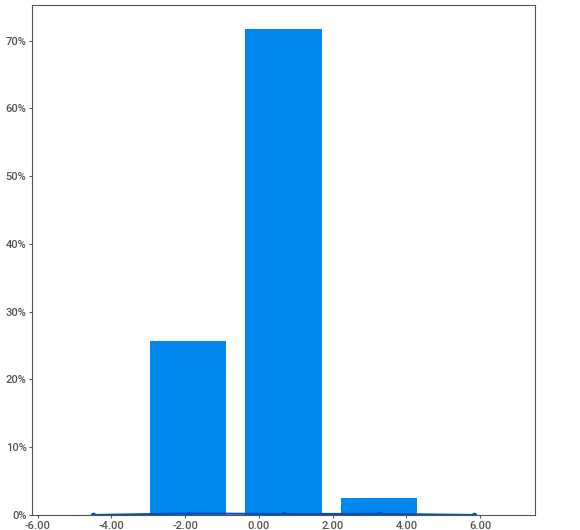
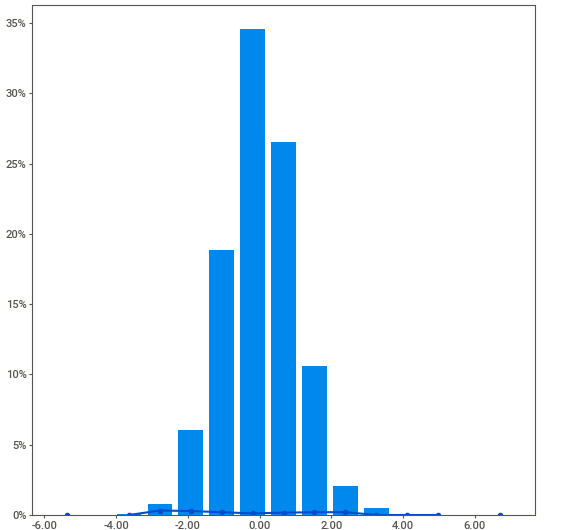
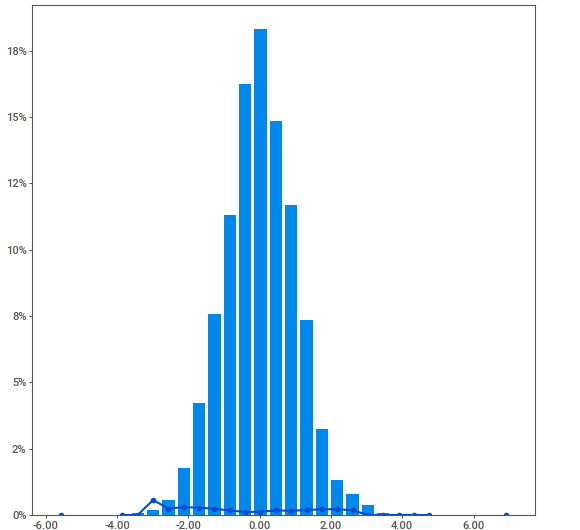
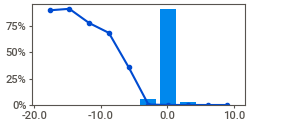
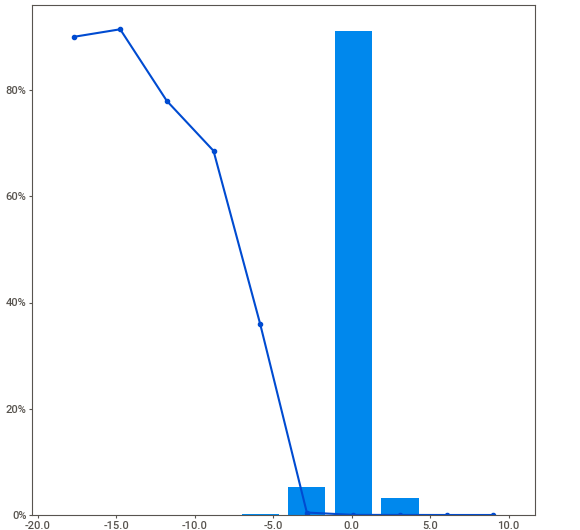
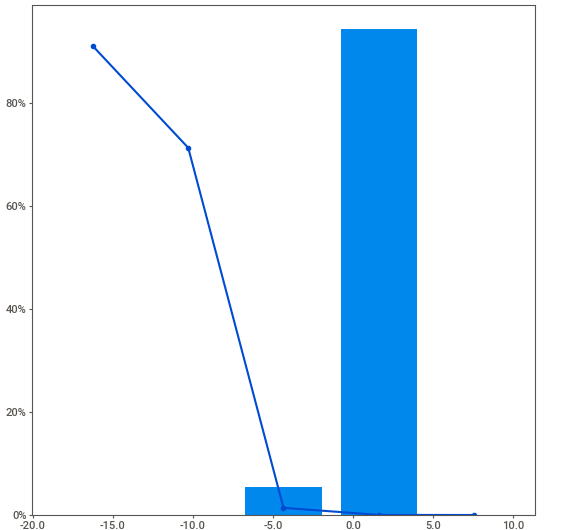
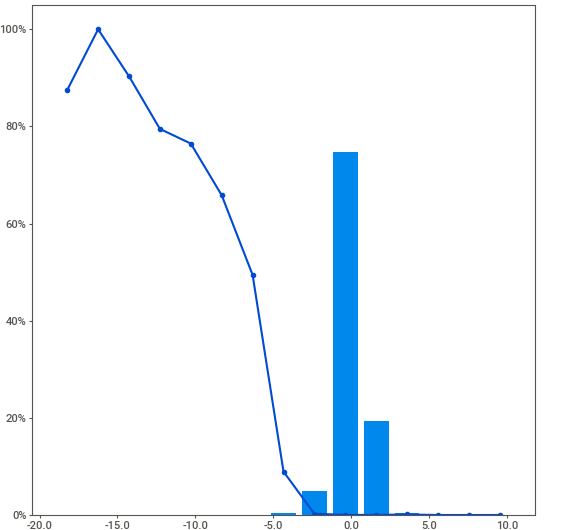
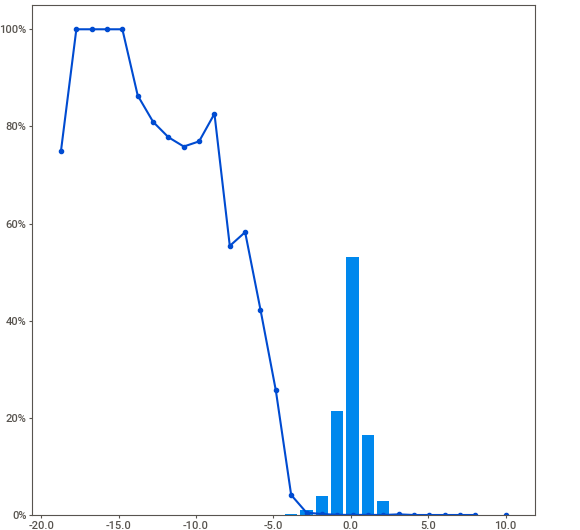
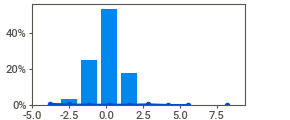
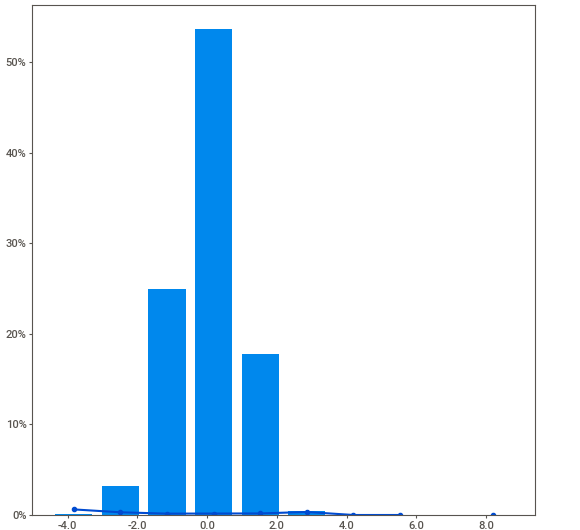
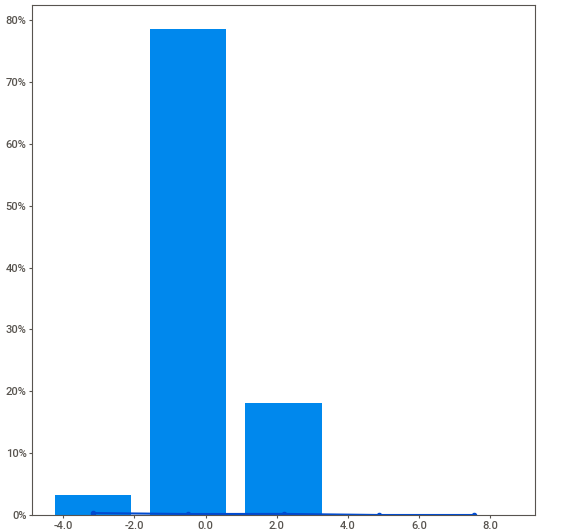
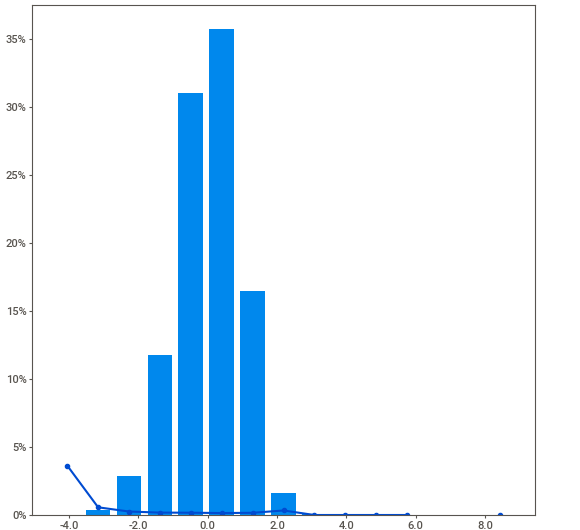
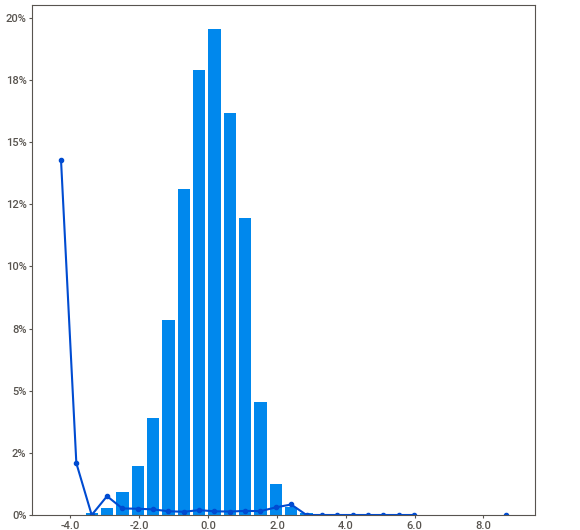
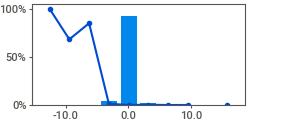
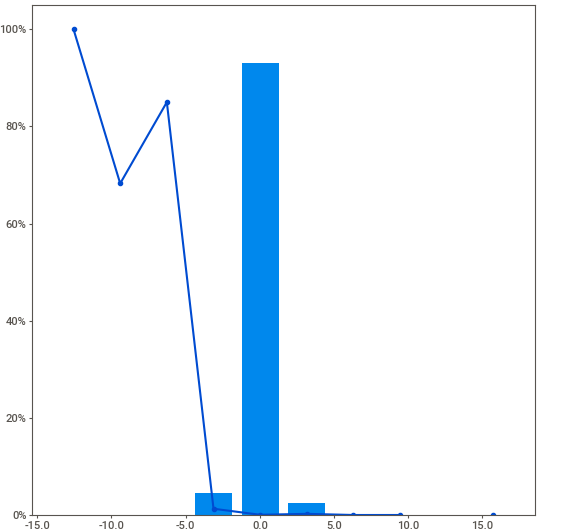
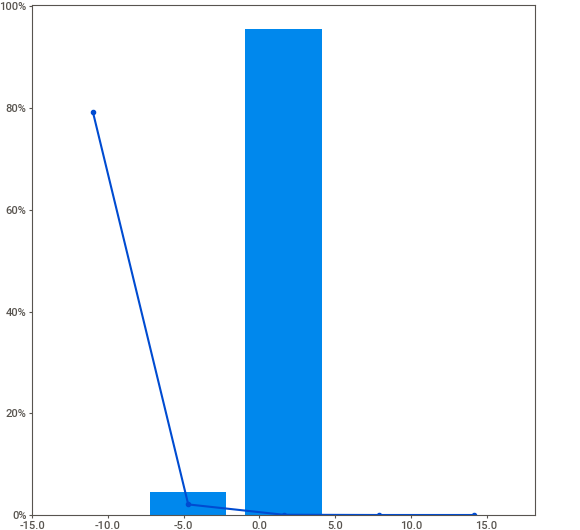
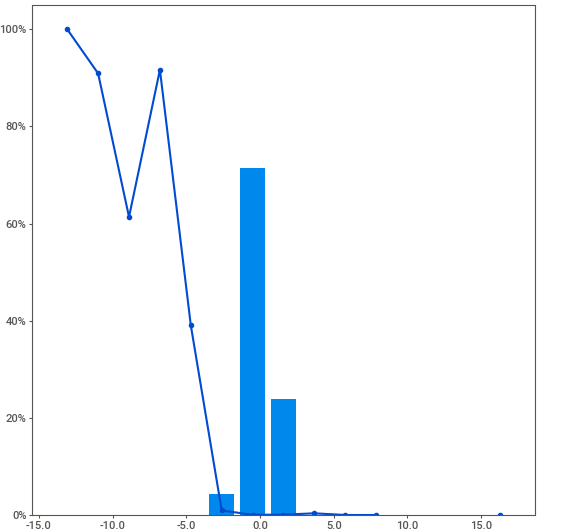
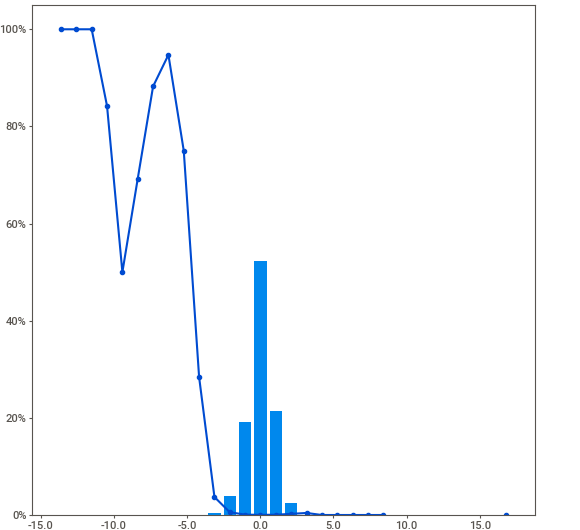
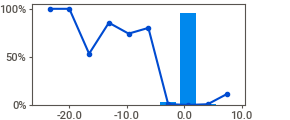
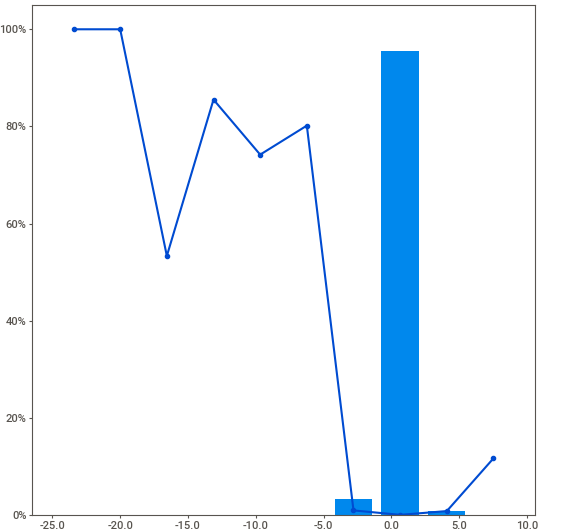
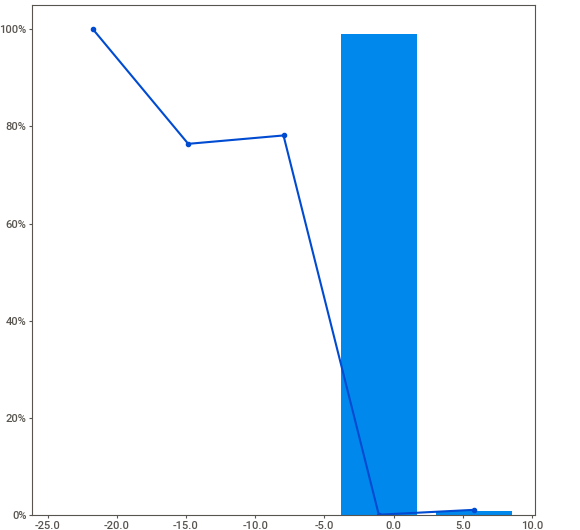
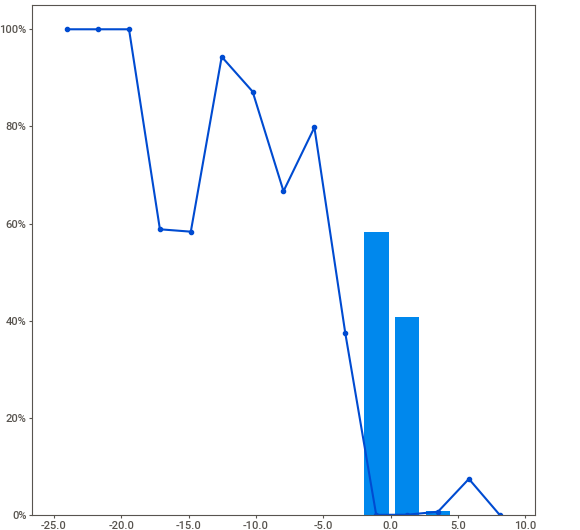
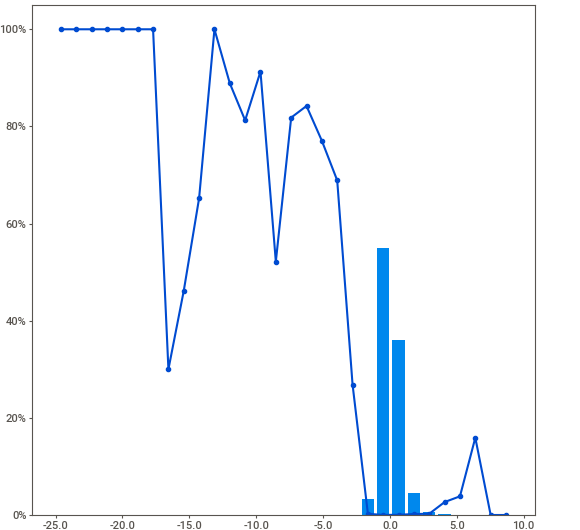
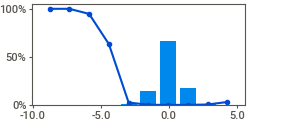
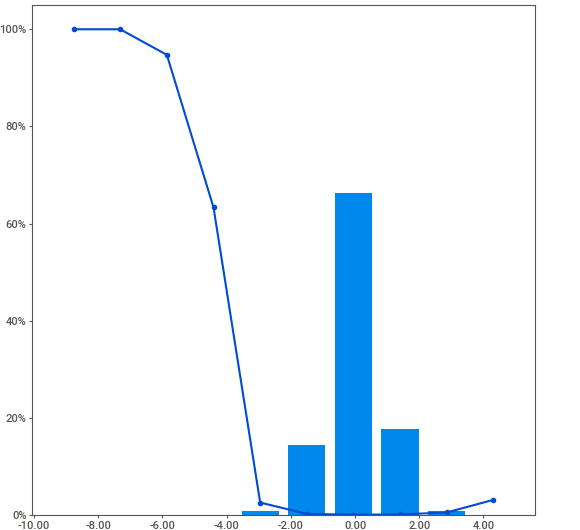
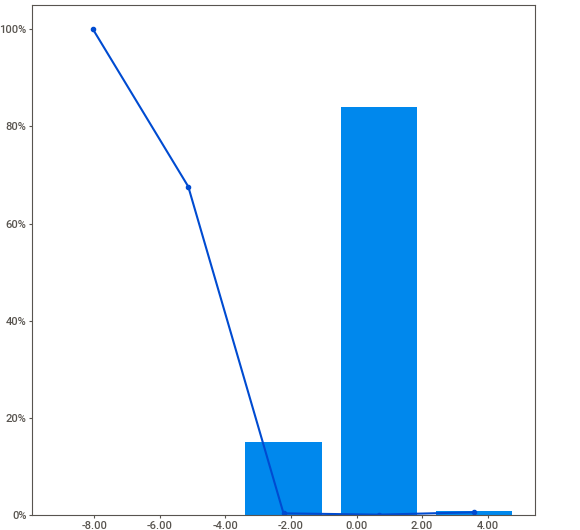
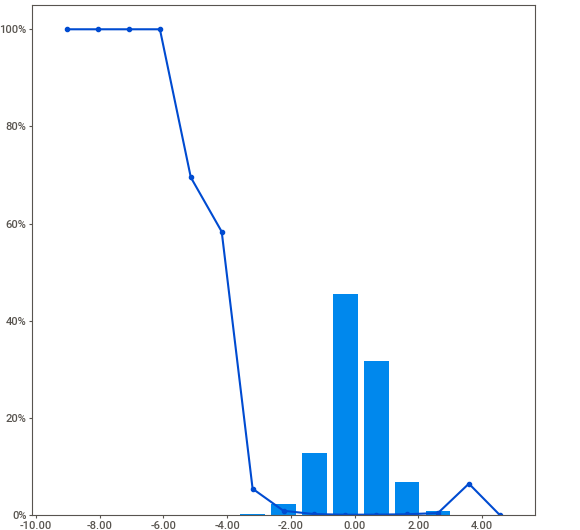
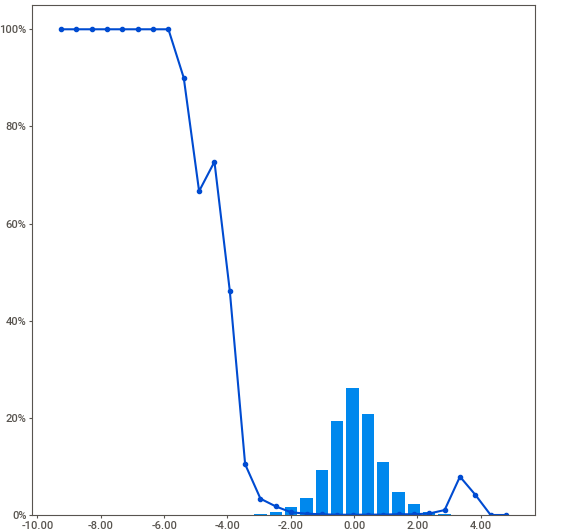
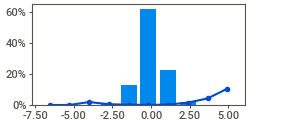
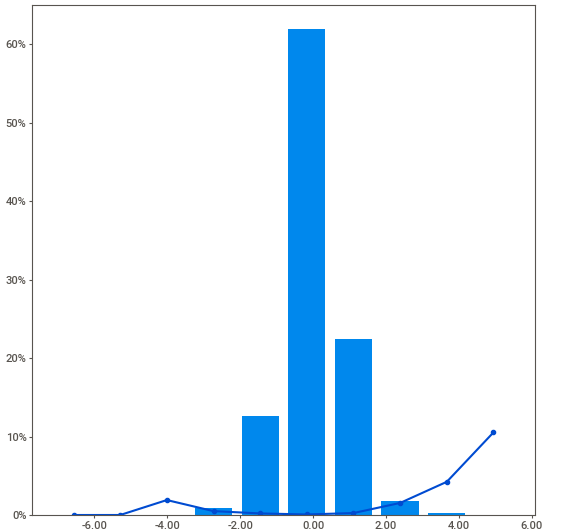
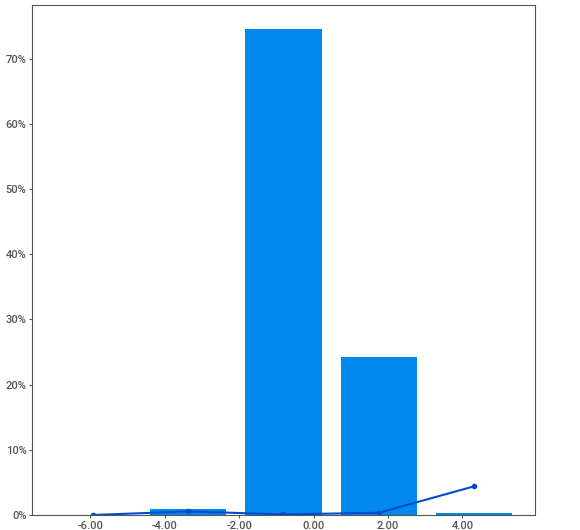
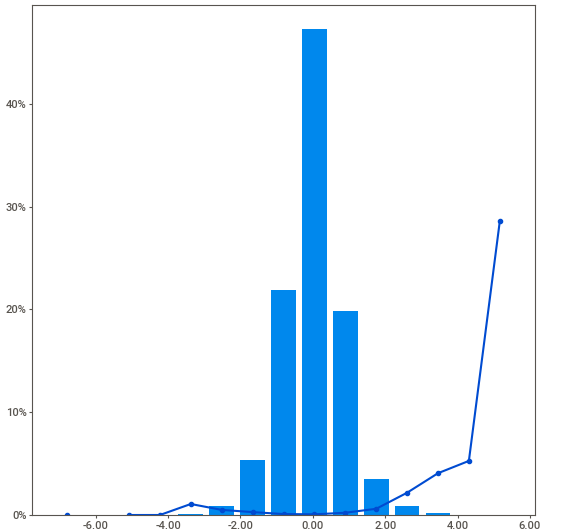
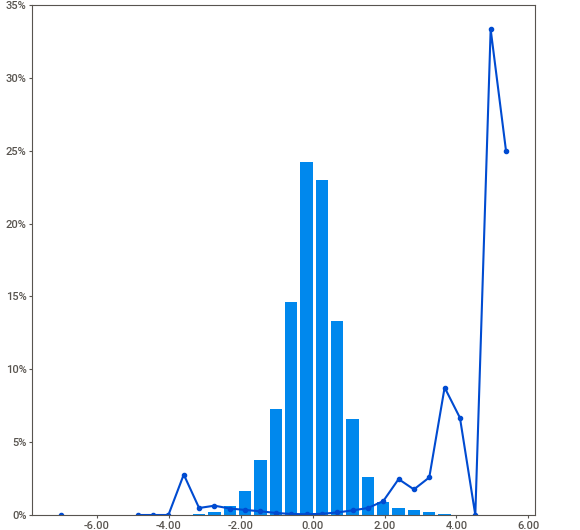
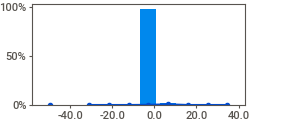
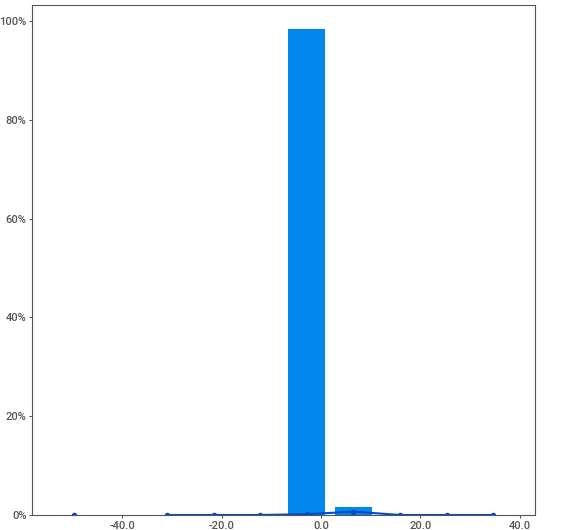
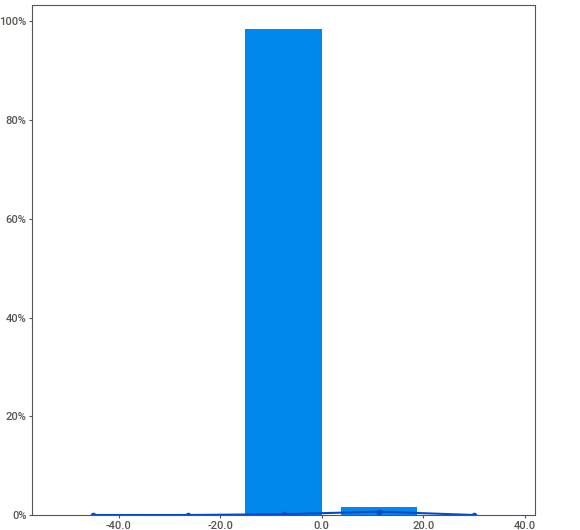
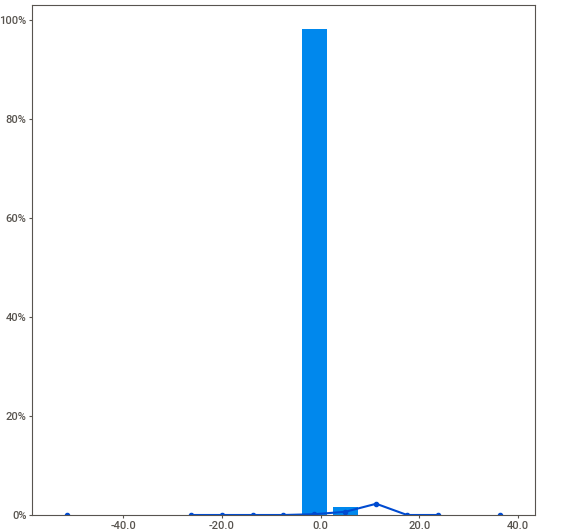
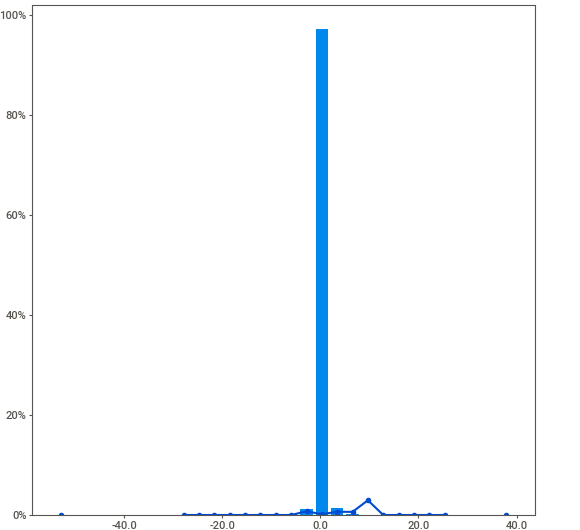
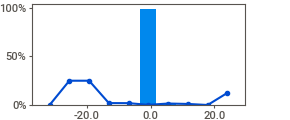
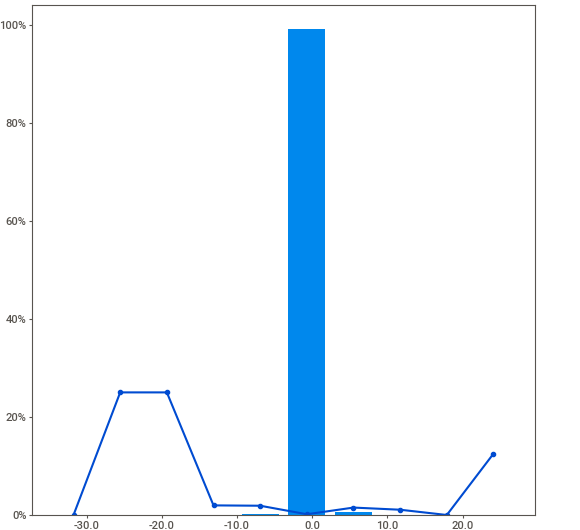
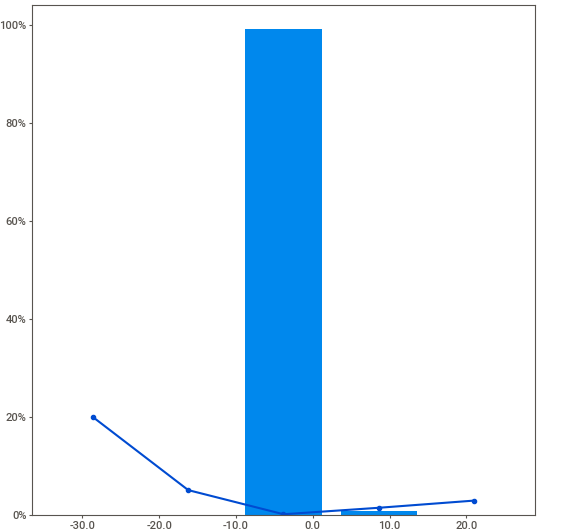
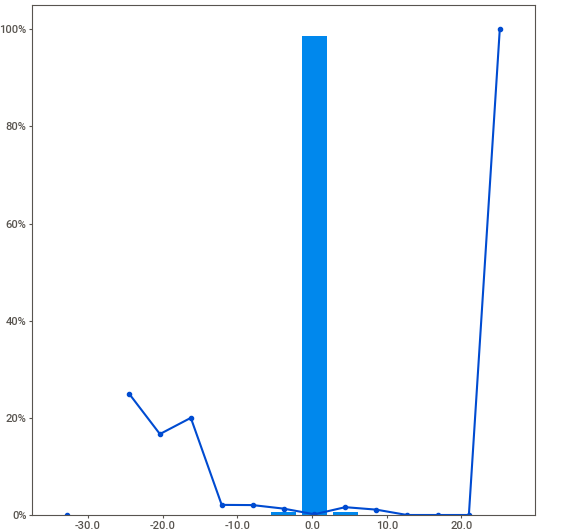
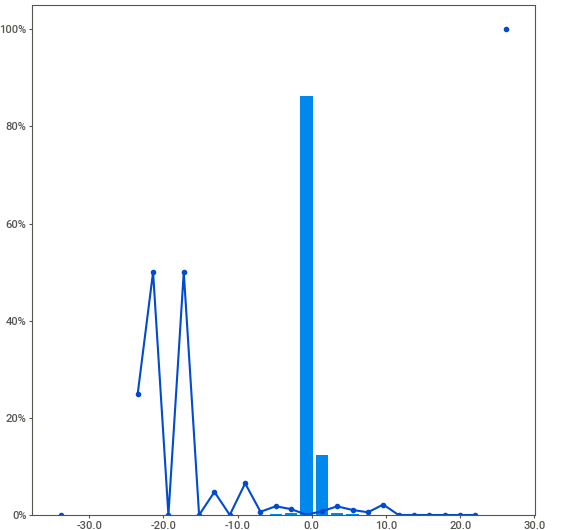
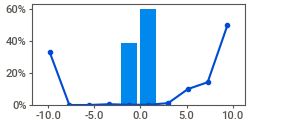
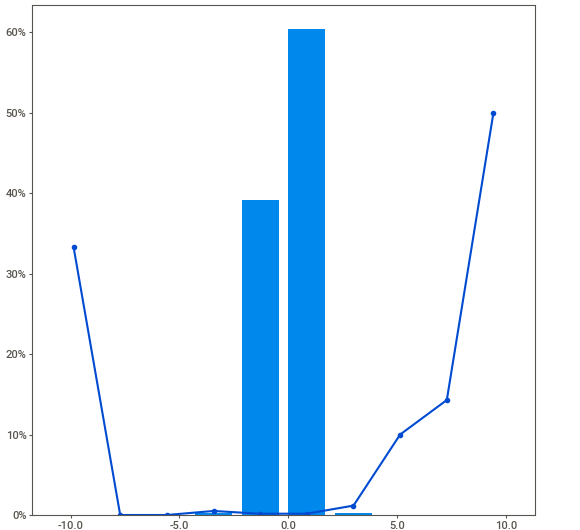
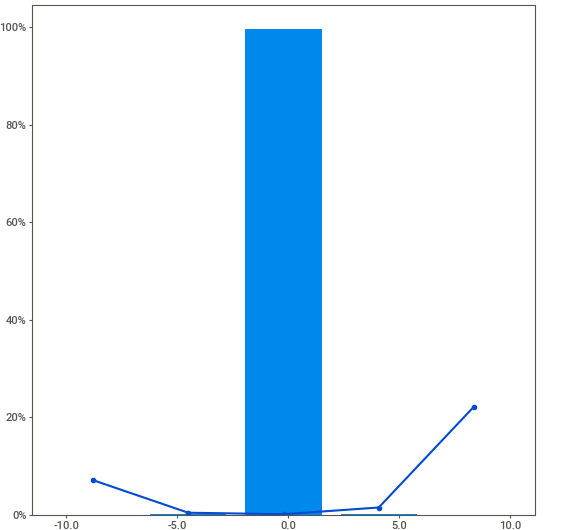
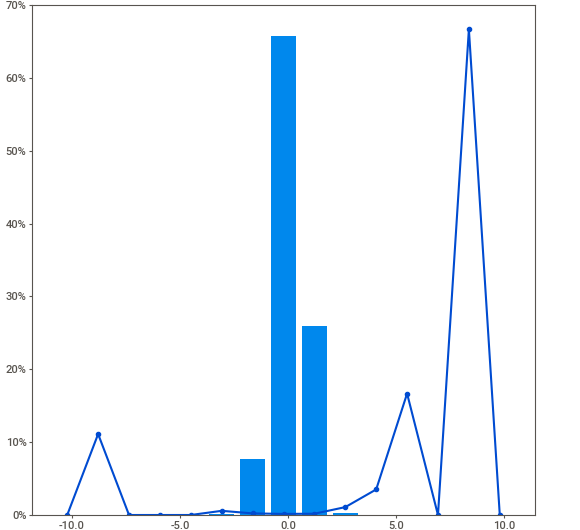
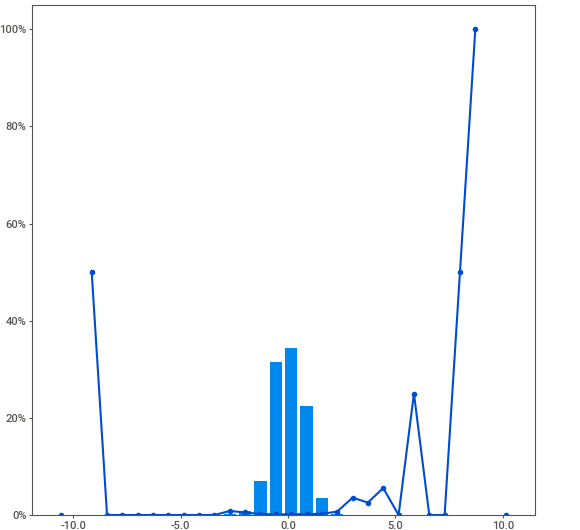
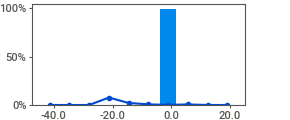
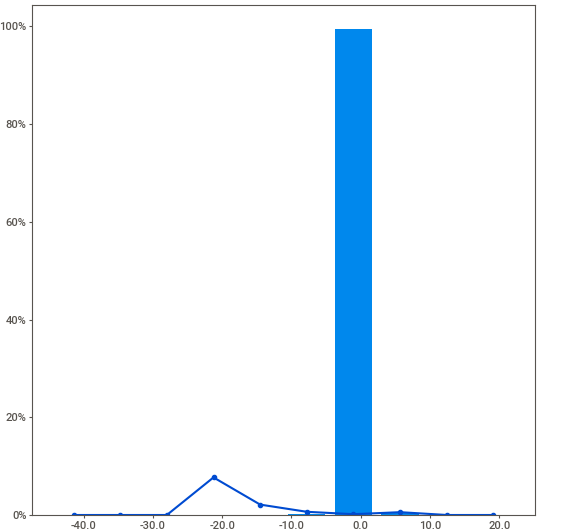
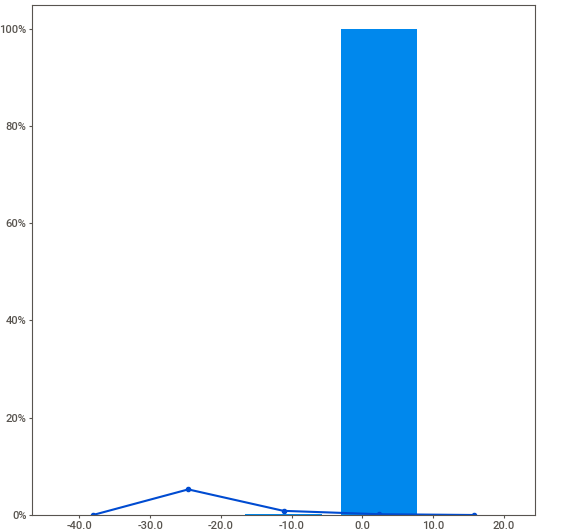
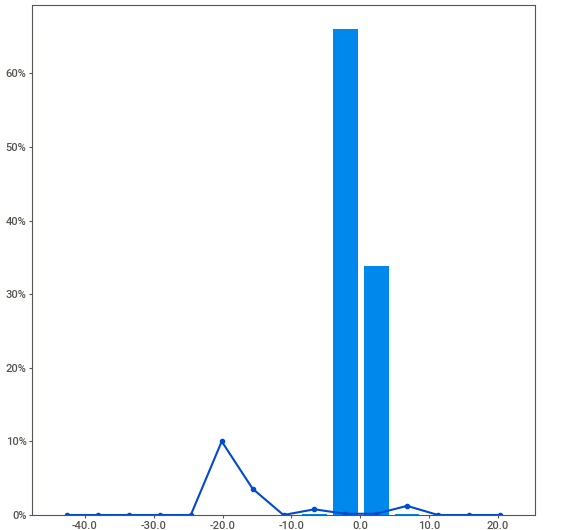
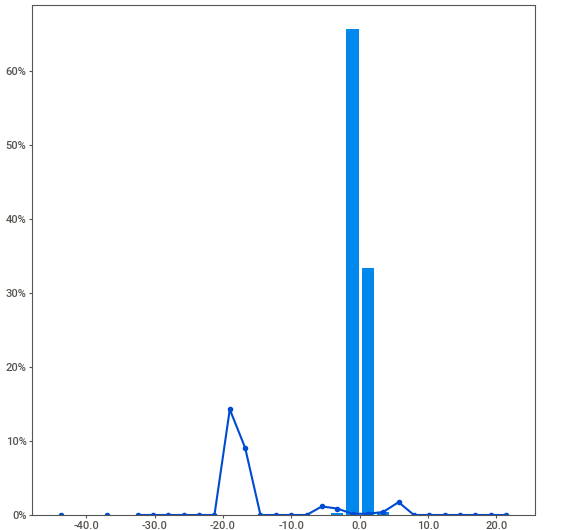
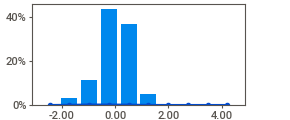
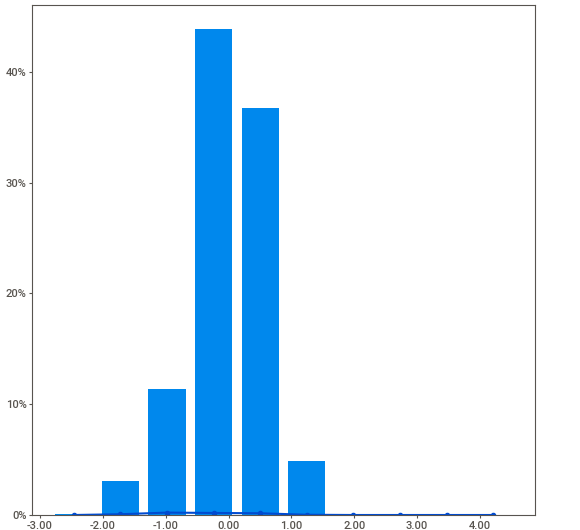
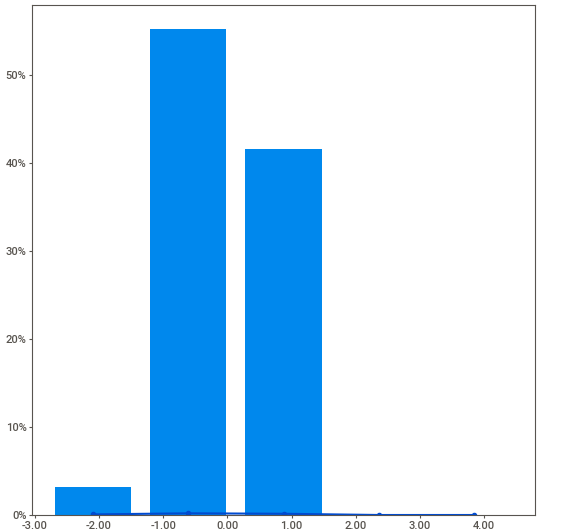
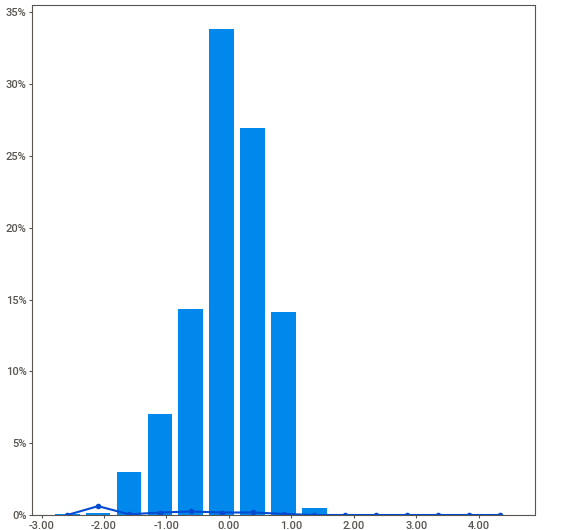
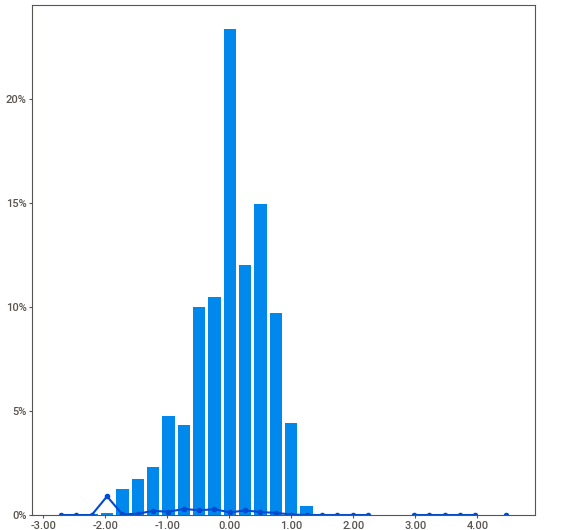
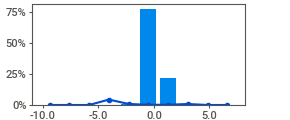
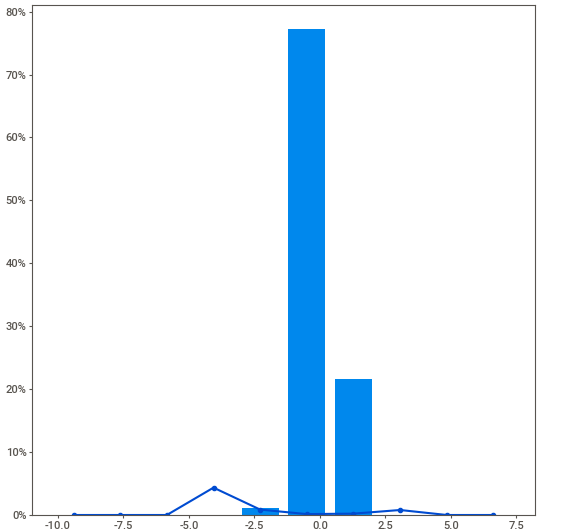
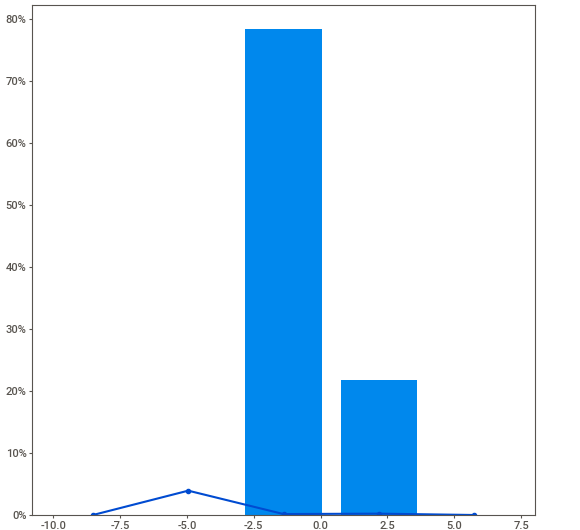
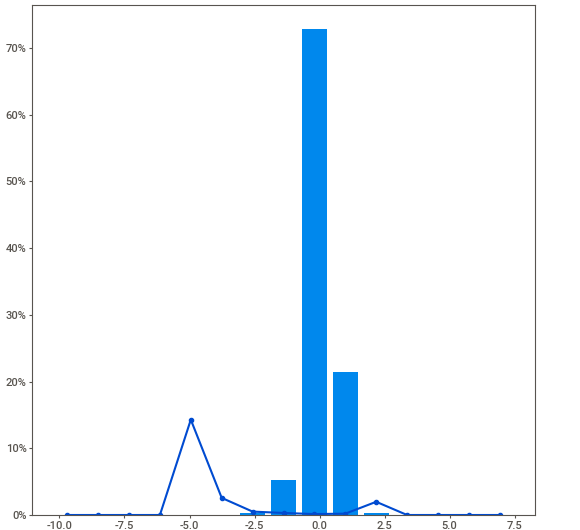
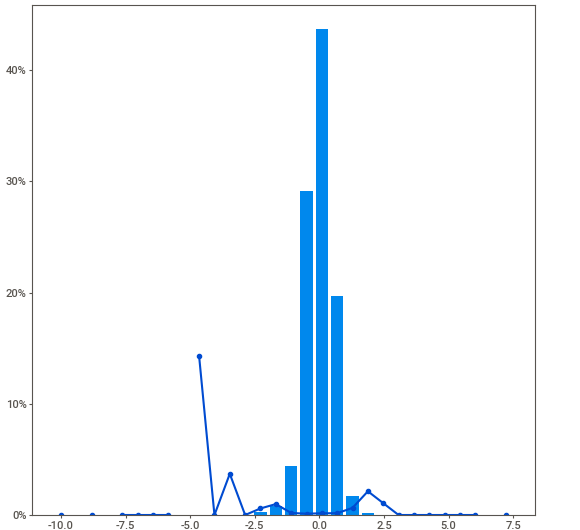
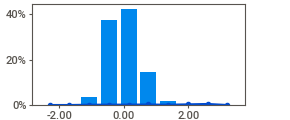
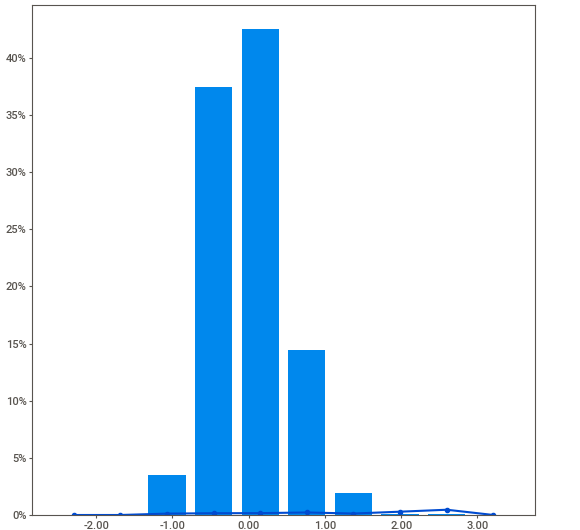
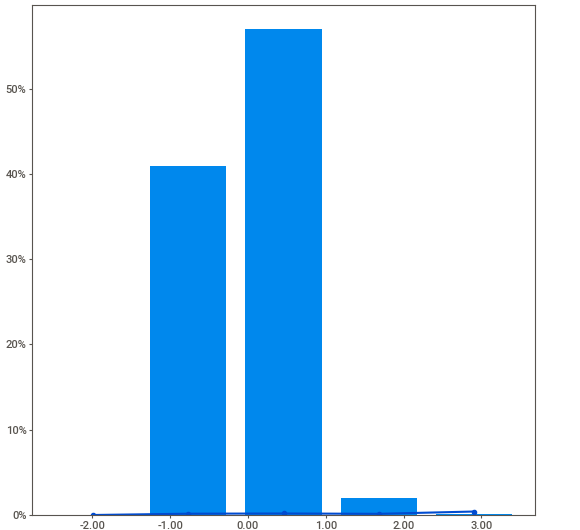
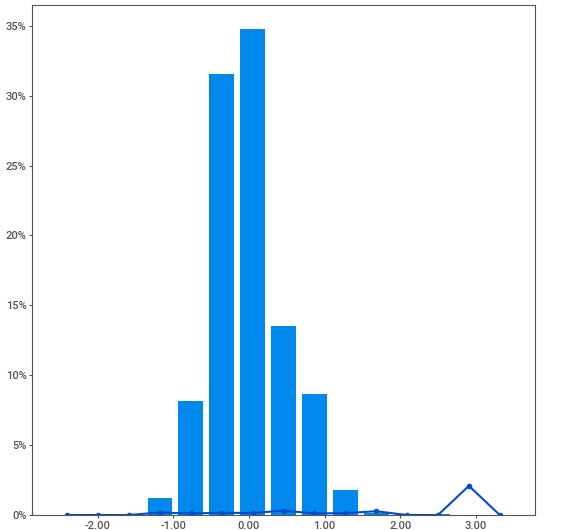
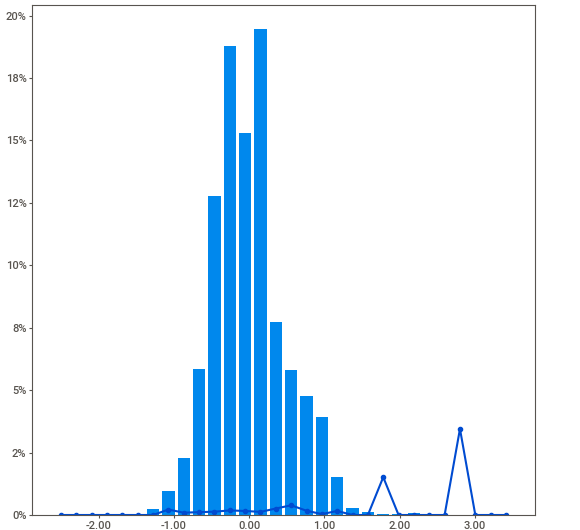
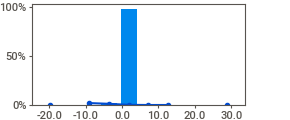
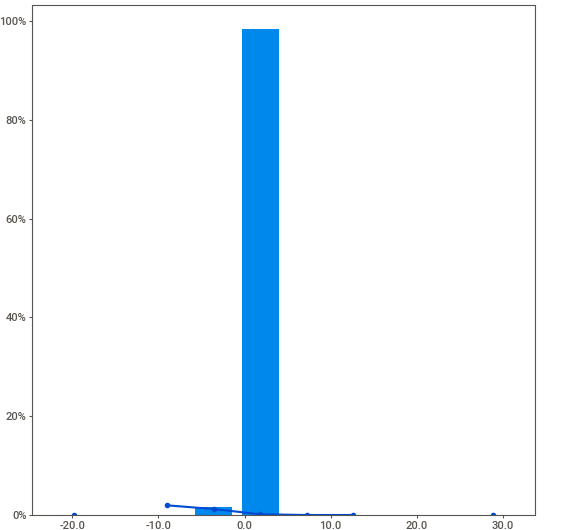
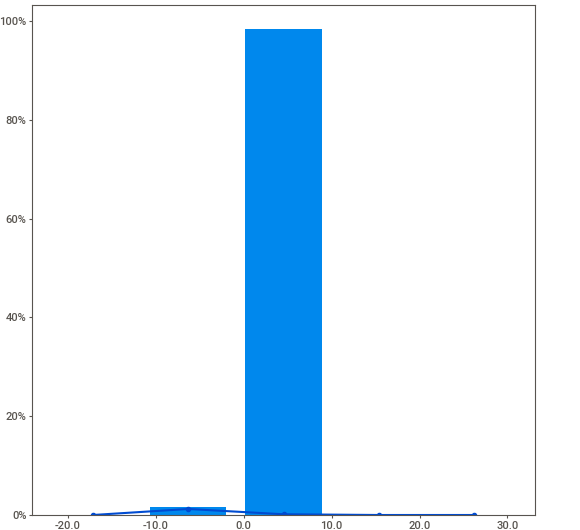
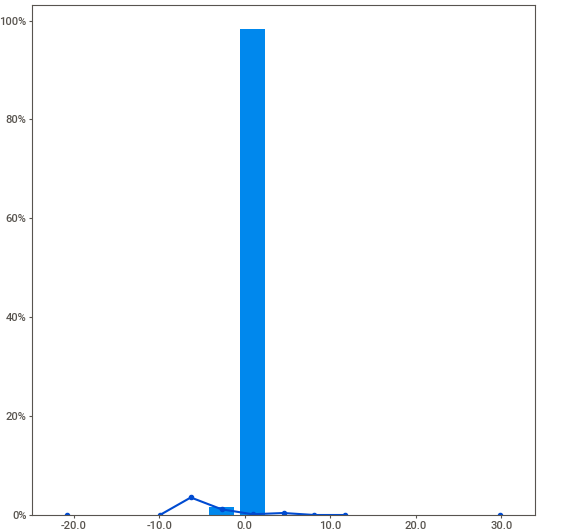
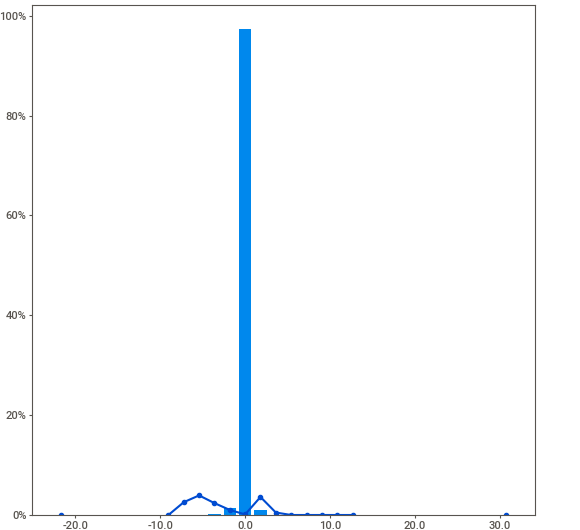
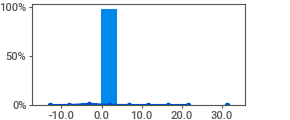
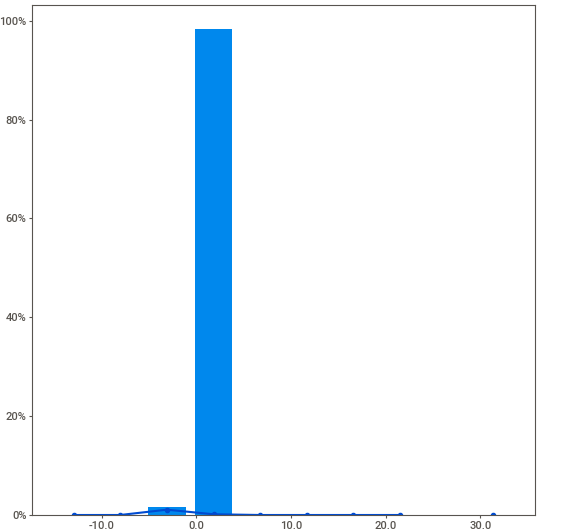
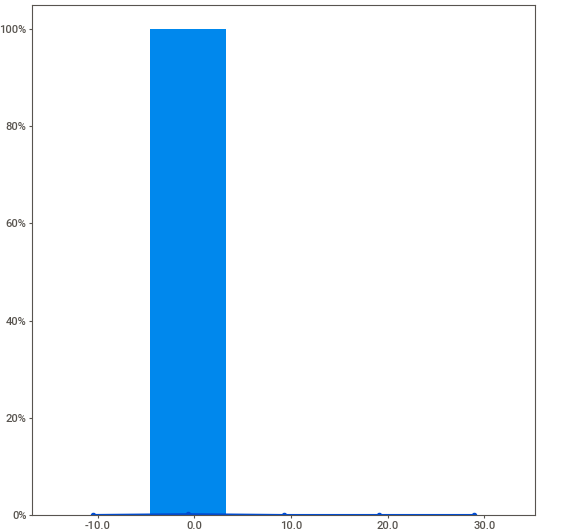
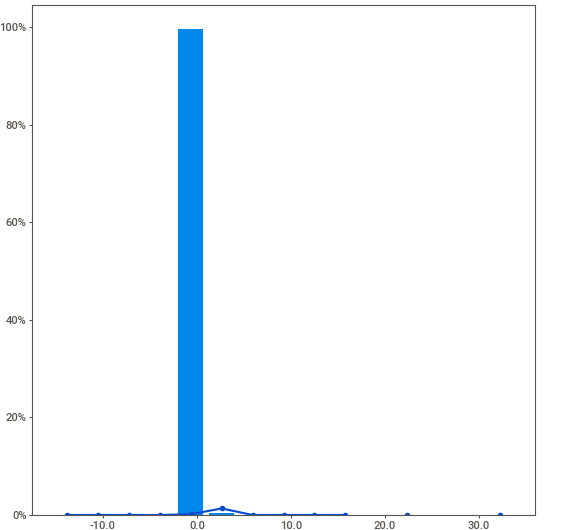
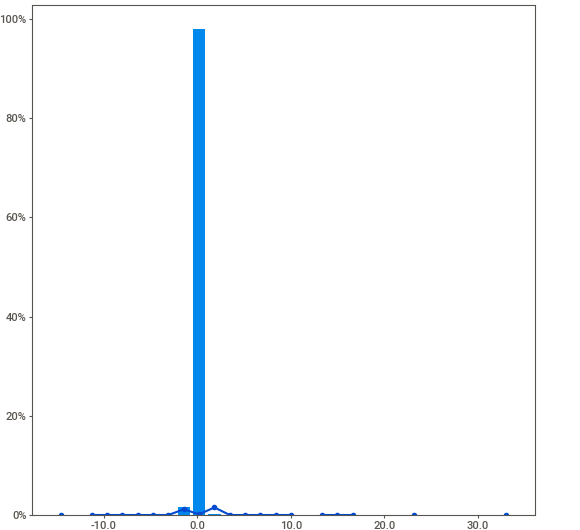
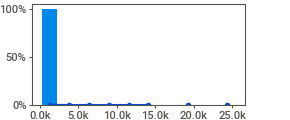
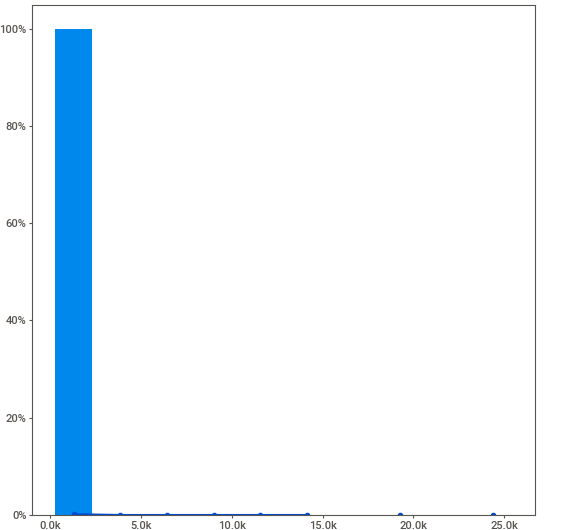
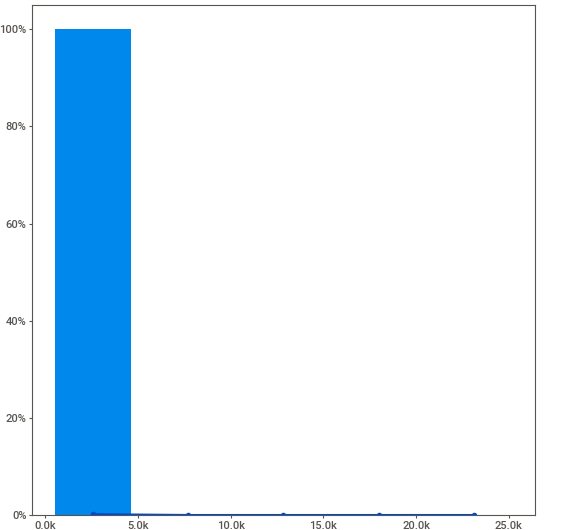
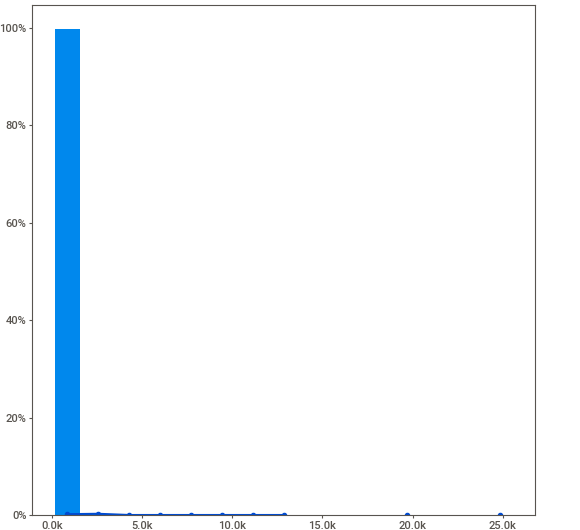
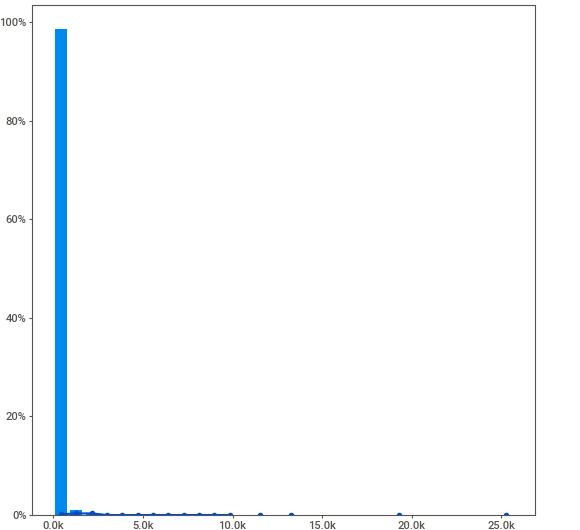
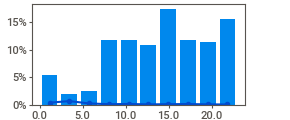
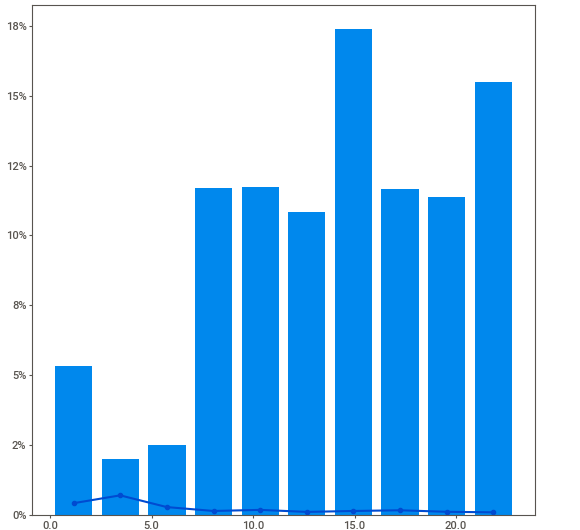
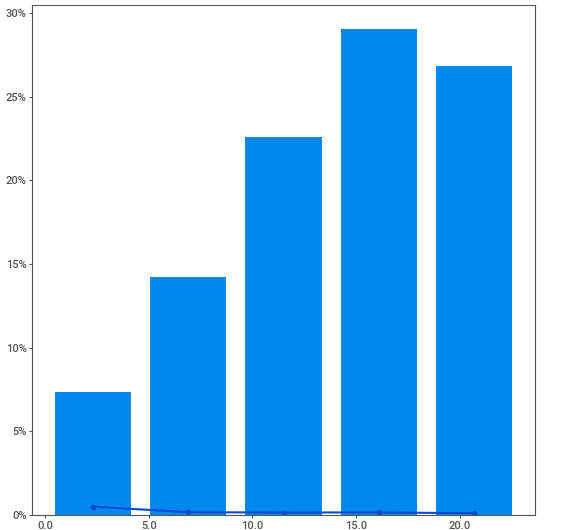
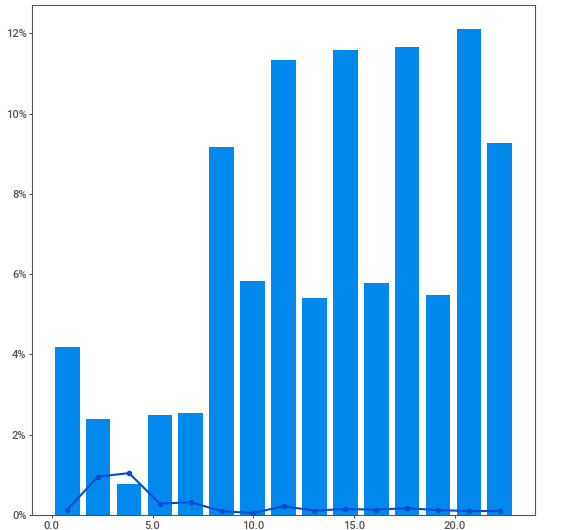
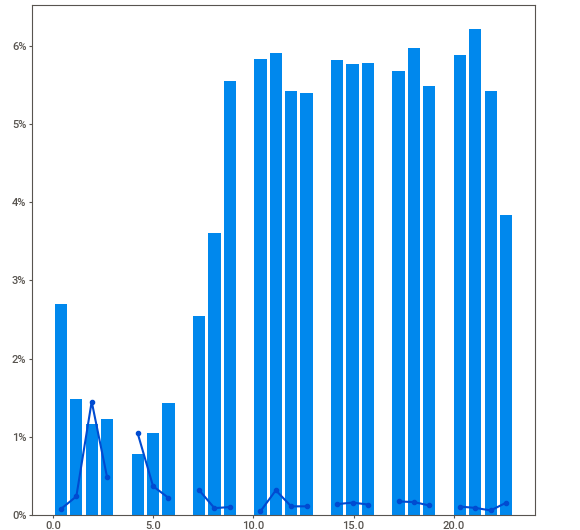
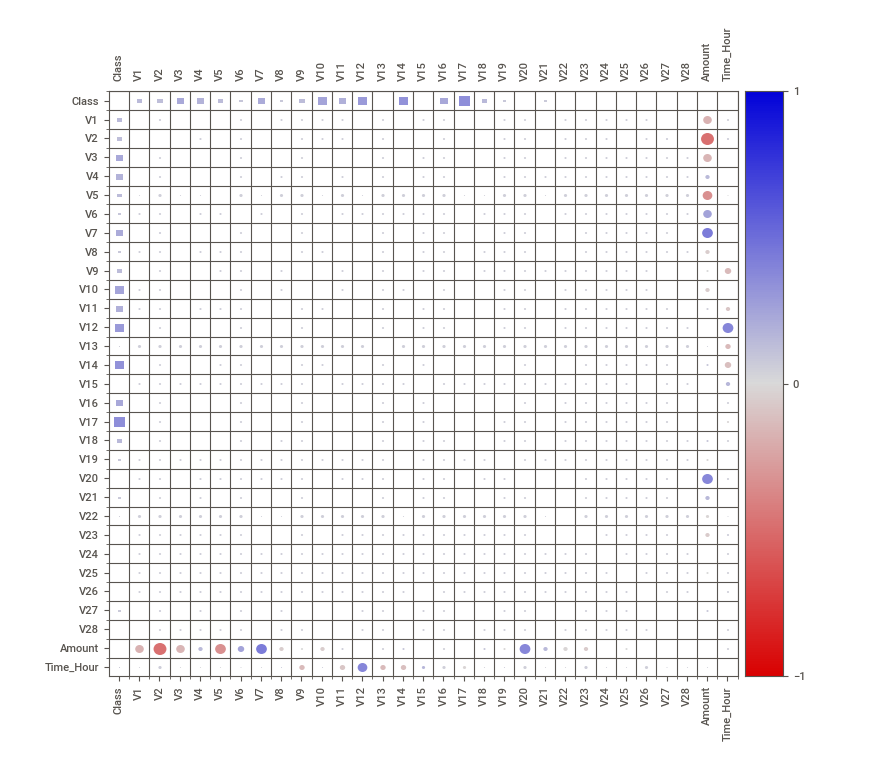
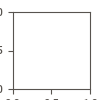

In [ ]:
report=sv.analyze(df,target_feat='Class')
report.show_notebook()

## <a name="p4">Splitting the data into train & test data</a>

In [11]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)

In [ ]:
# Shape of X and y
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (283726, 30)
Shape of y: (283726,)


In [12]:
# Scaling the data
sc = StandardScaler()
X_scaler = sc.fit_transform(X)

In [14]:
# Splitting the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, random_state=100, test_size=0.2)

Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
# Shape of X and y
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('\nShape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (226980, 30)
Shape of y_train: (226980,)

Shape of X_test: (56746, 30)
Shape of y_test: (56746,)


In [ ]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

473
383
90


Plotting the distribution of a variable

In [15]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

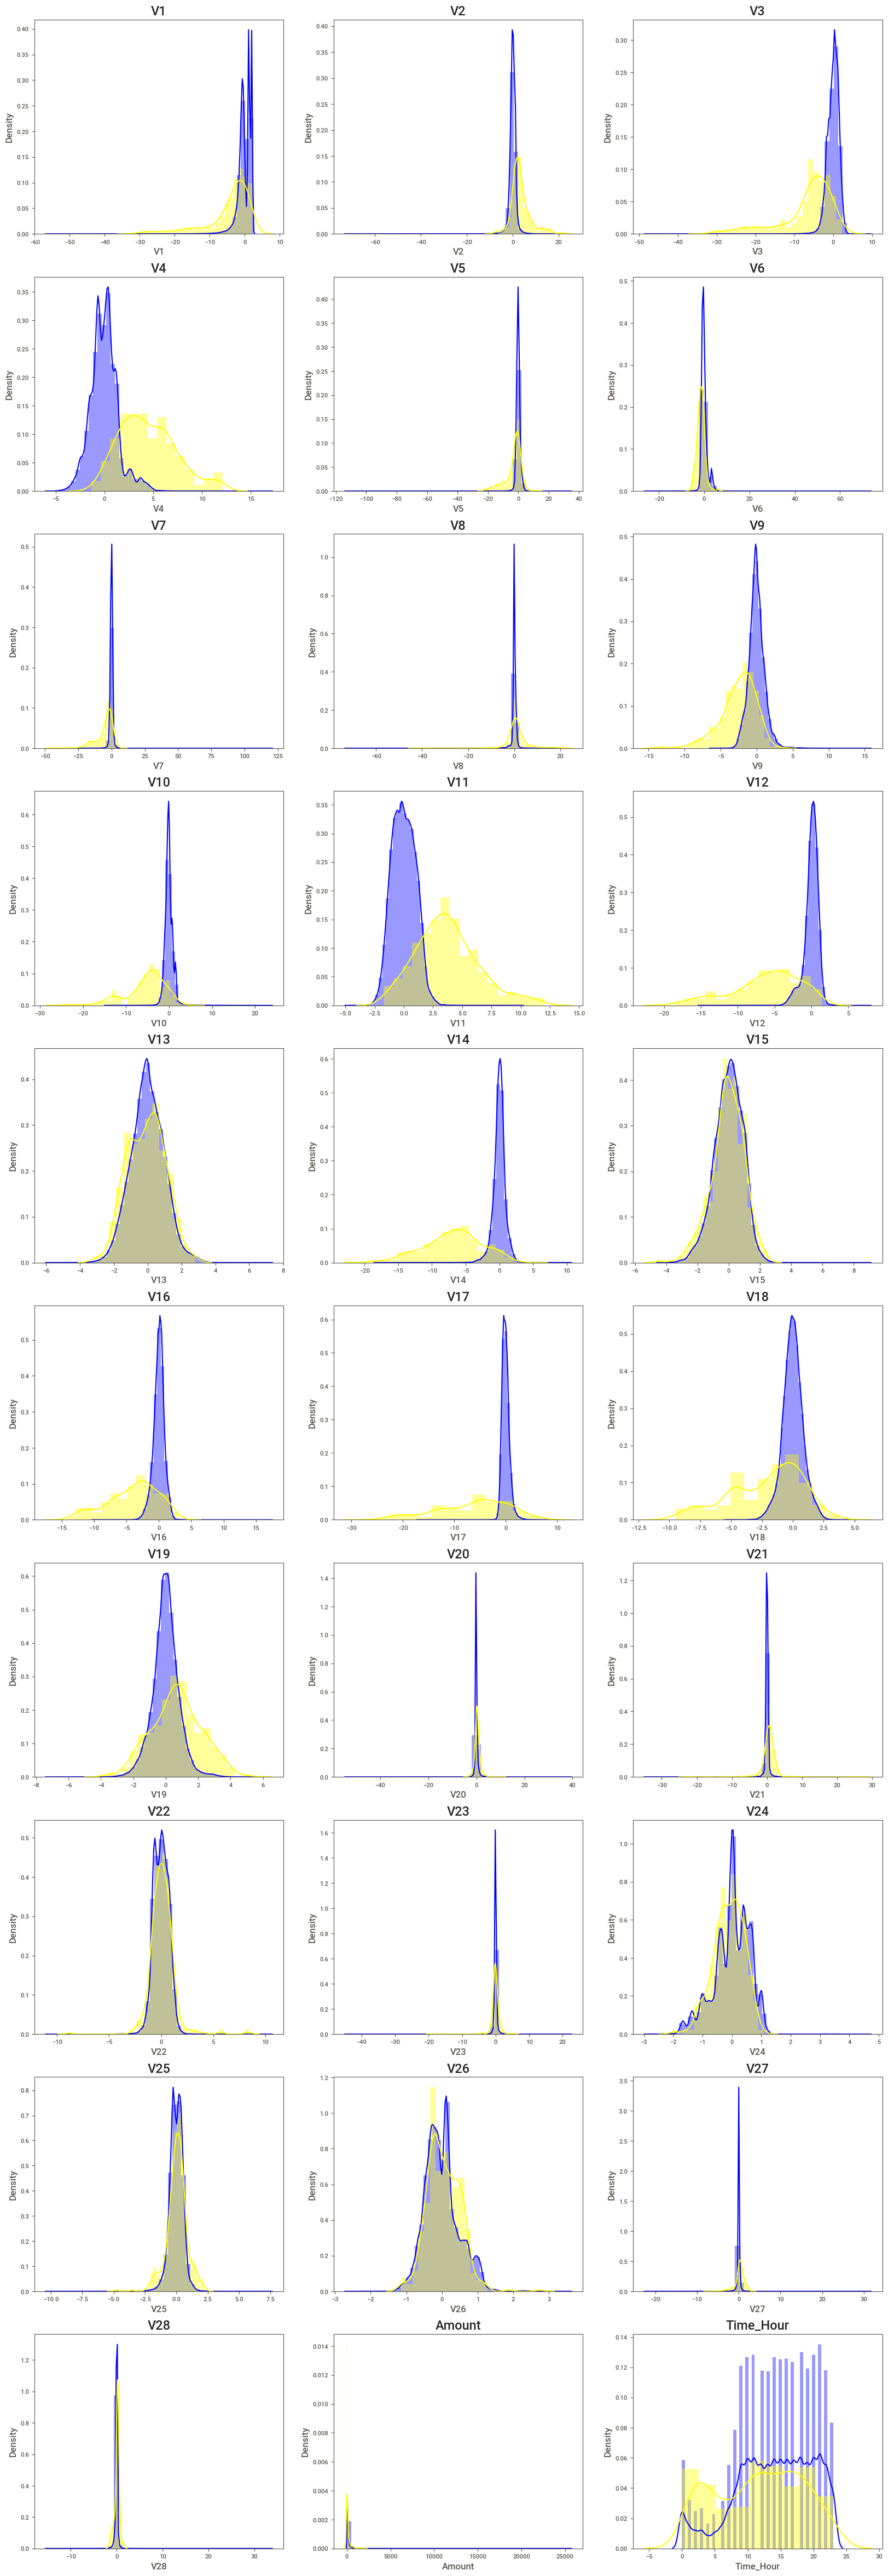

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='blue')
  sns.distplot(X[col][fraud_records], color='yellow')
  plt.title(col, fontsize=17)
plt.show()

## <a name="p5">Model Building</a>

In [16]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [17]:
pd.__version__

'2.0.3'

In [18]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]

  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [ ]:
# # Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )

  searchCV_l1.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_)
  print(searchCV_l1.scores_)

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_)
  print(searchCV_l2.scores_)


  #find predicted vallues
  y_pred_l1 = searchCV_l1.predict(X_test)
  y_pred_l2 = searchCV_l2.predict(X_test)


  #Find predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))

  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results._append({'Methodology': Methodology,
                                   'Model': 'Logistic Regression with L2 Regularisation',
                                   'Accuracy': Accuracy_l2,
                                   'roc_value': l2_roc_value,
                                   'threshold': threshold},
                                  ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results._append({'Methodology': Methodology,
                                  'Model': 'Logistic Regression with L1 Regularisation',
                                  'Accuracy': Accuracy_l1,
                                  'roc_value': l1_roc_value,
                                  'threshold': threshold},
                                  ignore_index= True)
  return df_Results

In [ ]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModels(df_Results,Methodology, X_train,y_train, X_test, y_test ):

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)

  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results._append({'Methodology': Methodology,
                                  'Model': 'KNN',
                                  'Accuracy': score,
                                  'roc_value': knn_roc_value,
                                  'threshold': threshold},
                                  ignore_index= True)

  return df_Results

In [ ]:
# Created a common function to fit and predict on a Tree models for both gini and entropy criteria
def buildAndRunTreeModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  criteria = ['gini', 'entropy']
  scores = {}

  for c in criteria:
      dt = DecisionTreeClassifier(criterion = c, random_state=42)
      dt.fit(X_train, y_train)
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test)
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()

      df_Results = df_Results._append({'Methodology': Methodology,
                                       'Model': 'Tree Model with {0} criteria'.format(c),
                                       'Accuracy': test_score,
                                       'roc_value': tree_roc_value,
                                       'threshold': threshold},
                                      ignore_index= True)

  return df_Results

In [ ]:
# Created a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results._append({'Methodology': Methodology,
                                  'Model': 'Random Forest',
                                  'Accuracy': RF_test_score,
                                  'roc_value': roc_value,
                                  'threshold': threshold},
                                  ignore_index= True)

  return df_Results

In [ ]:
# Created a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_Results, Methodology,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results._append({'Methodology': Methodology,
                                   'Model': 'XGBoost',
                                   'Accuracy': XGB_test_score,
                                   'roc_value': XGB_roc_value,
                                   'threshold': threshold},
                                  ignore_index= True)

  return df_Results


In [ ]:
# Created a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_Results, Methodology, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))

  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)

  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results._append({'Methodology': Methodology,
                                  'Model': 'SVM',
                                  'Accuracy': SVM_Score,
                                  'roc_value': roc_value,
                                  'threshold': threshold},
                                  ignore_index= True)

  return df_Results

- Build different models on the imbalanced dataset and see the result

## <a name="p5-1">Perform cross validation with RepeatedKFold</a>

In [ ]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 283722 283724 283725] TEST: [     3      6      8 ... 283710 283719 283723]
TRAIN: [     0      2      3 ... 283723 283724 283725] TEST: [     1      9     11 ... 283699 283703 283704]
TRAIN: [     0      1      2 ... 283722 283723 283724] TEST: [    18     34     40 ... 283718 283721 283725]
TRAIN: [     0      1      2 ... 283722 283723 283725] TEST: [    12     15     22 ... 283714 283715 283724]
TRAIN: [     1      3      6 ... 283723 283724 283725] TEST: [     0      2      4 ... 283717 283720 283722]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [     6     10     12 ... 283710 283716 283717]
TRAIN: [     0      1      2 ... 283720 283721 283722] TEST: [     4     20     28 ... 283723 283724 283725]
TRAIN: [     1      3      4 ... 283723 283724 283725] TEST: [     0      2     13 ... 283712 283718 283722]
TRAIN: [     0      2      4 ... 283723 283724 283725] TEST: [     1      3      8 ... 283715 283720 283721]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.9710044826724463
Max auc_roc for l2: 0.5605118340528534
Parameters for l1 regularisations
[[-0.05721594 -0.13569775 -0.17604526  0.06700272 -0.261694    0.09520294
   0.12568011 -0.03874223 -0.14275737 -0.13842521 -0.03698061  0.01561536
  -0.13770349 -0.21960544  0.01173602 -0.1110378  -0.21355175  0.03680117
   0.00914448  0.22819143  0.08765032 -0.02990672 -0.03061605 -0.01454859
  -0.0341869   0.00460902 -0.07865144 -0.0104579  -0.00674178 -0.11606611]]
[-2.09227527]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.66406935,
        0.66823283, 0.68369676, 0.89727342, 0.91782737, 0.91861141,
        0.90866456, 0.91457797, 0.9298634 , 0.91789935, 0.92632514,
        0.9376587 , 0.91059155, 0.92569945, 0.94495018, 0.96292842],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5762985 ,
        0.56429123, 0.58360901, 0.8157044 , 0.93686439, 0.92386459,
        0.89836878, 0.90874516, 0.94393

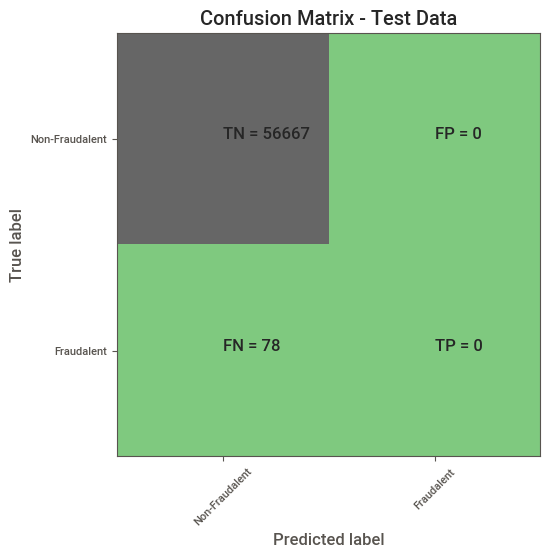

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56667
           1       0.00      0.00      0.00        78

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

Accuarcy of Logistic model with l1 regularisation : 0.9990659970041413
Confusion Matrix


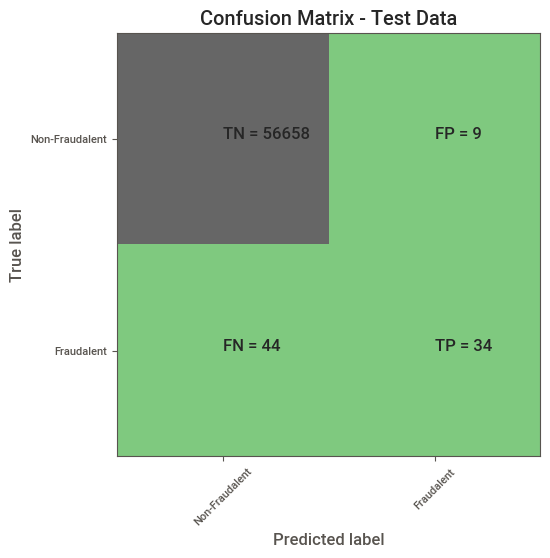

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56667
           1       0.79      0.44      0.56        78

    accuracy                           1.00     56745
   macro avg       0.89      0.72      0.78     56745
weighted avg       1.00      1.00      1.00     56745

l2 roc_value: 0.5759629015756921
l2 threshold: 0.4993560835947201
ROC for the test dataset 57.6%


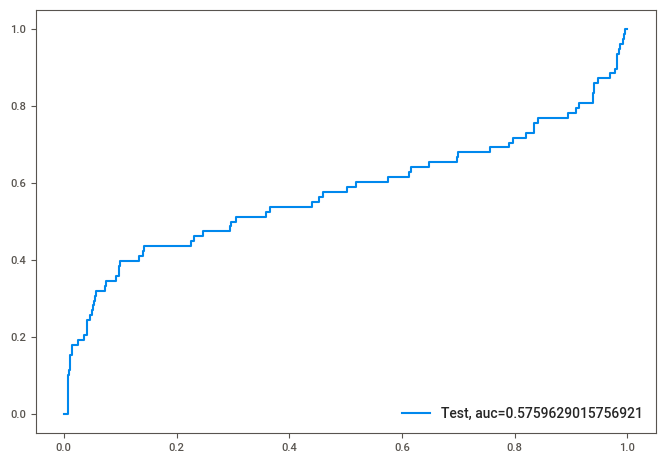

l1 roc_value: 0.8591985658002916
l1 threshold: 0.047589468084909006
ROC for the test dataset 85.9%


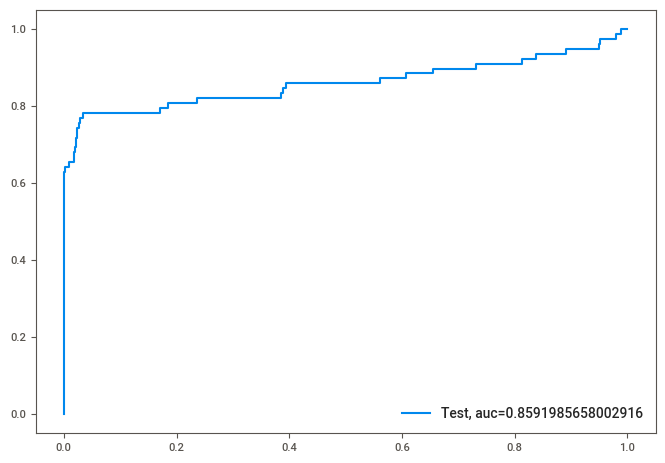

Time Taken by Model: --- 137.29667687416077 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9992774693805622
Confusion Matrix


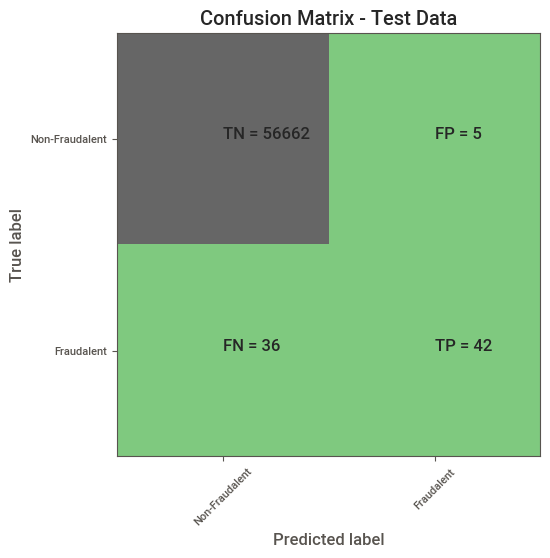

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56667
           1       0.89      0.54      0.67        78

    accuracy                           1.00     56745
   macro avg       0.95      0.77      0.84     56745
weighted avg       1.00      1.00      1.00     56745

KNN roc_value: 0.8650918569257284
KNN threshold: 0.2
ROC for the test dataset 86.5%


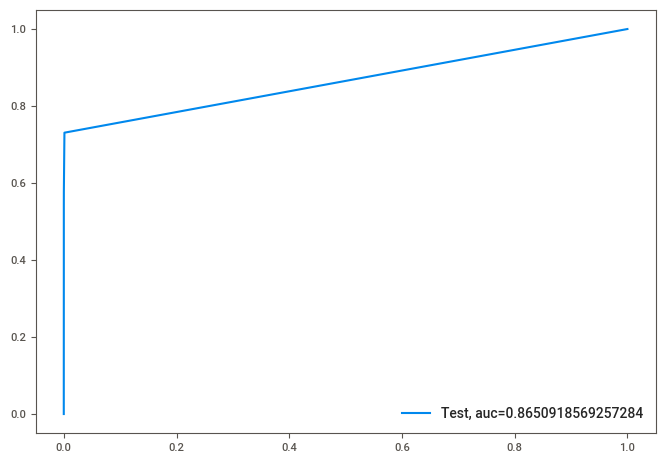

Time Taken by Model: --- 326.4287359714508 seconds ---
------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990836197021764
Confusion Matrix


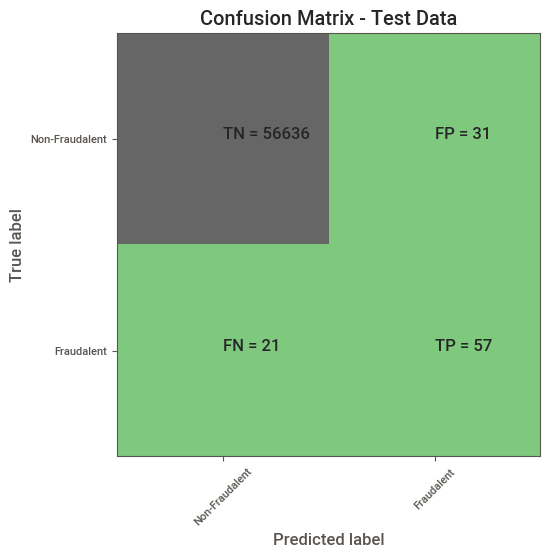

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56667
           1       0.65      0.73      0.69        78

    accuracy                           1.00     56745
   macro avg       0.82      0.87      0.84     56745
weighted avg       1.00      1.00      1.00     56745

gini tree_roc_value: 0.8651110875818377
Tree threshold: 1.0
ROC for the test dataset 86.5%


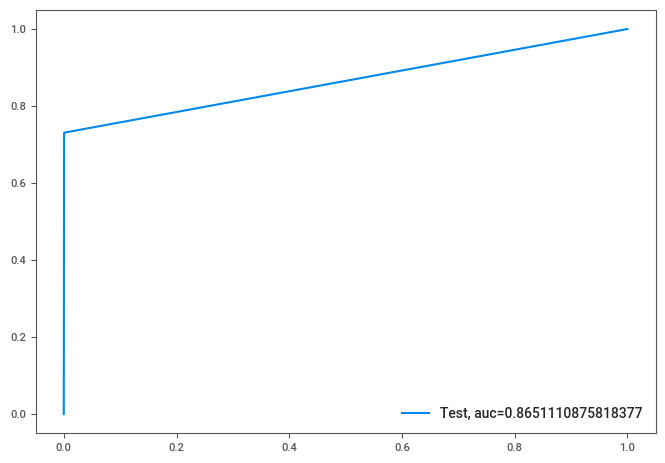

entropy score: 0.999224601286457
Confusion Matrix


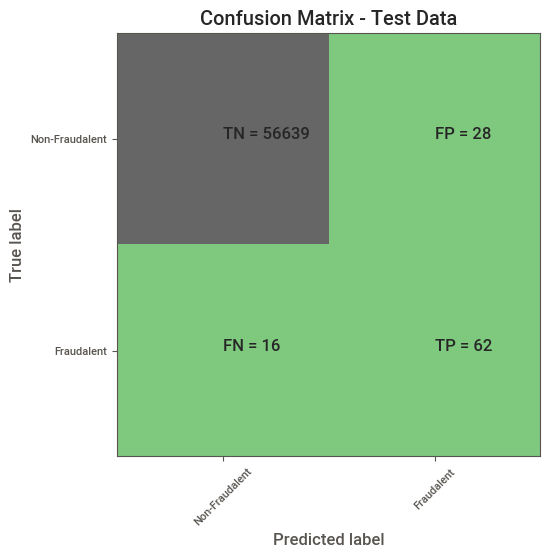

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56667
           1       0.69      0.79      0.74        78

    accuracy                           1.00     56745
   macro avg       0.84      0.90      0.87     56745
weighted avg       1.00      1.00      1.00     56745

entropy tree_roc_value: 0.8971888400656466
Tree threshold: 1.0
ROC for the test dataset 89.7%


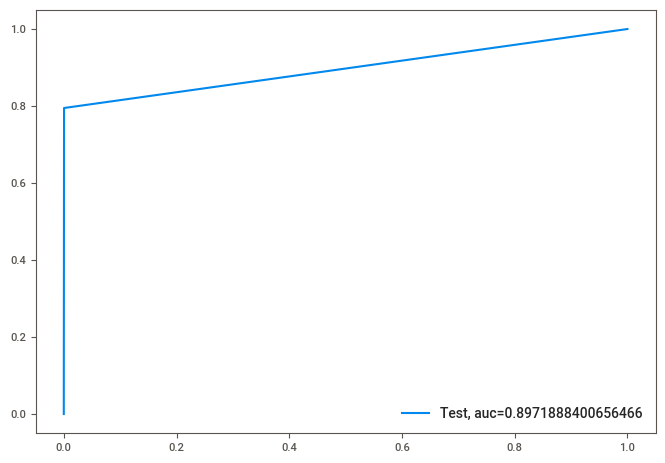

Time Taken by Model: --- 45.20711541175842 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995594325491233
Confusion Matrix


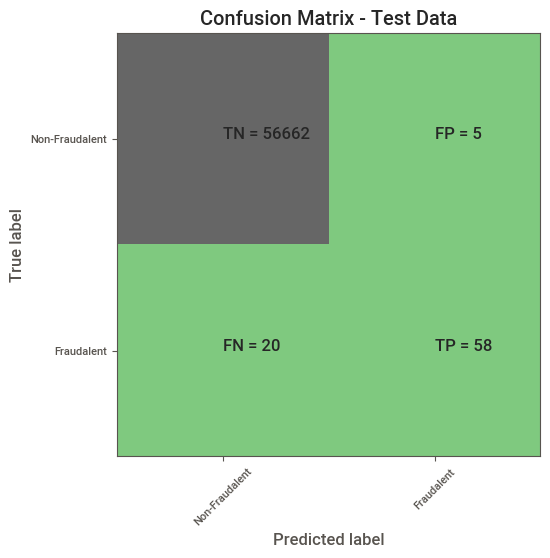

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56667
           1       0.92      0.74      0.82        78

    accuracy                           1.00     56745
   macro avg       0.96      0.87      0.91     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.9470340219718164
Random Forest threshold: 0.02
ROC for the test dataset 94.7%


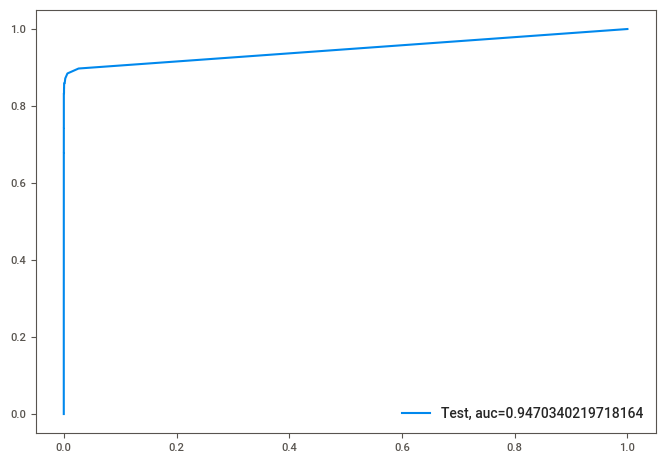

Time Taken by Model: --- 337.9671993255615 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995946779451934
Confusion Matrix


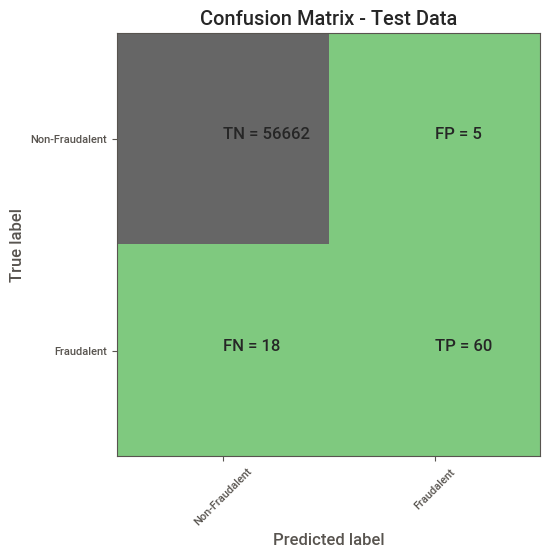

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56667
           1       0.92      0.77      0.84        78

    accuracy                           1.00     56745
   macro avg       0.96      0.88      0.92     56745
weighted avg       1.00      1.00      1.00     56745

XGboost roc_value: 0.9688687351612864
XGBoost threshold: 0.00013719154230784625
ROC for the test dataset 96.9%


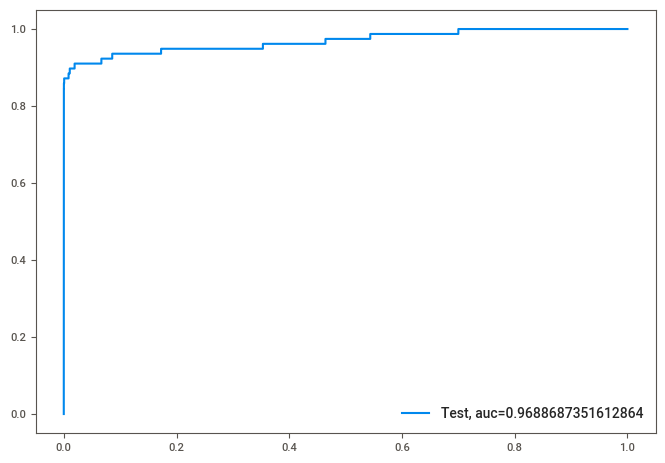

Time Taken by Model: --- 5.2494049072265625 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9977266719534761
Confusion Matrix


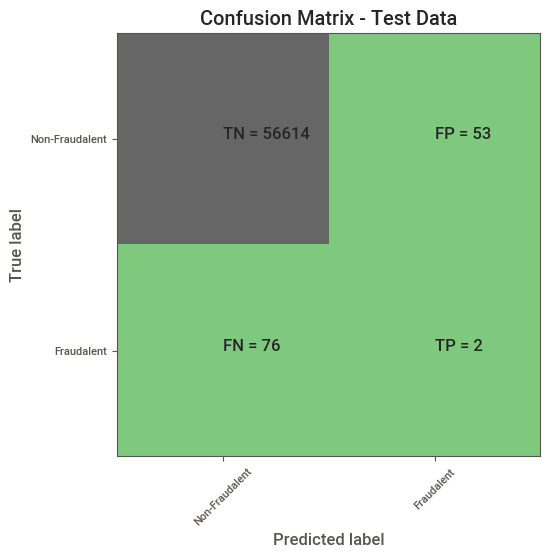

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56667
           1       0.04      0.03      0.03        78

    accuracy                           1.00     56745
   macro avg       0.52      0.51      0.51     56745
weighted avg       1.00      1.00      1.00     56745

SVM roc_value: 0.28761210906904167
SVM threshold: 0.001622343202389913
ROC for the test dataset 28.8%


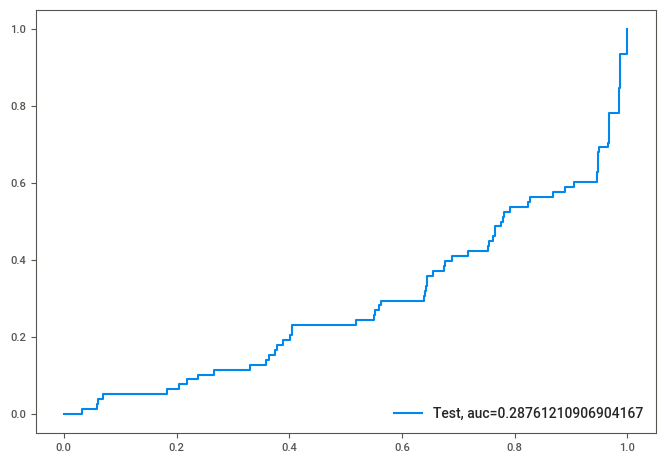

Time Taken by Model: --- 728.1914031505585 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0                 RepeatedKFold Cross Validation   
1                 RepeatedKFold Cross Validation   
2                 RepeatedKFold Cross Validation   
3                 RepeatedKFold Cross Validation   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7                 RepeatedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12              StratifiedKFold Cross Validation   
13              StratifiedKFold Cross Validation   
14              StratifiedKFold Cross Validation   
15              StratifiedKFold Cross Validation   
16  Random Oversampling with StratifiedKFold CV    
17  Random Oversampling with StratifiedKFold CV    
18  Random Oversampling with StratifiedKFold CV    
19  Random Oversampling with StratifiedKFold CV    
20  Random Oversampling with StratifiedKFold CV    
21  Random Oversampling with StratifiedKFold CV    
22  Random Oversampling with StratifiedKFold CV    
23   SMOTE Oversampling with StratifiedKFold CV    
24   SMOTE Oversampling with StratifiedKFold CV    
25   SMOTE Oversampling with StratifiedKFold CV    
26   SMOTE Oversampling with StratifiedKFold CV    
27   SMOTE Oversampling with StratifiedKFold CV    
28   SMOTE Oversampling with StratifiedKFold CV    
29   SMOTE Oversampling with StratifiedKFold CV    
30  ADASYN Oversampling with StratifiedKFold CV    
31  ADASYN Oversampling with StratifiedKFold CV    
32  ADASYN Oversampling with StratifiedKFold CV    
33  ADASYN Oversampling with StratifiedKFold CV    
34  ADASYN Oversampling with StratifiedKFold CV    
35  ADASYN Oversampling with StratifiedKFold CV    
36  ADASYN Oversampling with StratifiedKFold CV    
37                RepeatedKFold Cross Validation   
38                RepeatedKFold Cross Validation   
39                RepeatedKFold Cross Validation   
40                RepeatedKFold Cross Validation   
41                RepeatedKFold Cross Validation   
42                RepeatedKFold Cross Validation   
43                RepeatedKFold Cross Validation   
44                RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998467   0.585075   0.499332  
1   Logistic Regression with L1 Regularisation  0.999119   0.905195   0.054192  
2                                          KNN  0.999277   0.861819   0.200000  
3                Tree Model with gini criteria  0.999330   0.902114   1.000000  
4             Tree Model with entropy criteria  0.999225   0.879107   1.000000  
5                                Random Forest  0.999612   0.970011   0.010000  
6                                      XGBoost  0.999612   0.987688   0.000227  
7                                          SVM  0.997462   0.699492   0.003563  
8   Logistic Regression with L2 Regularisation  0.998326   0.610563   0.499394  
9   Logistic Regression with L1 Regularisation  0.998784   0.885447   0.021082  
10                                         KNN  0.999189   0.799610   0.200000  
11               Tree Model with gini criteria  0.998996   0.820850   1.000000  
12            Tree Model with entropy criteria  0.999101   0.826157   1.000000  
13                               Random Forest  0.999471   0.923590   0.010000  
14                                     XGBoost  0.999454   0.982862   0.000032  
15                                         SVM  0.998326   0.401469   0.002773  
16  Logistic Regression with L2 Regularisation  0.998326   0.500000        inf  
17  Logistic Regression with L1 Regularisation  0.998326   0.500000        inf  
18                                         KNN  0.998062   0.799471   0.200000  
19               Tree Mo

### Results for cross validation with RepeatedKFold:
Looking at Accuracy and ROC value we have "Logistic Regression with L2 Regularisation" which has provided best results for cross validation with RepeatedKFold technique

## <a name="p5-2">Perform cross validation with StratifiedKFold</a>

In [ ]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30191  30261  30275 ... 283723 283724 283725] TEST: [    0     1     2 ... 56805 56806 56807]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [ 30191  30261  30275 ... 113535 113536 113537]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [ 77084  77379  79220 ... 170292 170293 170294]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [149302 150027 150068 ... 226999 227000 227001]
TRAIN: [     0      1      2 ... 226999 227000 227001] TEST: [212341 212365 213905 ... 283723 283724 283725]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.9642526704878966
Max auc_roc for l2: 0.5525251683812339
Parameters for l1 regularisations
[[-0.03842951 -0.13586475 -0.204496    0.04526403 -0.24234073  0.08589574
   0.12687675 -0.04723846 -0.14165071 -0.13886326 -0.11734668  0.05518863
  -0.15693337 -0.24235356 -0.03296284 -0.10102689 -0.23041123  0.05213094
   0.02106786  0.20616078  0.08872156  0.00159132 -0.04107482 -0.00501911
  -0.14690438 -0.00839423 -0.0773035  -0.01629566 -0.00653783 -0.12992662]]
[-2.04062952]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.51532701,
        0.51456747, 0.56823597, 0.82354395, 0.8933904 , 0.91867152,
        0.87902274, 0.88407166, 0.9305204 , 0.91442565, 0.92157229,
        0.93124149, 0.88839695, 0.93323332, 0.86121981, 0.97590893],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.49777406,
        0.51278346, 0.54540529, 0.82009535, 0.91264863, 0.91556599,
        0.90452936, 0.90341674, 0.92188

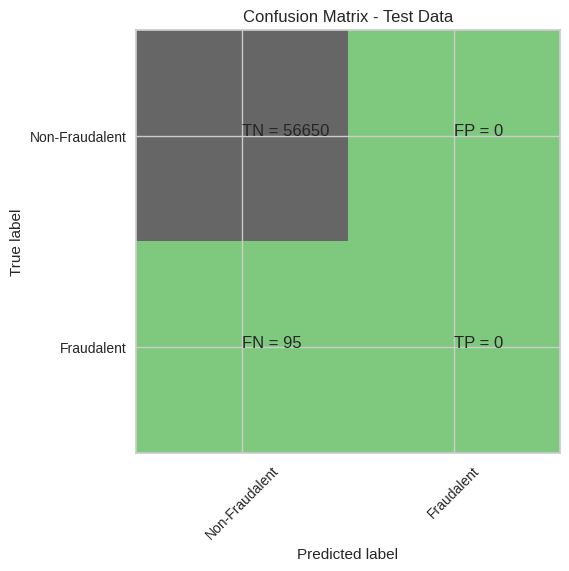

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

Accuarcy of Logistic model with l1 regularisation : 0.9987840338355802
Confusion Matrix


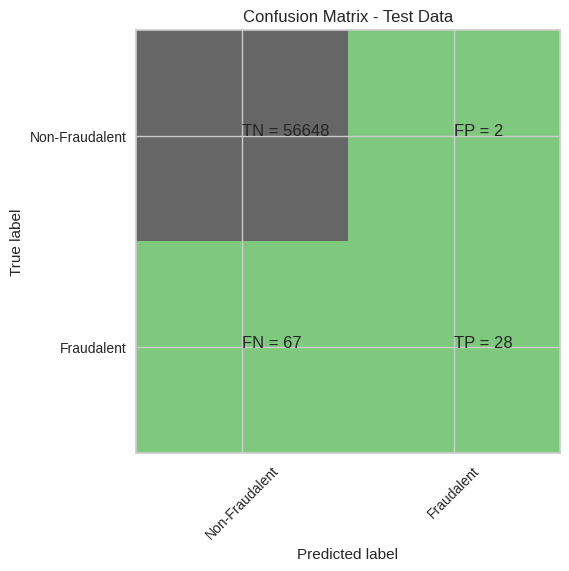

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.93      0.29      0.45        95

    accuracy                           1.00     56745
   macro avg       0.97      0.65      0.72     56745
weighted avg       1.00      1.00      1.00     56745

l2 roc_value: 0.6105629209829516
l2 threshold: 0.49939396390969515
ROC for the test dataset 61.1%


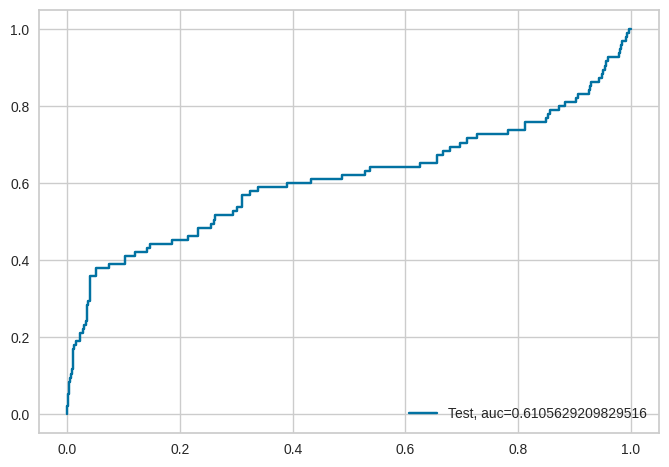

l1 roc_value: 0.8854471129279509
l1 threshold: 0.02108223750140523
ROC for the test dataset 88.5%


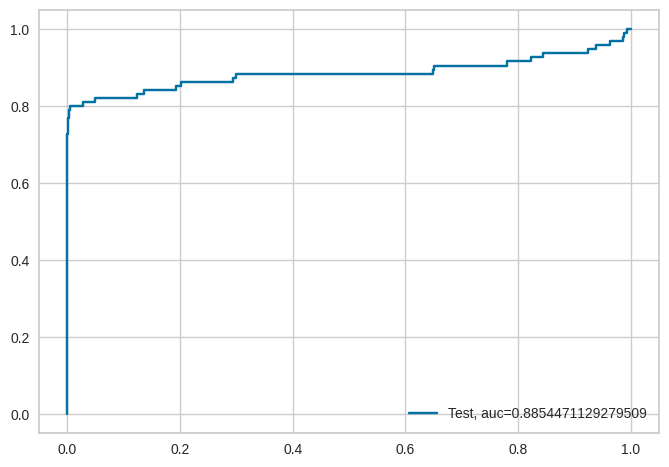

Time Taken by Model: --- 137.9646873474121 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9991893558903868
Confusion Matrix


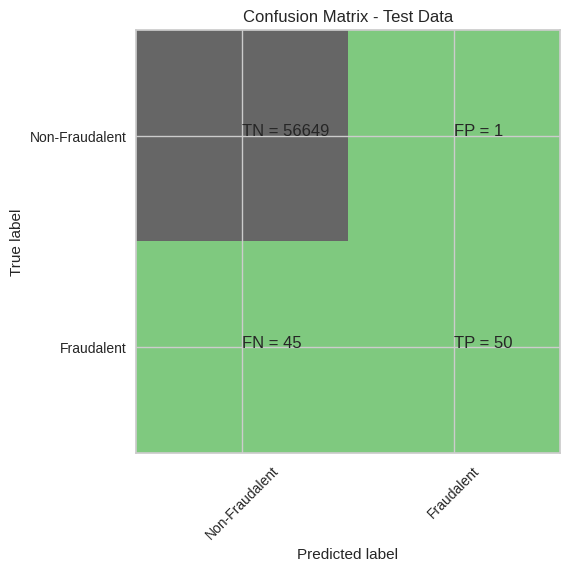

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.98      0.53      0.68        95

    accuracy                           1.00     56745
   macro avg       0.99      0.76      0.84     56745
weighted avg       1.00      1.00      1.00     56745

KNN roc_value: 0.7996100710735357
KNN threshold: 0.2
ROC for the test dataset 80.0%


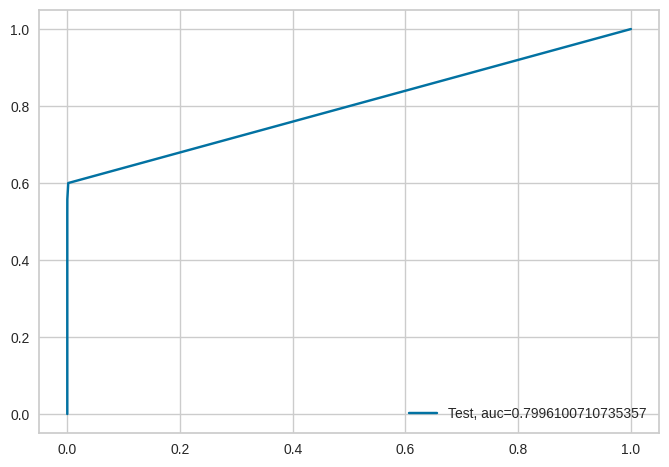

Time Taken by Model: --- 322.2571687698364 seconds ---
------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989955062120011
Confusion Matrix


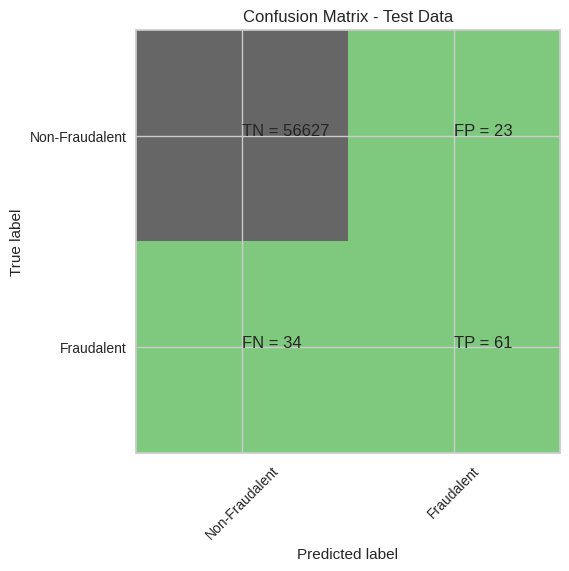

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.73      0.64      0.68        95

    accuracy                           1.00     56745
   macro avg       0.86      0.82      0.84     56745
weighted avg       1.00      1.00      1.00     56745

gini tree_roc_value: 0.8208496306963348
Tree threshold: 1.0
ROC for the test dataset 82.1%


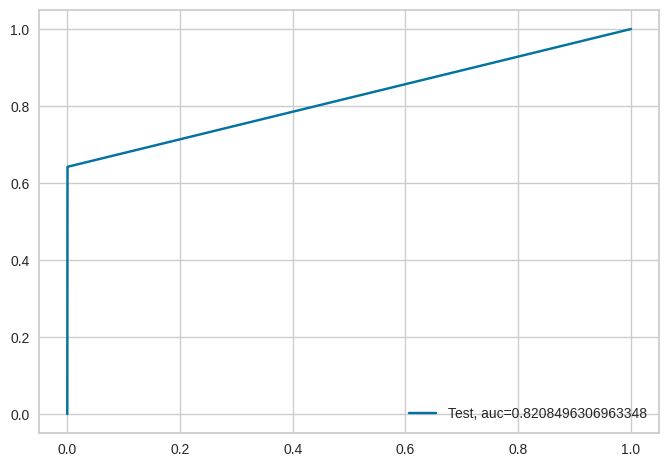

entropy score: 0.9991012424002115
Confusion Matrix


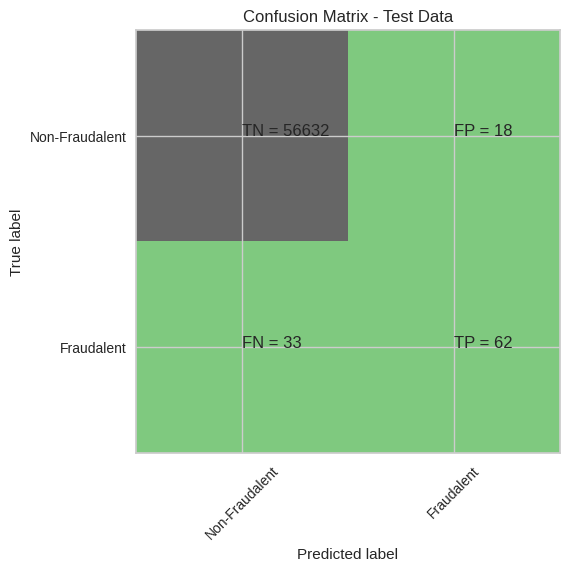

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.78      0.65      0.71        95

    accuracy                           1.00     56745
   macro avg       0.89      0.83      0.85     56745
weighted avg       1.00      1.00      1.00     56745

entropy tree_roc_value: 0.8261569192177267
Tree threshold: 1.0
ROC for the test dataset 82.6%


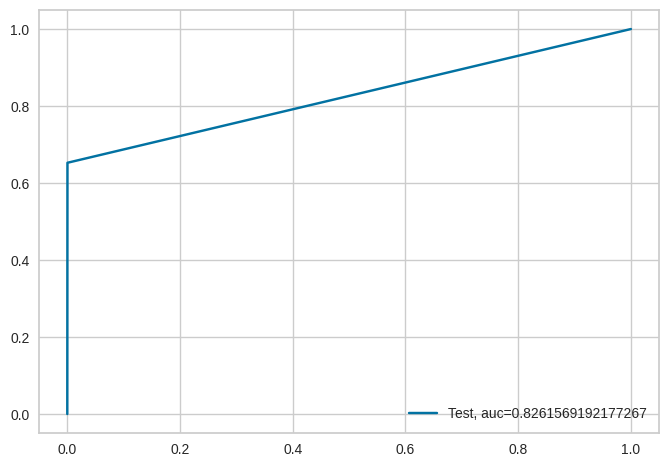

Time Taken by Model: --- 47.606706857681274 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994713190589479
Confusion Matrix


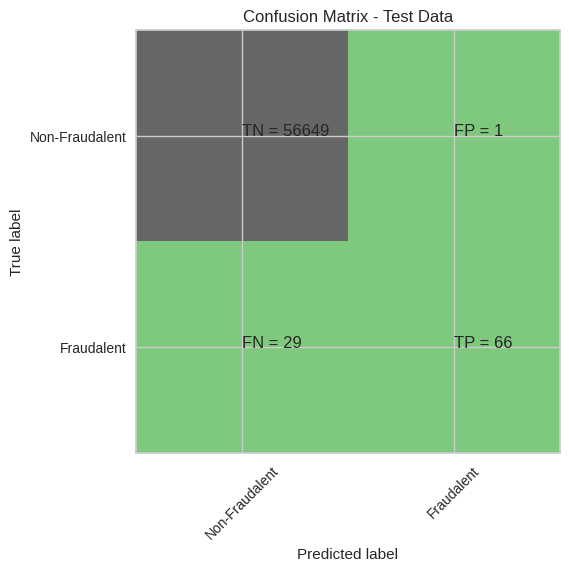

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.99      0.69      0.81        95

    accuracy                           1.00     56745
   macro avg       0.99      0.85      0.91     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.9235897245319831
Random Forest threshold: 0.01
ROC for the test dataset 92.4%


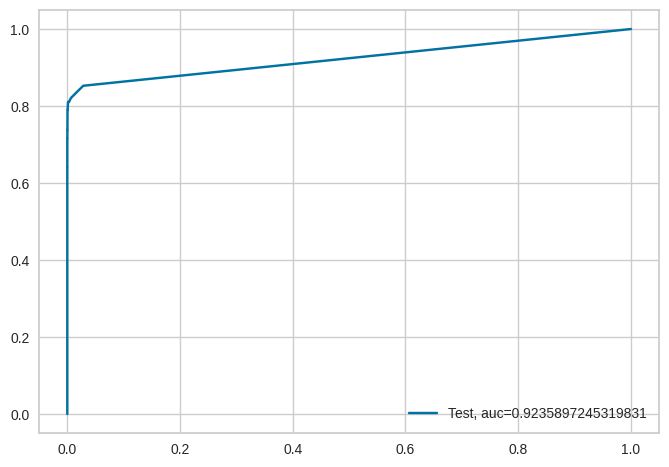

Time Taken by Model: --- 326.49656653404236 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994536963609129
Confusion Matrix


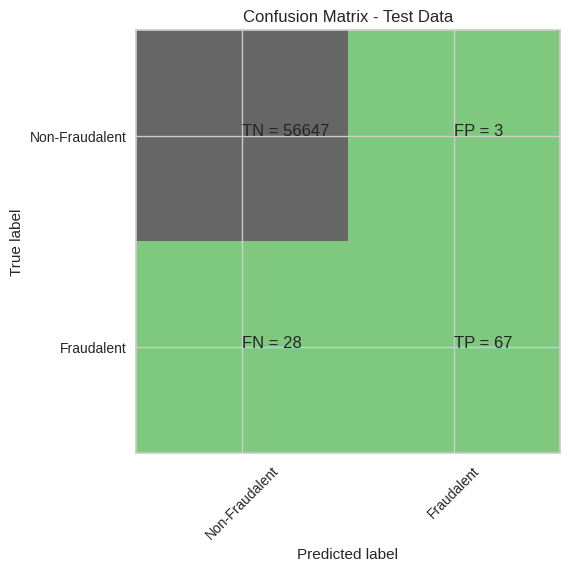

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.96      0.71      0.81        95

    accuracy                           1.00     56745
   macro avg       0.98      0.85      0.91     56745
weighted avg       1.00      1.00      1.00     56745

XGboost roc_value: 0.9828624518047103
XGBoost threshold: 3.1825275073060766e-05
ROC for the test dataset 98.3%


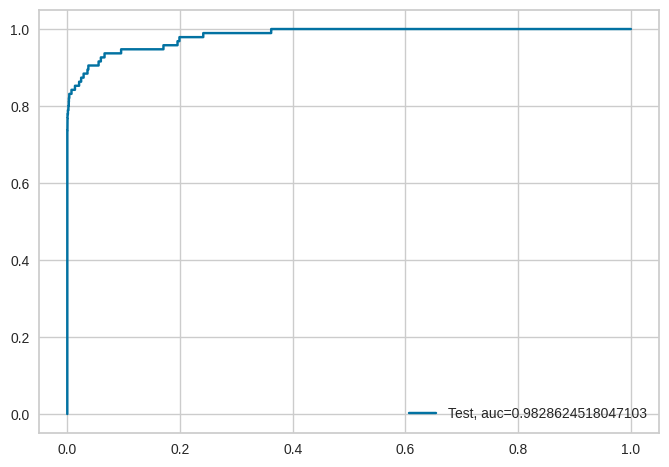

Time Taken by Model: --- 5.155163049697876 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9983258436866684
Confusion Matrix


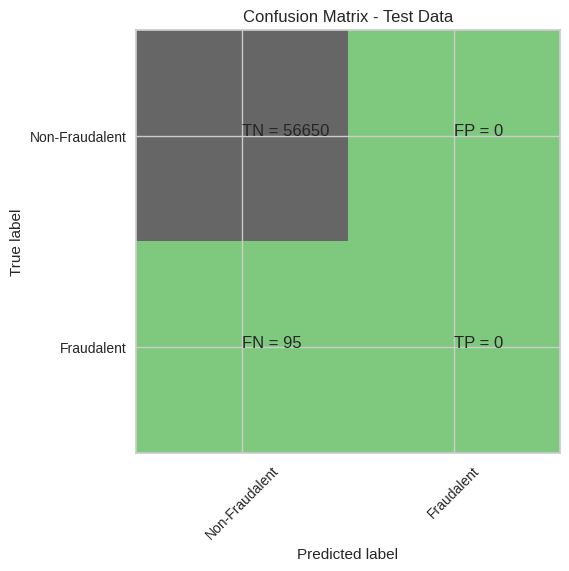

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

SVM roc_value: 0.598531332744925
SVM threshold: 0.0016284890721577482
ROC for the test dataset 59.9%


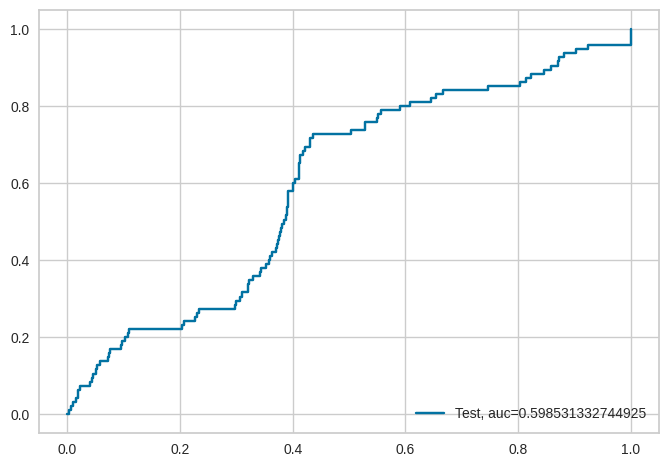

Time Taken by Model: --- 2759.623002767563 seconds ---


In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0  StratifiedKFold Cross Validation   
1  StratifiedKFold Cross Validation   
2  StratifiedKFold Cross Validation   
3  StratifiedKFold Cross Validation   
4  StratifiedKFold Cross Validation   
5  StratifiedKFold Cross Validation   
6  StratifiedKFold Cross Validation   
7  StratifiedKFold Cross Validation   

                                        Model  Accuracy  roc_value  threshold  
0  Logistic Regression with L2 Regularisation  0.998326   0.610563   0.499394  
1  Logistic Regression with L1 Regularisation  0.998784   0.885447   0.021082  
2                                         KNN  0.999189   0.799610   0.200000  
3               Tree Model with gini criteria  0.998996   0.820850   1.000000  
4            Tree Model with entropy criteria  0.999101   0.826157   1.000000  
5                               Random Forest  0.999471   0.923590   0.010000  
6                                     XGBoost  0.999454   0.982862   0.000032  
7                                         SVM  0.998326   0.598531   0.001628

### Results for cross validation with StratifiedKFold:
Looking at the ROC value we have Logistic Regression with L2 Regularisation has provided best results for cross validation with StratifiedKFold technique

## Conclusion :
- As the results show Logistic Regression with L2 Regularisation for StratifiedKFold cross validation provided best results



#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

clf = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print ('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)


#find predicted vallues
y_pred_l2 = clf.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = clf.predict_proba(X_test)[:,1]


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.5525251683812339
Parameters for l2 regularisations
[[ 3.28881038e-07  2.31025068e-07 -1.57392856e-06 -1.91786589e-07
   3.67630674e-07 -2.59337961e-07  3.36338103e-08  3.20618543e-09
  -7.09588158e-08 -1.32717147e-07 -4.72860732e-07  1.74447652e-07
  -1.29825319e-07 -4.29333932e-07 -3.80809929e-07 -8.30406596e-08
  -3.04848068e-07  9.45626717e-08  7.56238005e-08 -6.51976191e-08
   6.52525347e-08  1.74632809e-07  7.08387998e-08 -1.17621045e-08
  -2.83369514e-07 -2.11255761e-08 -8.33059065e-09 -1.71547303e-08
  -6.80774125e-04 -9.54276229e-05]]
[-7.49734648e-06]
{1: array([[0.52425874, 0.52428269, 0.5245739 , 0.52372926, 0.52372926,
        0.52372926, 0.52372926, 0.52372926, 0.52372926, 0.52372926,
        0.52372926, 0.52372926, 0.52372926, 0.52372926, 0.52372926,
        0.52372926, 0.52372926, 0.52372926, 0.52372926, 0.52372926],
       [0.503848  , 0.50357639, 0.5031545 , 0.5021701 , 0.5021701 ,
        0.5021701 , 0.5021701 , 0.5021701 , 0.5021701 , 0.5021701 

# Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## <a name="p5-3">Oversampling with RandomOverSampler with StratifiedKFold Cross Validation</a>

- We will use Random Oversampling method to handle the class imbalance

In [ ]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)

X_over = pd.DataFrame(data=X_over, columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.5
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

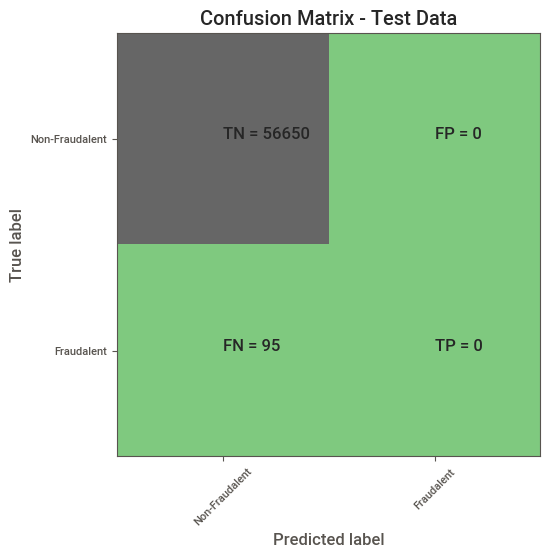

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

Accuarcy of Logistic model with l1 regularisation : 0.9983258436866684
Confusion Matrix


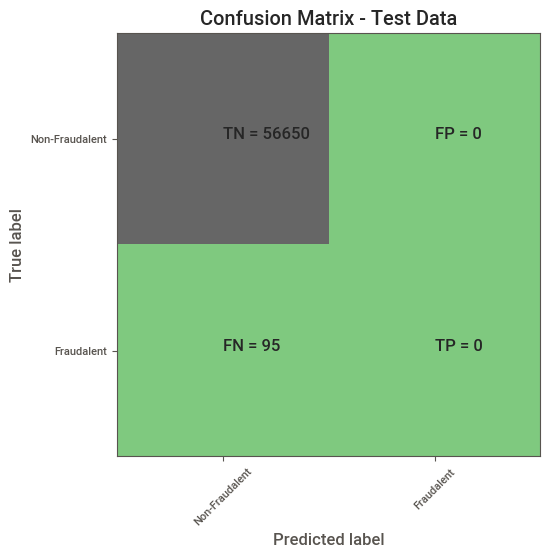

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


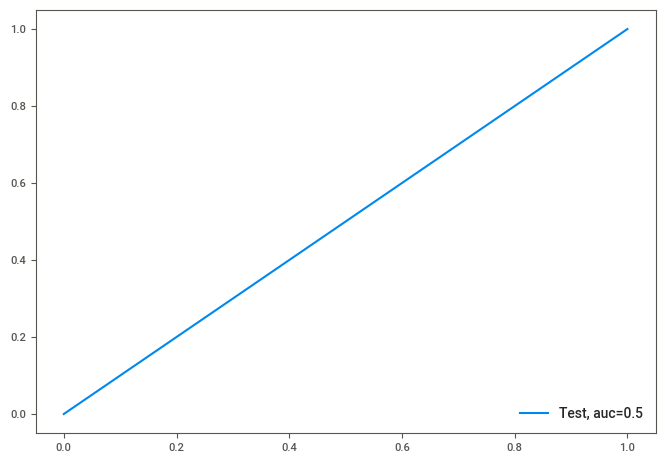

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


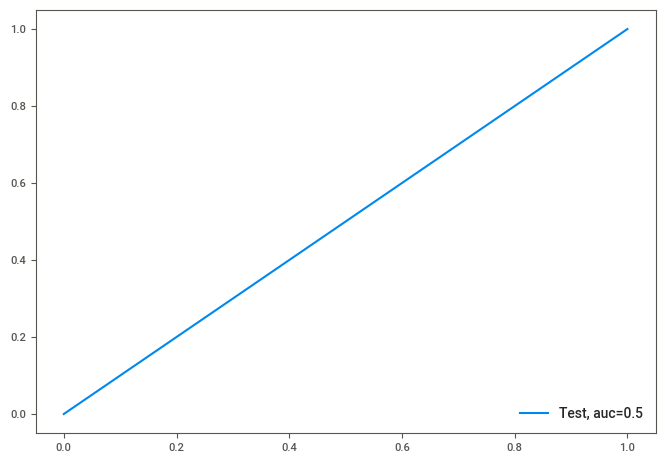

Time Taken by Model: --- 136.04819345474243 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9980615032161424
Confusion Matrix


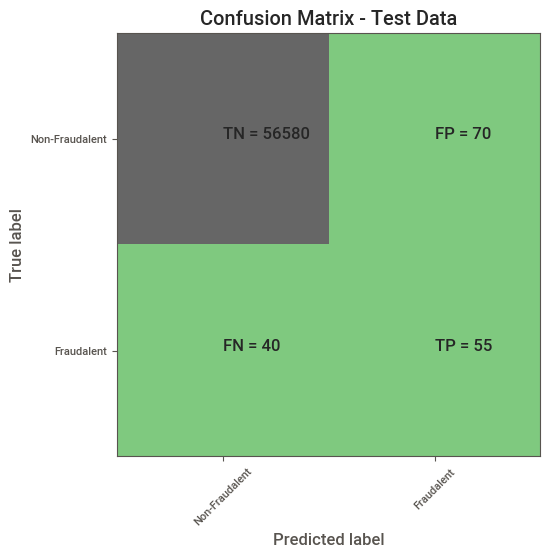

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.44      0.58      0.50        95

    accuracy                           1.00     56745
   macro avg       0.72      0.79      0.75     56745
weighted avg       1.00      1.00      1.00     56745

KNN roc_value: 0.7994711757328008
KNN threshold: 0.2
ROC for the test dataset 79.9%


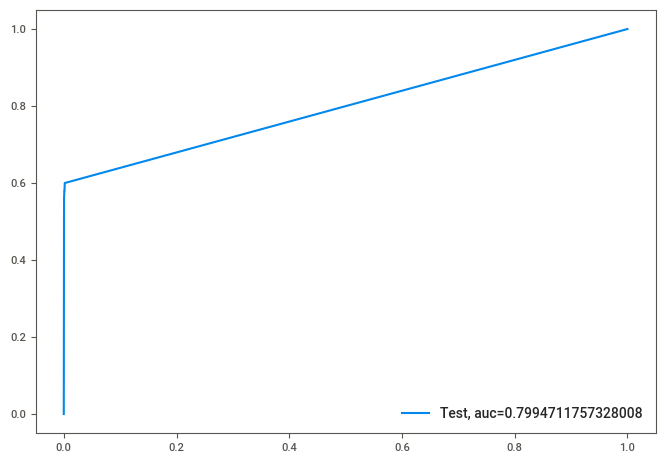

Time Taken by Model: --- 494.00648951530457 seconds ---
------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9985901841571945
Confusion Matrix


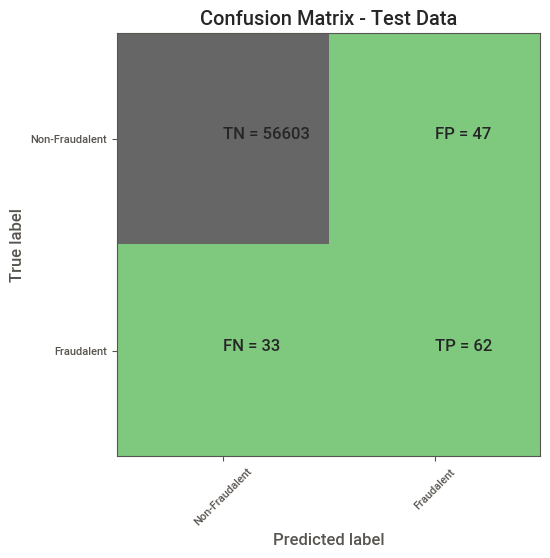

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.57      0.65      0.61        95

    accuracy                           1.00     56745
   macro avg       0.78      0.83      0.80     56745
weighted avg       1.00      1.00      1.00     56745

gini tree_roc_value: 0.8259009615831282
Tree threshold: 1.0
ROC for the test dataset 82.6%


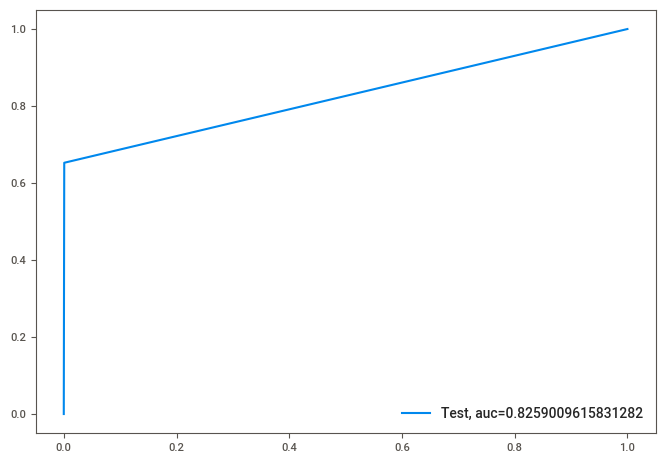

entropy score: 0.9991012424002115
Confusion Matrix


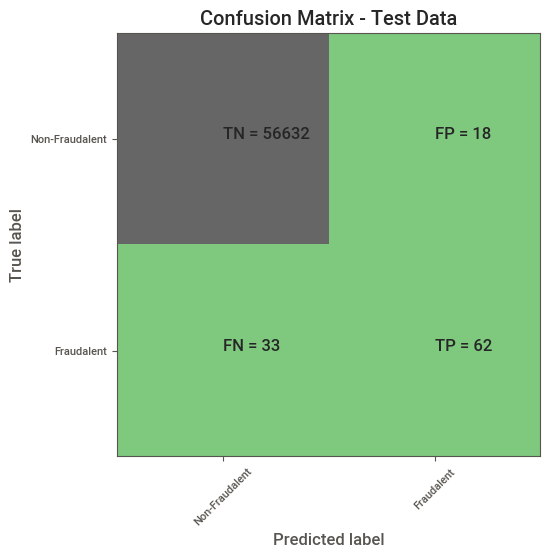

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.78      0.65      0.71        95

    accuracy                           1.00     56745
   macro avg       0.89      0.83      0.85     56745
weighted avg       1.00      1.00      1.00     56745

entropy tree_roc_value: 0.8261569192177267
Tree threshold: 1.0
ROC for the test dataset 82.6%


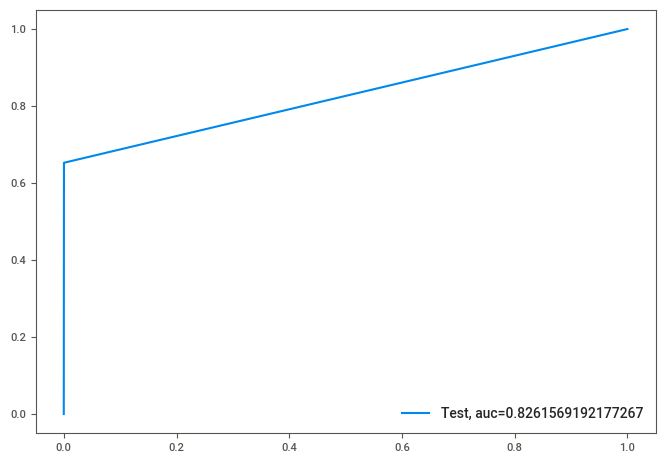

Time Taken by Model: --- 31.353321075439453 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994713190589479
Confusion Matrix


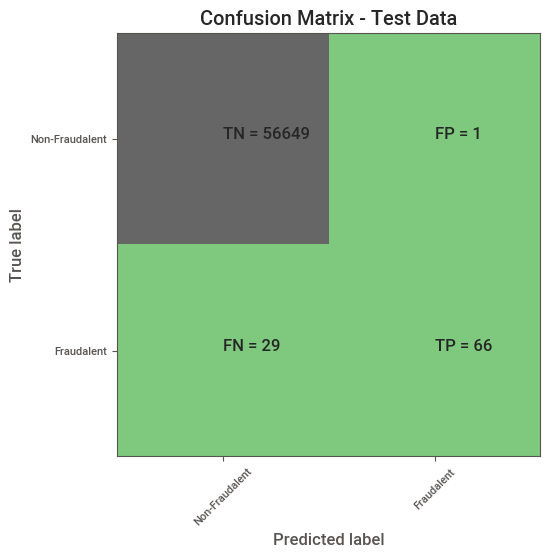

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.99      0.69      0.81        95

    accuracy                           1.00     56745
   macro avg       0.99      0.85      0.91     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.9385857760022298
Random Forest threshold: 0.02
ROC for the test dataset 93.9%


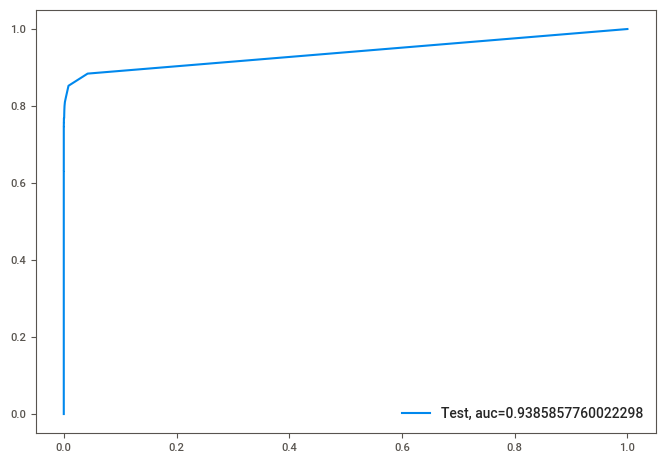

Time Taken by Model: --- 253.2996907234192 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995065644550181
Confusion Matrix


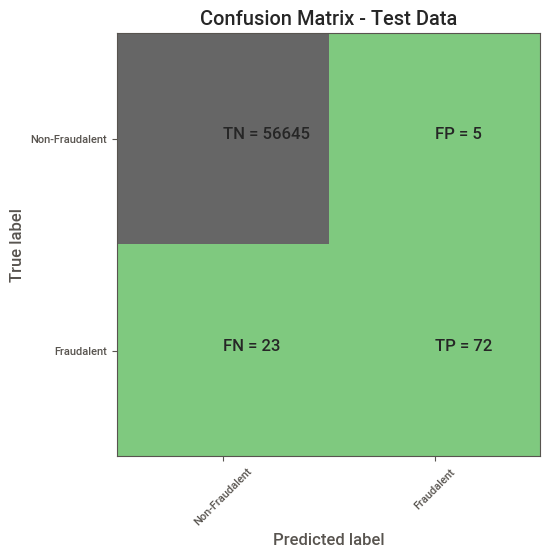

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.94      0.76      0.84        95

    accuracy                           1.00     56745
   macro avg       0.97      0.88      0.92     56745
weighted avg       1.00      1.00      1.00     56745

XGboost roc_value: 0.9757946764528266
XGBoost threshold: 0.000209578123758547
ROC for the test dataset 97.6%


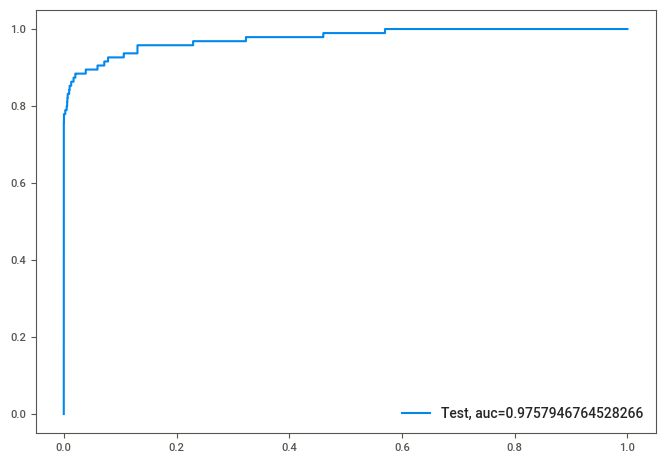

Time Taken by Model: --- 9.78033971786499 seconds ---
------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0                 RepeatedKFold Cross Validation   
1                 RepeatedKFold Cross Validation   
2                 RepeatedKFold Cross Validation   
3                 RepeatedKFold Cross Validation   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7                 RepeatedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12              StratifiedKFold Cross Validation   
13              StratifiedKFold Cross Validation   
14              StratifiedKFold Cross Validation   
15              StratifiedKFold Cross Validation   
16  Random Oversampling with StratifiedKFold CV    
17  Random Oversampling with StratifiedKFold CV    
18  Random Oversampling with StratifiedKFold CV    
19  Random Oversampling with StratifiedKFold CV    
20  Random Oversampling with StratifiedKFold CV    
21  Random Oversampling with StratifiedKFold CV    
22  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998467   0.585075   0.499332  
1   Logistic Regression with L1 Regularisation  0.999119   0.905195   0.054192  
2                                          KNN  0.999277   0.861819   0.200000  
3                Tree Model with gini criteria  0.999330   0.902114   1.000000  
4             Tree Model with entropy criteria  0.999225   0.879107   1.000000  
5                                Random Forest  0.999612   0.970011   0.010000  
6                                      XGBoost  0.999612   0.987688   0.000227  
7                                          SVM  0.997462   0.699492   0.003563  
8   Logistic Regression with L2 Regularisation  0.998326   0.610563   0.499394  
9   Logistic Regression with L1 Regularisation  0.998784   0.885447   0.021082  
10                                         KNN  0.999189   0.799610   0.200000  
11               Tree Model with gini criteria  0.998996   0.820850   1.000000  
12            Tree Model with entropy criteria  0.999101   0.826157   1.000000  
13                               Random Forest  0.999471   0.923590   0.010000  
14                                     XGBoost  0.999454   0.982862   0.000032  
15                                         SVM  0.998326   0.401469   0.002773  
16  Logistic Regression with L2 Regularisation  0.998326   0.500000        inf  
17  Logistic Regression with L1 Regularisation  0.998326   0.500000        inf  
18                                         KNN  0.998062   0.799471   0.200000  
19               Tree Model with gini criteria  0.998590   0.825901   1.000000  
20            Tree Model with entropy criteria  0.999101   0.826157   1.000000  
21                               Random Forest  0.999471   0.938586   0.020000  
22                                     XGBoost  0.999507   0.975795   0.000210

### Results for Random Oversampling with StratifiedKFold technique:
Looking at the Accuracy and ROC value we have XGBoost which has provided best results for Random Oversampling and StratifiedKFold technique

## <a name="p5-4">Oversampling with SMOTE Oversampling</a>
- We will use SMOTE Oversampling method to handle the class imbalance

In [ ]:
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.5
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

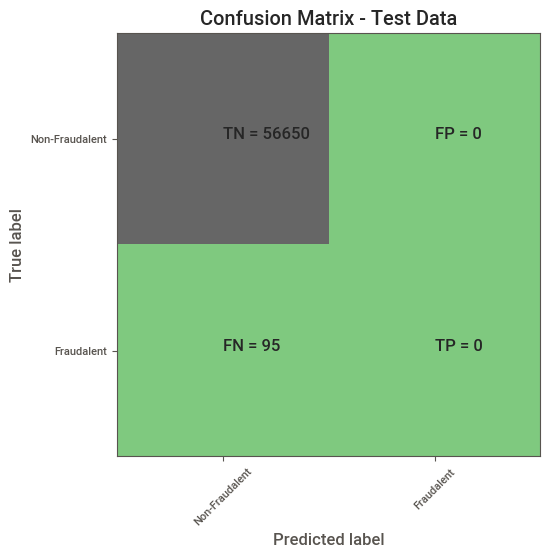

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

Accuarcy of Logistic model with l1 regularisation : 0.9983258436866684
Confusion Matrix


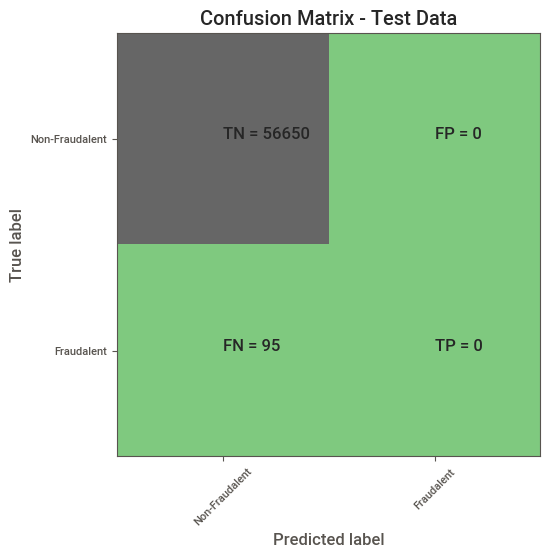

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


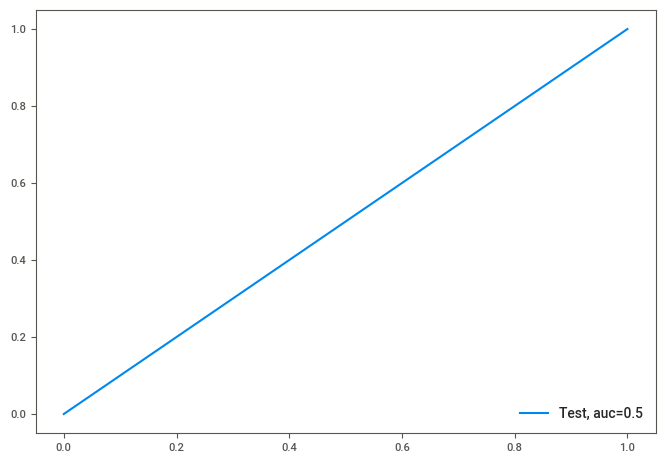

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


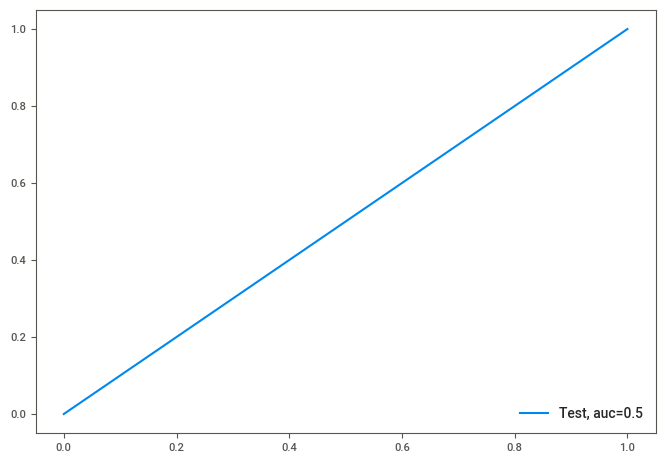

Time Taken by Model: --- 175.45586943626404 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9947308132875143
Confusion Matrix


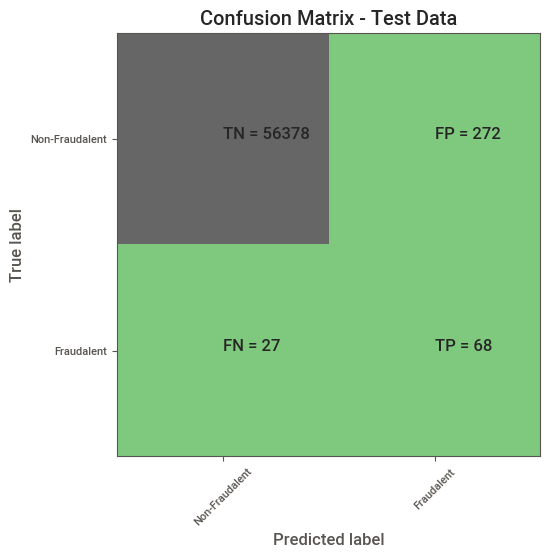

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.20      0.72      0.31        95

    accuracy                           0.99     56745
   macro avg       0.60      0.86      0.65     56745
weighted avg       1.00      0.99      1.00     56745

KNN roc_value: 0.8558783852835974
KNN threshold: 0.6
ROC for the test dataset 85.6%


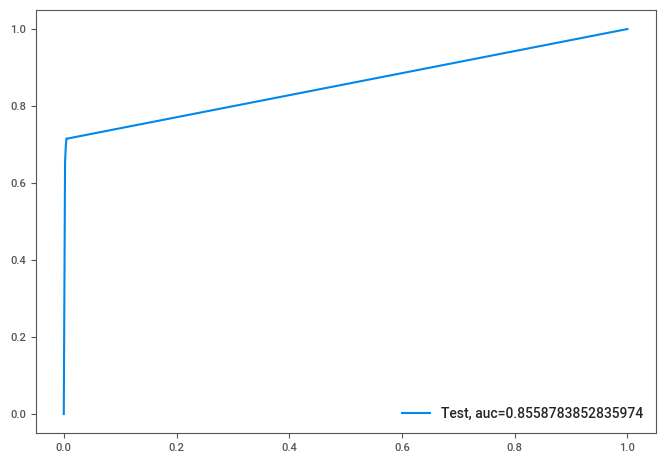

Time Taken by Model: --- 651.5207962989807 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9973918406908098
Confusion Matrix


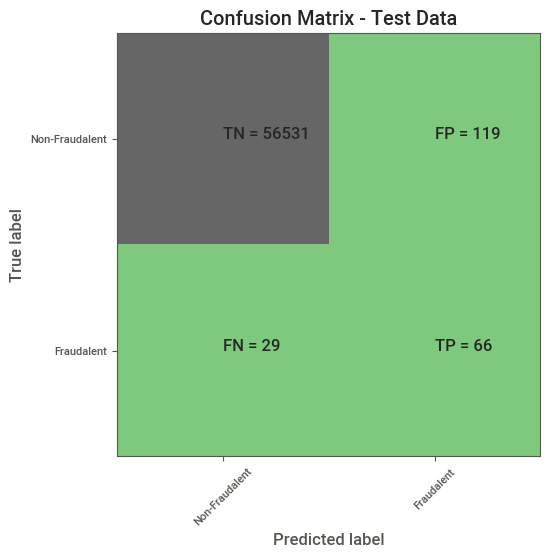

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.36      0.69      0.47        95

    accuracy                           1.00     56745
   macro avg       0.68      0.85      0.74     56745
weighted avg       1.00      1.00      1.00     56745

gini tree_roc_value: 0.8463181121382449
Tree threshold: 1.0
ROC for the test dataset 84.6%


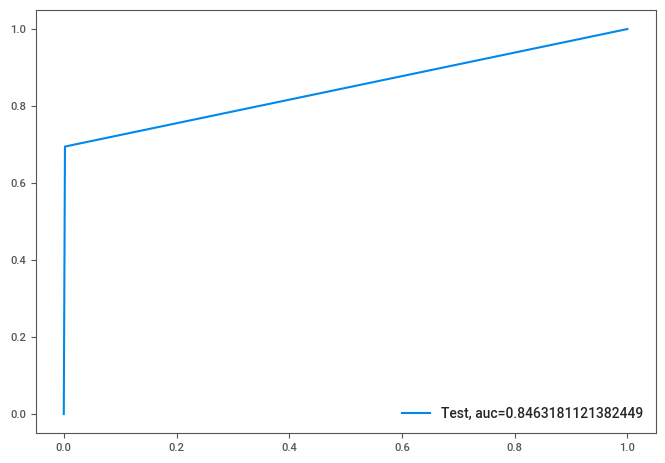

entropy score: 0.9977442946515112
Confusion Matrix


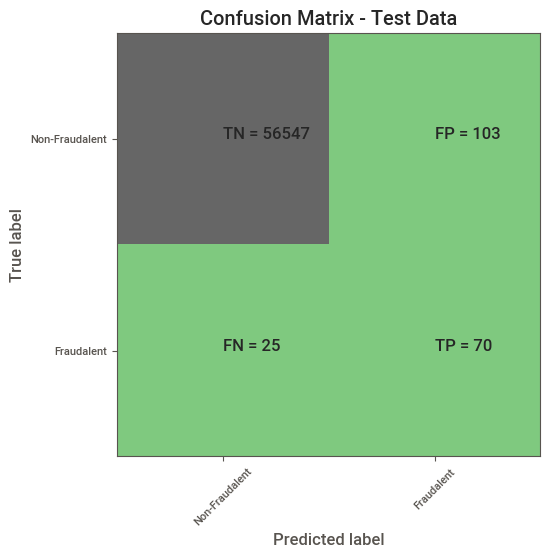

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.40      0.74      0.52        95

    accuracy                           1.00     56745
   macro avg       0.70      0.87      0.76     56745
weighted avg       1.00      1.00      1.00     56745

entropy tree_roc_value: 0.8675119617224881
Tree threshold: 1.0
ROC for the test dataset 86.8%


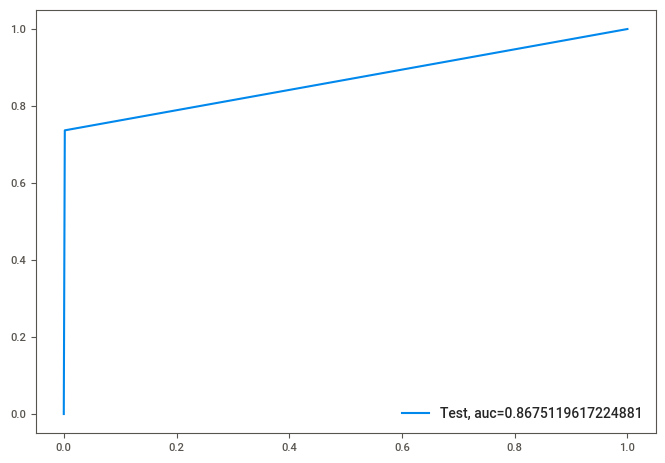

Time Taken by Model: --- 111.62415313720703 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999488941756983
Confusion Matrix


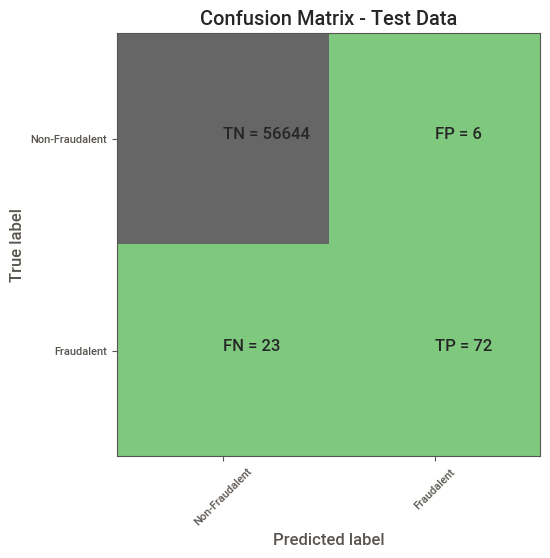

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.92      0.76      0.83        95

    accuracy                           1.00     56745
   macro avg       0.96      0.88      0.92     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.9563242439726856
Random Forest threshold: 0.04
ROC for the test dataset 95.6%


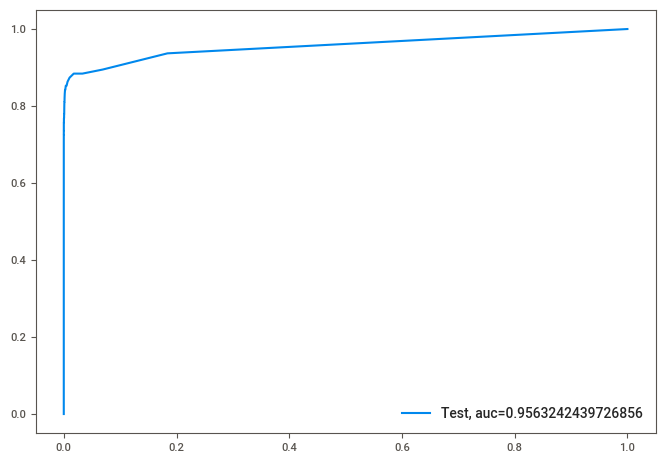

Time Taken by Model: --- 588.8280870914459 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993832055687726
Confusion Matrix


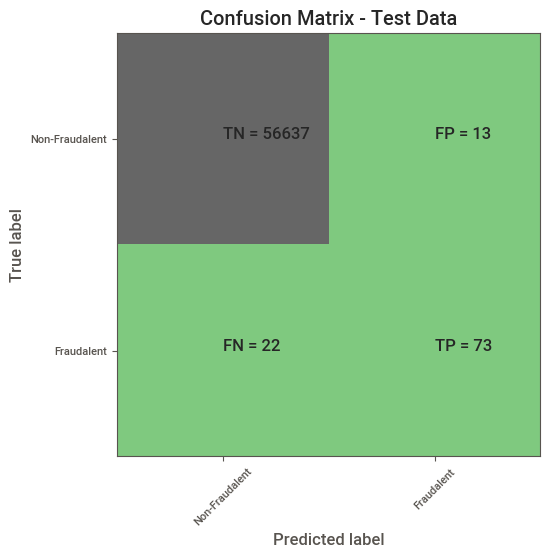

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.85      0.77      0.81        95

    accuracy                           1.00     56745
   macro avg       0.92      0.88      0.90     56745
weighted avg       1.00      1.00      1.00     56745

XGboost roc_value: 0.9711030798532075
XGBoost threshold: 0.0001634048530831933
ROC for the test dataset 97.1%


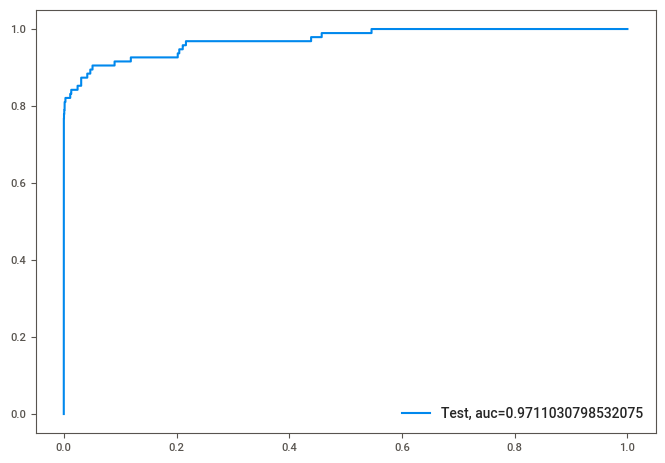

Time Taken by Model: --- 10.186220645904541 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0                 RepeatedKFold Cross Validation   
1                 RepeatedKFold Cross Validation   
2                 RepeatedKFold Cross Validation   
3                 RepeatedKFold Cross Validation   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7                 RepeatedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12              StratifiedKFold Cross Validation   
13              StratifiedKFold Cross Validation   
14              StratifiedKFold Cross Validation   
15              StratifiedKFold Cross Validation   
16  Random Oversampling with StratifiedKFold CV    
17  Random Oversampling with StratifiedKFold CV    
18  Random Oversampling with StratifiedKFold CV    
19  Random Oversampling with StratifiedKFold CV    
20  Random Oversampling with StratifiedKFold CV    
21  Random Oversampling with StratifiedKFold CV    
22  Random Oversampling with StratifiedKFold CV    
23   SMOTE Oversampling with StratifiedKFold CV    
24   SMOTE Oversampling with StratifiedKFold CV    
25   SMOTE Oversampling with StratifiedKFold CV    
26   SMOTE Oversampling with StratifiedKFold CV    
27   SMOTE Oversampling with StratifiedKFold CV    
28   SMOTE Oversampling with StratifiedKFold CV    
29   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998467   0.585075   0.499332  
1   Logistic Regression with L1 Regularisation  0.999119   0.905195   0.054192  
2                                          KNN  0.999277   0.861819   0.200000  
3                Tree Model with gini criteria  0.999330   0.902114   1.000000  
4             Tree Model with entropy criteria  0.999225   0.879107   1.000000  
5                                Random Forest  0.999612   0.970011   0.010000  
6                                      XGBoost  0.999612   0.987688   0.000227  
7                                          SVM  0.997462   0.699492   0.003563  
8   Logistic Regression with L2 Regularisation  0.998326   0.610563   0.499394  
9   Logistic Regression with L1 Regularisation  0.998784   0.885447   0.021082  
10                                         KNN  0.999189   0.799610   0.200000  
11               Tree Model with gini criteria  0.998996   0.820850   1.000000  
12            Tree Model with entropy criteria  0.999101   0.826157   1.000000  
13                               Random Forest  0.999471   0.923590   0.010000  
14                                     XGBoost  0.999454   0.982862   0.000032  
15                                         SVM  0.998326   0.401469   0.002773  
16  Logistic Regression with L2 Regularisation  0.998326   0.500000        inf  
17  Logistic Regression with L1 Regularisation  0.998326   0.500000        inf  
18                                         KNN  0.998062   0.799471   0.200000  
19               Tree Model with gini criteria  0.998590   0.825901   1.000000  
20            Tree Model with entropy criteria  0.999101   0.826157   1.000000  
21                               Random Forest  0.999471   0.938586   0.020000  
22                                     XGBoost  0.999507   0.975795   0.000210  
23  Logistic Regression with L2 Regularisation  0.998326   0.500000        inf  
24  Logistic Regression with L1 Regularisation  0.998326   0.500000        inf  
25                                         KNN  0.994731   0.855878   0.600000  
26               Tree Model with gini criteria  0.997392   0.846318   1.000000  
27            Tree Model with entropy criteria  0.997744   0.867512   1.000000  
28                               Random Forest  0.999489   0.956324   0.040

### Results for SMOTE Oversampling with StratifiedKFold:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE Oversampling with StratifiedKFold technique

## <a name="p5-5">Oversampling with ADASYN Oversampling</a>
- We will use ADASYN Oversampling method to handle the class imbalance

In [ ]:
# Creating dataframe with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.6050109137820691
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

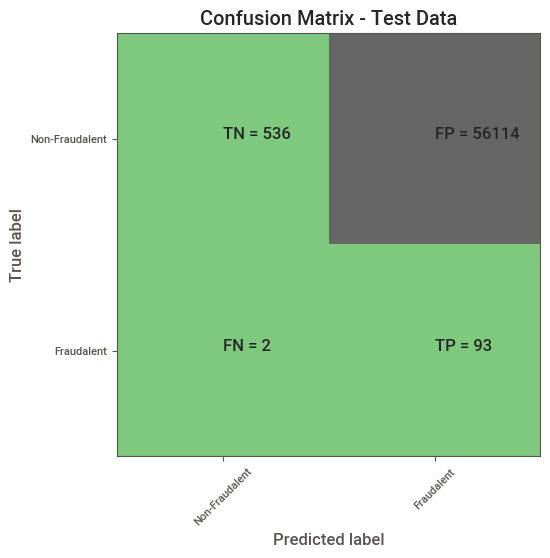

classification Report
              precision    recall  f1-score   support

           0       1.00      0.01      0.02     56650
           1       0.00      0.98      0.00        95

    accuracy                           0.01     56745
   macro avg       0.50      0.49      0.01     56745
weighted avg       0.99      0.01      0.02     56745

Accuarcy of Logistic model with l1 regularisation : 0.9983258436866684
Confusion Matrix


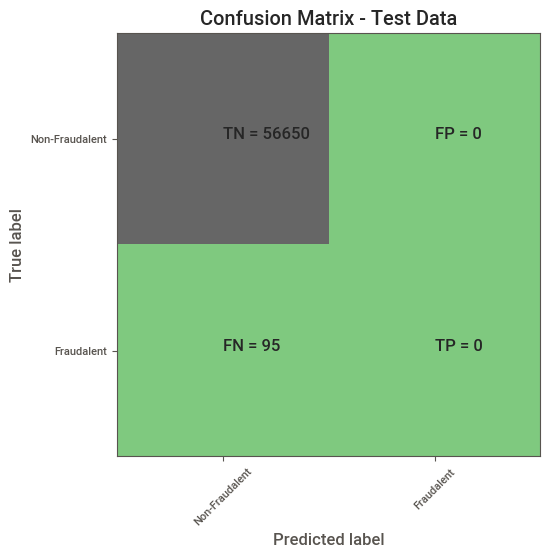

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.00      0.00      0.00        95

    accuracy                           1.00     56745
   macro avg       0.50      0.50      0.50     56745
weighted avg       1.00      1.00      1.00     56745

l2 roc_value: 0.45137622520555576
l2 threshold: 0.5387268119454554
ROC for the test dataset 45.1%


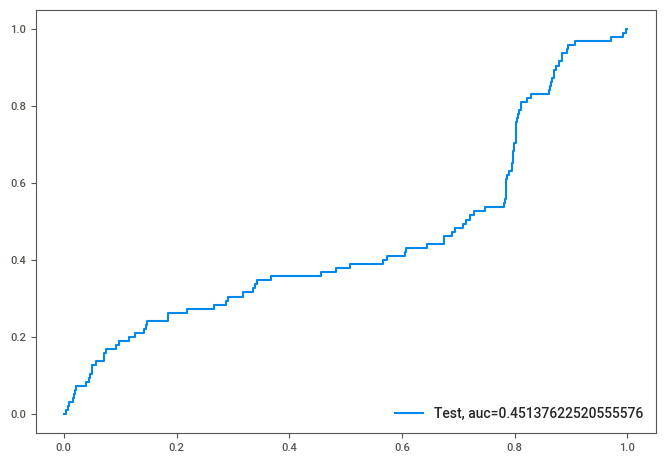

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


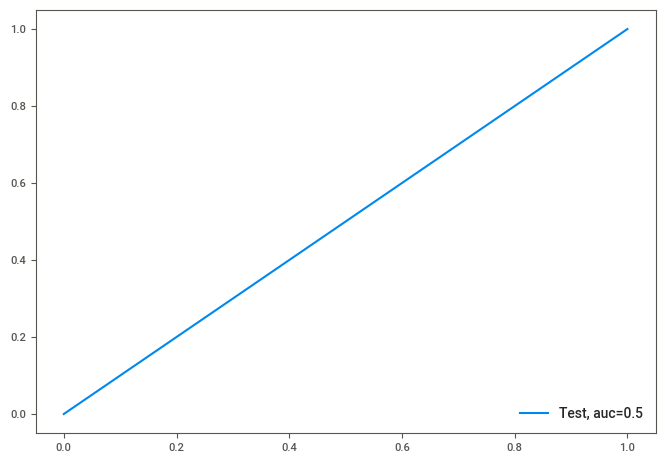

Time Taken by Model: --- 183.44440269470215 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9945017182130584
Confusion Matrix


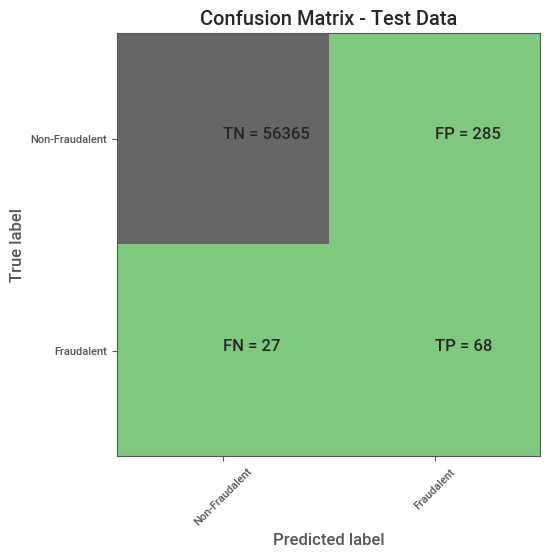

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56650
           1       0.19      0.72      0.30        95

    accuracy                           0.99     56745
   macro avg       0.60      0.86      0.65     56745
weighted avg       1.00      0.99      1.00     56745

KNN roc_value: 0.8557904027500349
KNN threshold: 0.6
ROC for the test dataset 85.6%


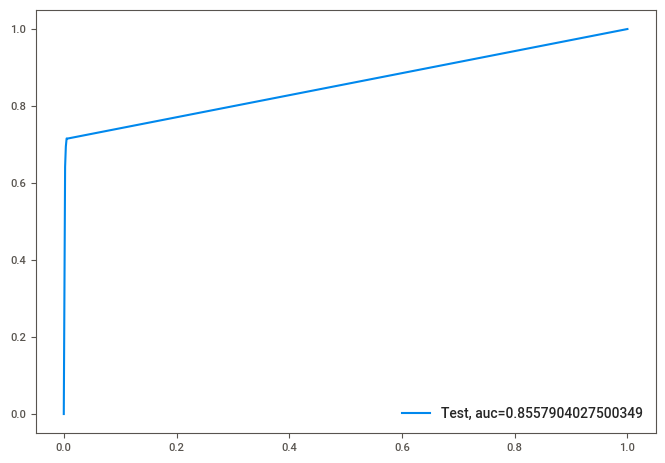

Time Taken by Model: --- 647.8275582790375 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.997955767027932
Confusion Matrix


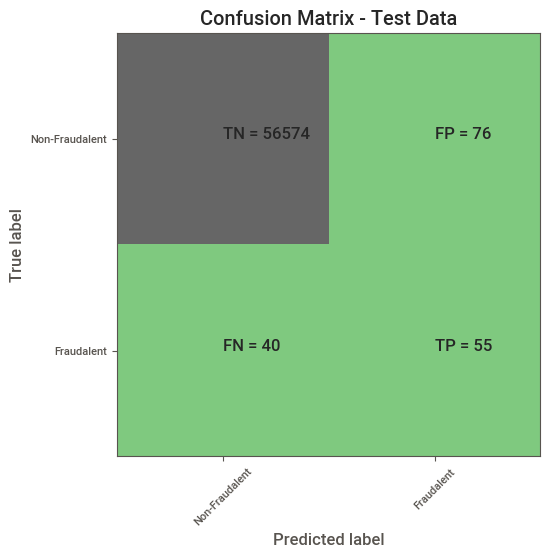

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.42      0.58      0.49        95

    accuracy                           1.00     56745
   macro avg       0.71      0.79      0.74     56745
weighted avg       1.00      1.00      1.00     56745

gini tree_roc_value: 0.7888028986853719
Tree threshold: 1.0
ROC for the test dataset 78.9%


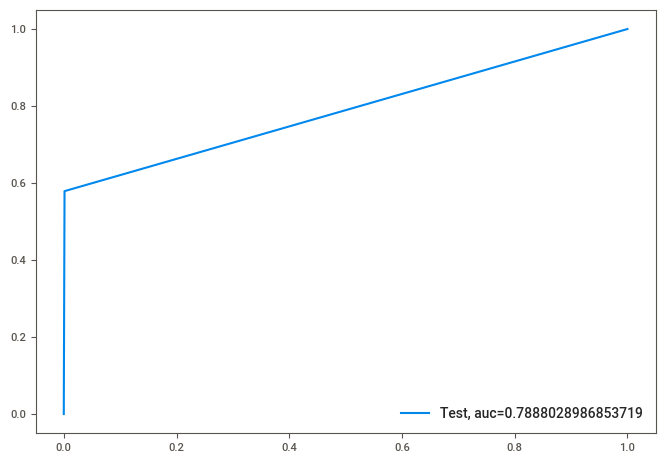

entropy score: 0.9966340646753018
Confusion Matrix


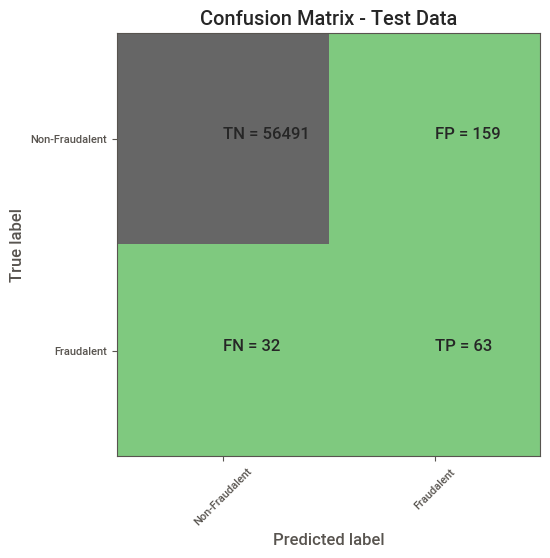

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.28      0.66      0.40        95

    accuracy                           1.00     56745
   macro avg       0.64      0.83      0.70     56745
weighted avg       1.00      1.00      1.00     56745

entropy tree_roc_value: 0.8301755934407953
Tree threshold: 1.0
ROC for the test dataset 83.0%


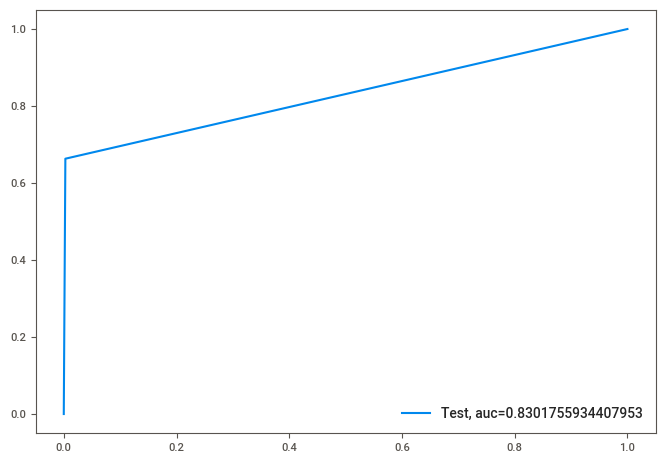

Time Taken by Model: --- 113.23818922042847 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995065644550181
Confusion Matrix


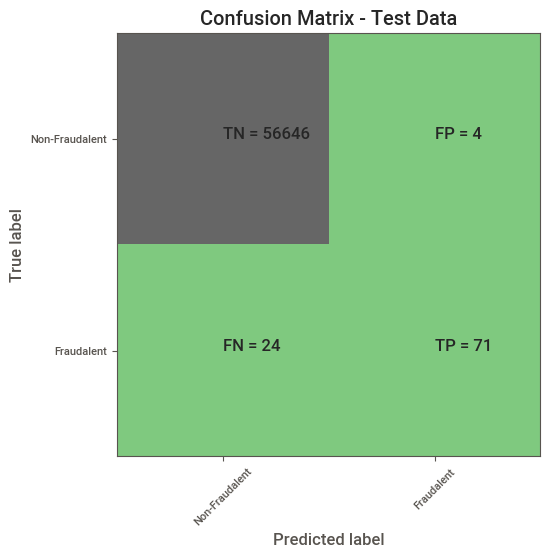

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.95      0.75      0.84        95

    accuracy                           1.00     56745
   macro avg       0.97      0.87      0.92     56745
weighted avg       1.00      1.00      1.00     56745

Random Forest roc_value: 0.9471434942165652
Random Forest threshold: 0.05
ROC for the test dataset 94.7%


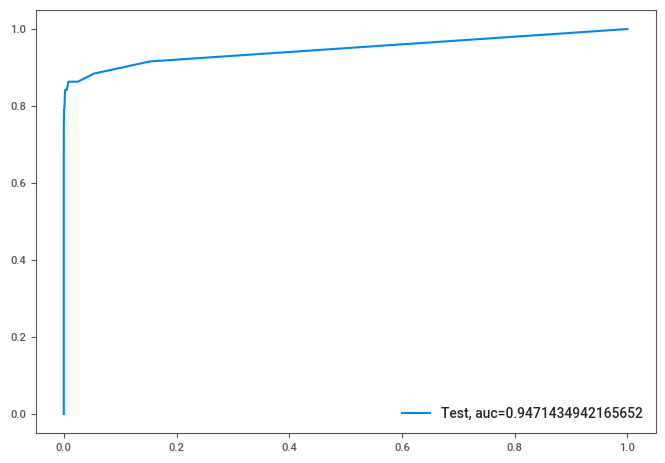

Time Taken by Model: --- 587.088408946991 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9992774693805622
Confusion Matrix


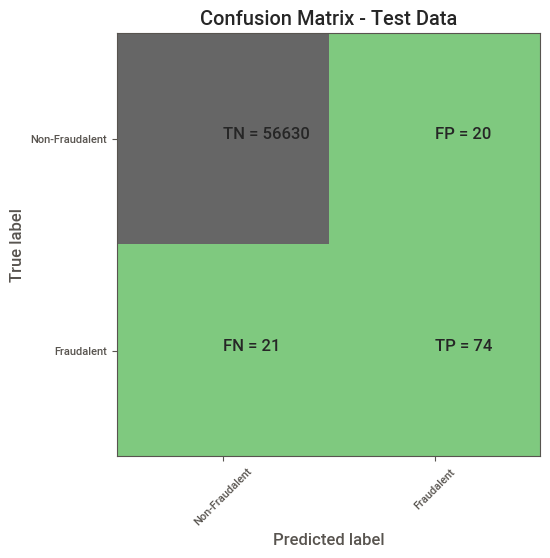

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56650
           1       0.79      0.78      0.78        95

    accuracy                           1.00     56745
   macro avg       0.89      0.89      0.89     56745
weighted avg       1.00      1.00      1.00     56745

XGboost roc_value: 0.9659092302689645
XGBoost threshold: 0.0002990931970998645
ROC for the test dataset 96.6%


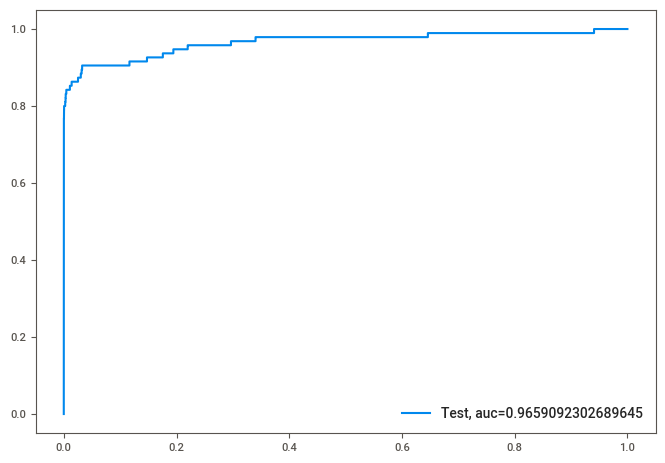

Time Taken by Model: --- 12.166955471038818 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

Methodology  \
0                 RepeatedKFold Cross Validation   
1                 RepeatedKFold Cross Validation   
2                 RepeatedKFold Cross Validation   
3                 RepeatedKFold Cross Validation   
4                 RepeatedKFold Cross Validation   
5                 RepeatedKFold Cross Validation   
6                 RepeatedKFold Cross Validation   
7                 RepeatedKFold Cross Validation   
8               StratifiedKFold Cross Validation   
9               StratifiedKFold Cross Validation   
10              StratifiedKFold Cross Validation   
11              StratifiedKFold Cross Validation   
12              StratifiedKFold Cross Validation   
13              StratifiedKFold Cross Validation   
14              StratifiedKFold Cross Validation   
15              StratifiedKFold Cross Validation   
16  Random Oversampling with StratifiedKFold CV    
17  Random Oversampling with StratifiedKFold CV    
18  Random Oversampling with StratifiedKFold CV    
19  Random Oversampling with StratifiedKFold CV    
20  Random Oversampling with StratifiedKFold CV    
21  Random Oversampling with StratifiedKFold CV    
22  Random Oversampling with StratifiedKFold CV    
23   SMOTE Oversampling with StratifiedKFold CV    
24   SMOTE Oversampling with StratifiedKFold CV    
25   SMOTE Oversampling with StratifiedKFold CV    
26   SMOTE Oversampling with StratifiedKFold CV    
27   SMOTE Oversampling with StratifiedKFold CV    
28   SMOTE Oversampling with StratifiedKFold CV    
29   SMOTE Oversampling with StratifiedKFold CV    
30  ADASYN Oversampling with StratifiedKFold CV    
31  ADASYN Oversampling with StratifiedKFold CV    
32  ADASYN Oversampling with StratifiedKFold CV    
33  ADASYN Oversampling with StratifiedKFold CV    
34  ADASYN Oversampling with StratifiedKFold CV    
35  ADASYN Oversampling with StratifiedKFold CV    
36  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  threshold  
0   Logistic Regression with L2 Regularisation  0.998467   0.585075   0.499332  
1   Logistic Regression with L1 Regularisation  0.999119   0.905195   0.054192  
2                                          KNN  0.999277   0.861819   0.200000  
3                Tree Model with gini criteria  0.999330   0.902114   1.000000  
4             Tree Model with entropy criteria  0.999225   0.879107   1.000000  
5                                Random Forest  0.999612   0.970011   0.010000  
6                                      XGBoost  0.999612   0.987688   0.000227  
7                                          SVM  0.997462   0.699492   0.003563  
8   Logistic Regression with L2 Regularisation  0.998326   0.610563   0.499394  
9   Logistic Regression with L1 Regularisation  0.998784   0.885447   0.021082  
10                                         KNN  0.999189   0.799610   0.200000  
11               Tree Model with gini criteria  0.998996   0.820850   1.000000  
12            Tree Model with entropy criteria  0.999101   0.826157   1.000000  
13                               Random Forest  0.999471   0.923590   0.010000  
14                                     XGBoost  0.999454   0.982862   0.000032  
15                                         SVM  0.998326   0.401469   0.002773  
16  Logistic Regression with L2 Regularisation  0.998326   0.500000        inf  
17  Logistic Regression with L1 Regularisation  0.998326   0.500000        inf  
18                                         KNN  0.998062   0.799471   0.200000  
19               Tree Model with gini criteria  0.998590   0.825901   1.000000  
20            Tree Model with entropy criteria  0.999101   0.826157   1.000000  
21                               Random Forest  0.999471   0.938586   0.020000  
22                                     XGBoost  0.999507   0.975795   0.000210  
23  Logistic Regression with L2 Regularisation  0.998326   0.500000        inf  
24  Logistic Regression with L1 Reg

## Results for ADASYN  Oversampling with StratifiedKFold:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN Oversampling with StratifiedKFold technique

## Overall conclusion after running the models on Oversampled data :
Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided the best results under the category of all oversampling techniques. So we will try to tune the hyperparameters of this model to get best results.

## <a name="p6">Hyperparameter Tuning</a>

## HPT - Xgboost Regression

In [ ]:
# Performing Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'n_estimators':range(60,130,150),
 'learning_rate':[0.05,0.1,0.125,0.15,0.2],
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1,max_delta_step=0,
              missing=None, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, verbosity=1),
              param_distributions = param_test, n_iter=5,scoring='roc_auc',n_jobs=-1, cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([7.08533082, 9.56246419, 9.17948418, 8.68035851, 7.31761985]),
  'std_fit_time': array([1.09006942, 1.09204122, 0.93990251, 1.26796397, 1.55425891]),
  'mean_score_time': array([0.02155447, 0.01870146, 0.01794372, 0.01453066, 0.02066631]),
  'std_score_time': array([0.00450268, 0.00561076, 0.00365483, 0.00228627, 0.009821  ]),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.8, 0.7],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[3, 3, 3, 3, 3],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[3, 9, 9, 7, 5],
               mask=[False, False, False, False, False],
       

Please note that the hyperparameters found above using RandomizedSearchCV and the hyperparameters used below in creating the final model might be different, the reason being, I have executed the RandomizedSearchCV multiple times to find which set of hyperparameters gives the optimum result and finally used the one below which gave me the best performance.

In [ ]:
# Creating XGBoost model with selected hyperparameters
from xgboost import XGBClassifier

# Set missing to a numerical value, e.g., 0
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.125, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=0, n_estimators=60, n_jobs=1, # Changed missing parameter
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

# fit on the dataset
clf.fit(X_over, y_over )
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993127147766323
XGboost roc_value: 0.9858051748966414
XGBoost threshold: 0.007759162690490484


### Print the important features of the best model to understand the dataset

In [ ]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-3])+1)

Top var = 10
2nd Top var = 14
3rd Top var = 12


In [ ]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9871069819296697
XGBoost threshold: 0.017604010179638863


## <a name="p7">Model Building using PyCaret</a>


In [19]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = df, target = 'Class')

## <a name="p7.1">Training</a>

***Below function trains and evaluates the performance of all the models available in the model library using cross-validation.***

***The output of this function is a scoring grid with average cross-validated scores.***

In [21]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1674, verbose=0,
                       warm_start=False)

In [22]:
best = create_model("xgboost")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## <a name="p7.2">HyperParameter Tuning</a>


***This function tunes the hyperparameters of a given model. The output of this function is a scoring grid with cross-validated scores of the best model. Search spaces are pre-defined with the flexibility to provide our own. The search algorithm can be random, bayesian, and a few others with the ability to scale on large clusters.***



In [30]:
tuned_xgb = tune_model(best)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
save_model(best , "card_pipe")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                              'V7', 'V8', 'V9', 'V10', 'V11',
                                              'V12', 'V13', 'V14', 'V15', 'V16',
                                              'V17', 'V18', 'V19', 'V20', 'V21',
                                              'V22', 'V23', 'V24', 'V25', 'V26',
                                              'V27', 'V28', 'Amount',
                                              'Time_Hour'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_v...
                                importance_type=None,
                                interaction_constrai

In [27]:
loaded_best_pipeline = load_model("card_pipe")
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                             'V7', 'V8', 'V9', 'V10', 'V11',
                                             'V12', 'V13', 'V14', 'V15', 'V16',
                                             'V17', 'V18', 'V19', 'V20', 'V21',
                                             'V22', 'V23', 'V24', 'V25', 'V26',
                                             'V27', 'V28', 'Amount',
                                             'Time_Hour'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

**The Pycaret also shows XGBOOST is the best model with high Accuracy,kappa and F1 score compared to other models**

## <a name="p8">Model Deployment Plan</a>


In [31]:
# The model can be deployed in Amazon Web Service using below code
# deploy_model(model = xgboost, model_name = 'xgb-for-deployment', platform = 'aws', authentication = {'bucket' : 'S3-bucket-name'})

## <a name="p9">Conclusion</a>

In the oversample cases, of all the models we build found that the XGBOOST model with Random Oversampling with StratifiedKFold CV gave us the best accuracy and ROC on oversampled data. Post that we performed hyperparameter tuning and got the below metrices :

XGboost roc_value: 0.9815403079438694
XGBoost threshold: 0.01721232570707798

Using Pycaret Library also, we found that XGBOOST is the best model for this data set.

However, of all the models we created we found Logistic Regression with L2 Regularisation for StratifiedKFold cross validation (without any oversampling or undersampling) gave us the best result.
